# Growing Neural Networks - Project COMP 691
## Author : Sam COLLIN | Student ID: 40316218
## Course : Conversational AI | Professor : Mirco Ravanelli

*It's difficult to make a notebook as clear as a report written in latex or any other text editor. I've done my best but I'd recommend navigating using the table of contents tab on the left which helps to understand the structure of the project better and not get lost.*

### Abstract

In this project, I focused on growing neural networks. I started with a literature review to explore different methods to understand when and how to grow a network. I then implemented Net2Net to evolve MLP architectures, and compared their performance to those of models trained classically on the MNIST and FashionMNIST datasets. In the first part, I showed that Net2Net allows to transfer knowledge and explore new architectures more quickly, while preserving the initial function, correctly handling batch normalization, and integrating the addition of noise during network expansion. In the second part, I studied the effects of growing during the training phase. Although the benefits are difficult to observe on simple tasks like MNIST, some interesting learning dynamics were highlighted. In the third part, I reimplemented a CTC-based ASR chain with a scalable CRDNN to further analyze the effects of growing a network. While the growth stages work technically, the results remain modest. Overall, this work validates the feasibility of the growing network concept, while highlighting the need for further experimentation on more complex architectures and more realistic tasks to fully assess its impact.

### Motivation

Since the early days of deep learning, neural network architectures with a fixed size have been used for the most part. This means that before training, the neural networks have a pre-defined size and will remain the same until the end. The different possibilities for optimisation are linked to other factors or methods such as dropout, learning rate, etc.

On the other hand, **dynamically growing networks** offer the possibility of modifying their architecture during training, which can have a number of advantages.  
Indeed, by growing over time, these networks can adapt to increasing complexity while requiring fewer resources initially, which can be very interesting in certain cases.  
In addition, this growth also seems to introduce a kind of natural regularisation, with a model that learns a simple task and then an increasingly difficult one.  
This makes it a very interesting subject, in tune with the times, and opens up a lot of possibilities.

---

Another source of motivation for me with regard to this project is the link it may have with **continual learning (CL)**. Indeed, large networks are in line with the main principles of CL in the sense that an increasingly complex task may turn out to be the arrival of new, unseen data.  
The model must therefore adapt to this new complexity without forgetting the knowledge previously acquired (plasticity-stability). Having new free neurons might be a really promising solution. CL is a subject that interests me enormously and in which I'd like to continue my studies, so this project was very meaningful for me.

---

The **speech domain** is in line with the Conversational AI course and is a complex domain. It will allow me to use the knowledge I have acquired during the course, in particular the use of *speechbrain*.

### Declaration of AI Use

For this project, I try to be as transparent as possible. I take the AI use and policy very seriously and I will try to detail my use of it during this project:

*   **Code/Implementation**:  
Almost all of the code has been written manually by me. When the code is coming from a external source or if the baseline is coming from a certain paper, i stated it. I used AI, specifically ChatGPT for ideas or code architecture and debug. The only exceptions are for environment files such as setup, Makefile, etc. This was done with the goal of making the project as simply and reproductible as possible. Finally, with the TA's agreement, I used AI to write the docstrings as they can be really time-consuming.

*   **Litterature Review:**  
The litterature review is written with my own words. However, I used AI tools such as Paper Review, Elicit or LitMaps to find the papers and compare ideas in an easier way (More info on these tools might be given if needed). I also use Chat GPT to find papers and ideas on how to connect them.

*  **Report:**  
Same as previously the report is written entirely by me. However, for reading fluidity some parts were written in french and translated using DeepL or some typos were corrected using Grammarly. Both of the were used without content generation.

I'd also like to point out that this forced me to think long and hard about the approach and greatly increased the amount of time I had to put in for equivalent work and I hope that this will be assessed fairly. However, I've learned a lot in the process and it's been great fun.




### Litterature Review
In this section, I present several papers that I have discovered while exploring the literature on growing networks. I am aware that I am not covering all that has been explored in the past in relation to the topics I am addressing in this project.  
I may have missed important papers or ideas in the following but tried my best to group them to cover as much as possible.  
This might more be seen as a context fundation rather than an exhaustive study.

---
#### Growing Networks in Continual Learning

**Key Papers:**

- **Net2Net: Accelerating Learning via Knowledge Transfer** ([Chen et al., 2016](http://arxiv.org/abs/1511.05641)) [1]:  
In this paper, the author introduces two methods to grow a network in both width and depth. It avoids a model to retrain from scratch when growing by transferring knowledge in a way that preserve the function. It can significantly reduce training time for bigger models.

- **Progressive Neural Networks (PNN)** ([Rusu et al., 2016](http://arxiv.org/abs/1606.04671)) [2]:  
This architecture is an example of the link between continual learning and growing networks. When it grows for a new task, the model adds a new neural "column". This is done while freezing the rest of the networks. This way, the new networks is immune to forgetting and only the new weights are used for plasticity using knowledge transfer from earlier tasks. It works well, but comes at the cost of growing the networks linearly with the number of tasks which makes it a little limiting in a lifelong learning context.

- **Lifelong Learning with Dynamically Expandable Networks (DEN)** ([Yoon et al., 2018](http://arxiv.org/abs/1708.01547)) [3]:  
In this paper, the author proposes an architecture that decides it's capacity on the fly when learning different tasks. DEN architecture knows when and how to retrains weights and add neurons if necessary. This avoids growing when unecessary such as when the tasks are close together and the previous neurons can handle it. It uses strategies like splitting and duplicating neurons and mark each neuron with a birth date. It allows to grow only with the required number of neurons per task.

- **Compacting, Picking and Growing for Unforgetting Continual Learning (CPG)** ([Hung et al., 2019](http://arxiv.org/abs/1910.06562)) [4]:  
CPG architectures is a combination of method. It first relies on deep model compression via weights pruning (Compacting), critical weights solutions (Picking) and selective progressive net extension (Growing). It can be seen as a counter to the fast growing limitation of architecture like PNN [2]. Growing is not mandatory in CPG, if the released weights are sufficient, this is acceptable.

- **Firefly Neural Architecture Descent: a General Approach for Growing Neural Networks** ([Wu et al., 2020](http://arxiv.org/abs/2102.08574)) [5]:  
This paper from NeurIPS introduces a general approach to grow a network. What makes it special is its ability to assess a wider or deeper set of neighbouring architectures, measuring their potential impact on loss. It has great results in continual learning and leads to models that are often smaller but with a high accuracy.


**Overview of techniques to grow a network**

The main objective when a model is grown is to increase its capacity. In in this part, we aim to compare different methods from the litterature:

- **Add Modules or Networks:**  
This growing technique is what I would like to call the safe one. For a new task, an entire module or even a network is added. It can be associated to methods such as PNN [2], where an entire new network called "column" is added for each new task and linked to the rest of the architecture with lateral connections. Multi-expert methods like Expert Gate [6] are also a good example where a new expert network is created for a new task and the model learns to route the inputs between these experts. The big advantage of these methods is that they are immune to forgetting and separate tasks well. However, this is often at the cost of a size that grows very quickly, making them useless for long sequences of stains.

- **Add or Expand Layers:**  
A second technique seen in the litterature is to grow inside the network. This means that the expansion will be achieved through the incorporation of additional neurons into a specific layer or the augmentation of the number of layers. A really evident example here is the Net2Net method [1]. When using the Net2WiderNet transformation, a new bigger network is instantianted performing the same function as the previous one (function-preserving) by replicating neurons/filters from the original model. For Net2DeeperNet, it is the same idea but this time, the layers are replicated. DEN [3] should also be mentionned here as it grows within existing layers, adding the needed number of neurons to perform the task if not possible with the already existing one. CPG [4] also uses a Net2Wider approach to grow the model. It is not stated in the paper directly, but it can be seen in the implementation. The main difference is in the heuristics where CPG might decide not to grow but to free up space in its current architecture.  
The major objective here is to grow smoothly and augment the model capacity without ruining all the previous efforts. The main challenge here is to know when and how much to grow. It is a central question regarding growing networks that I will try to explain a bit further below.

- **Architecture Search:**  
Approach like Firefly [5] sees the whole structure as something that can be optimized or learned. It uses algorithm to search for an optimal model during training. For Firefly, it is a gradient-based approach that tries different configurations such as wider, deeper, etc. It evaluates it on the objective and choose the one that has the best results. These techniques are designed to find the most efficient architectures for a model but it can lead to very heavy computations. Other methods such as AdaNet [7] or BNS [8] are linked to that type of model expansion. The latter uses RL to search the best continual learner by testing architectures. However, I couldn't find time to read more on their respective paper.

- **Grow with regularization:**  
There are some methods that we already discussed that rely on regularization to grow. DEN is the perfect example where the weights of the previous task are reduced via sparse-regularization. The sparsity induced by the L1/L2 regularization helps isolate the weights that are really necessary. The rest can be reused or expanded for future tasks if the loss cannot be reduced. It seems that CPG also is based on regularization when learning the binary mask for weight consolidation but again, it is not clearly stated. These methods combining regularization to prune the networks and expansion are really interesting as they yield a fully "alive" network. It is smarter than just copying the whole network, and it keeps the model small enough for lots of other tasks. It works really well, according to the research papers.

**Overview of Criterias for Network Growth**

Now that we have a pretty clear idea of how to make the network grow, we need to look at the second most important question: when should it grow? Let's again look at the litterature:

- **Task-Aware Expansion:**  
The most natural way of deciding when to grow a network in a continuous learning context is when a new task arrives. It means new data or a change in the objective. This change is seen as a trigger by the model to consider growing. For example, PNN [2]architecture grows the model by adding a "column" every time that a task arrives. Methods such as CPG [4]or DEN [3] use this trigger to see if they need to expand and then apply their rules to see if an expansion is needed based on the current model. This is called task-aware expansion. This method makes sense but requires comprehension of the tasks and their respective commencement dates.

- **Performance-Based Expansion:**  
A good way to decide when to grow is by monitoring the performance. By tracking the loss or the accuracy we can identify potential plateaus or accuracy drops that would indicate the need for more capacity. This introduces the concept of task-free or task-agnostic CL. The architecture should detect alone when it needs to expand. Method like CPG [4], even if the evaluation algorithm is triggered by each task, check if the pruned and retrained model meets a certain preset performance objective. If not, it expand and repeat the process until the target performance is reached. A growth criterion such as this requires a threshold to be defined. There are several ways of defining this threshold, such as cross-validation or simply zero-forgetting. In the Firefly [5] method, this is automated. It constantly evaluates the possibilities for expansion and chooses the one that has the best effect on loss by enlarging when the error can be reduced.

- **Change in distribution:**  
Another interesting approach especially in the task-free scenario is to detect when data has changed enough to justify a growth. To do so, the input data is scanned and if it diverges sufficiently then this is taken as an indicator of possible expansion. For example, in the SEDEM [9] method, the model use a "diversity measure" between experts to see if a new one is needed. In other words, the experts periodically agree on a common representation of new samples; if the entries from a new batch diverge too much from this, then it's time to grow. This method is strong because if the data distribution are different but similar, the network might be able to handle it without any need to grow.

I is likely that many relevant methods may exist beyond the scope of my current exploration.

### References

To ease the access while reading the litterature review, the references have been placed here. They are listed in the order in which they appear in the report.

[1] T. Chen, I. Goodfellow, and J. Shlens, “Net2Net: Accelerating Learning via Knowledge Transfer,” Apr. 23, 2016, arXiv: arXiv:1511.05641. doi: 10.48550/arXiv.1511.05641.

[2] A. A. Rusu et al., “Progressive Neural Networks,” Oct. 22, 2022, arXiv: arXiv:1606.04671. doi: 10.48550/arXiv.1606.04671.

[3] J. Yoon, E. Yang, J. Lee, and S. J. Hwang, “Lifelong Learning with Dynamically Expandable Networks,” Jun. 11, 2018, arXiv: arXiv:1708.01547. doi: 10.48550/arXiv.1708.01547.

[4] S. C. Y. Hung, C.-H. Tu, C.-E. Wu, C.-H. Chen, Y.-M. Chan, and C.-S. Chen, “Compacting, Picking and Growing for Unforgetting Continual Learning,” Oct. 30, 2019, arXiv: arXiv:1910.06562. doi: 10.48550/arXiv.1910.06562.

[5] L. Wu, B. Liu, P. Stone, and Q. Liu, “Firefly Neural Architecture Descent: a General Approach for Growing Neural Networks,” Jun. 21, 2021, arXiv: arXiv:2102.08574. doi: 10.48550/arXiv.2102.08574.

[6] R. Aljundi, P. Chakravarty, and T. Tuytelaars, “Expert Gate: Lifelong Learning with a Network of Experts,” Apr. 19, 2017, arXiv: arXiv:1611.06194. doi: 10.48550/arXiv.1611.06194.

[7] C. Cortes, X. Gonzalvo, V. Kuznetsov, M. Mohri, and S. Yang, “AdaNet: Adaptive Structural Learning of Artificial Neural Networks,” in Proceedings of the 34th International Conference on Machine Learning, PMLR, Jul. 2017, pp. 874–883. Accessed: Mar. 27, 2025. [Online]. Available: https://proceedings.mlr.press/v70/cortes17a.html

[8] Q. Qin, W. Hu, H. Peng, D. Zhao, and B. Liu, “BNS: Building Network Structures Dynamically for Continual Learning,” in Advances in Neural Information Processing Systems, Curran Associates, Inc., 2021, pp. 20608–20620. Accessed: Apr. 22, 2025. [Online]. Available: https://proceedings.neurips.cc/paper/2021/hash/ac64504cc249b070772848642cffe6ff-Abstract.html

[9] F. Ye and A. G. Bors, “Self-Evolved Dynamic Expansion Model for Task-Free Continual Learning,” in 2023 IEEE/CVF International Conference on Computer Vision (ICCV), Paris, France: IEEE, Oct. 2023, pp. 22045–22055. doi: 10.1109/ICCV51070.2023.02020.

[10] D. Slater, Net2Net TensorFlow MNIST example, GitHub repository, 2016. [Online]. Available: https://github.com/DanielSlater/Net2Net

[11] Garofolo, John S., et al. TIMIT Acoustic-Phonetic Continuous Speech Corpus LDC93S1. Web Download. Philadelphia: Linguistic Data Consortium, 1993.

[12] M. Ravanelli, T. Parcollet, A. Moumen, S. de Langen, C. Subakan, P. Plantinga, Y. Wang, P. Mousavi, L. Della Libera, A. Ploujnikov, F. Paissan, D. Borra, S. Zaiem, Z. Zhao, S. Zhang, G. Karakasidis, S.-L. Yeh, P. Champion, A. Rouhe, R. Braun, F. Mai, J. Zuluaga-Gomez, S. M. Mousavi, A. Nautsch, X. Liu, S. Sagar, J. Duret, S. Mdhaffar, G. Laperrière, M. Rouvier, R. De Mori, and Y. Esteve, "Open-Source Conversational AI with SpeechBrain 1.0," arXiv preprint arXiv:2407.00463, 2024. [Online]. Available: https://arxiv.org/abs/2407.00463

[13] M. Ravanelli, T. Parcollet, P. Plantinga, A. Rouhe, S. Cornell, L. Lugosch, C. Subakan, N. Dawalatabad, H. Abdelwahab, J. Zhong, J.-C. Chou, S.-L. Yeh, S.-W. Fu, C.-F. Liao, E. Rastorgueva, F. Grondin, W. Aris, H. Na, Y. Gao, R. De Mori, and Y. Bengio, "SpeechBrain: A General-Purpose Speech Toolkit," arXiv preprint arXiv:2106.04624, 2021. [Online]. Available: https://arxiv.org/abs/2106.04624


### Introduction

The goal of this project, motivated by the reasons given above, is to analyse and compare classic networks with those that grow during training on several different tasks such as  classification on MNIST, FashionMNIST or more related to conversational AI, phomeme recognition on the TIMIT dataset.

### General Methodology

A large part of this project is devoted to Net2Net transformations. Presented briefly in the literature review, let's take a closer look at how this works.

**Net2Net Overview**

According to the paper, Net2Net is a “*General term describing any process of training a student (S) network significantly faster than would otherwise be possible by leveraging knowledge from a teacher (T) network that was already trained on the same task.*”

It is based on the idea of **function-preserving** transformations of NNs.

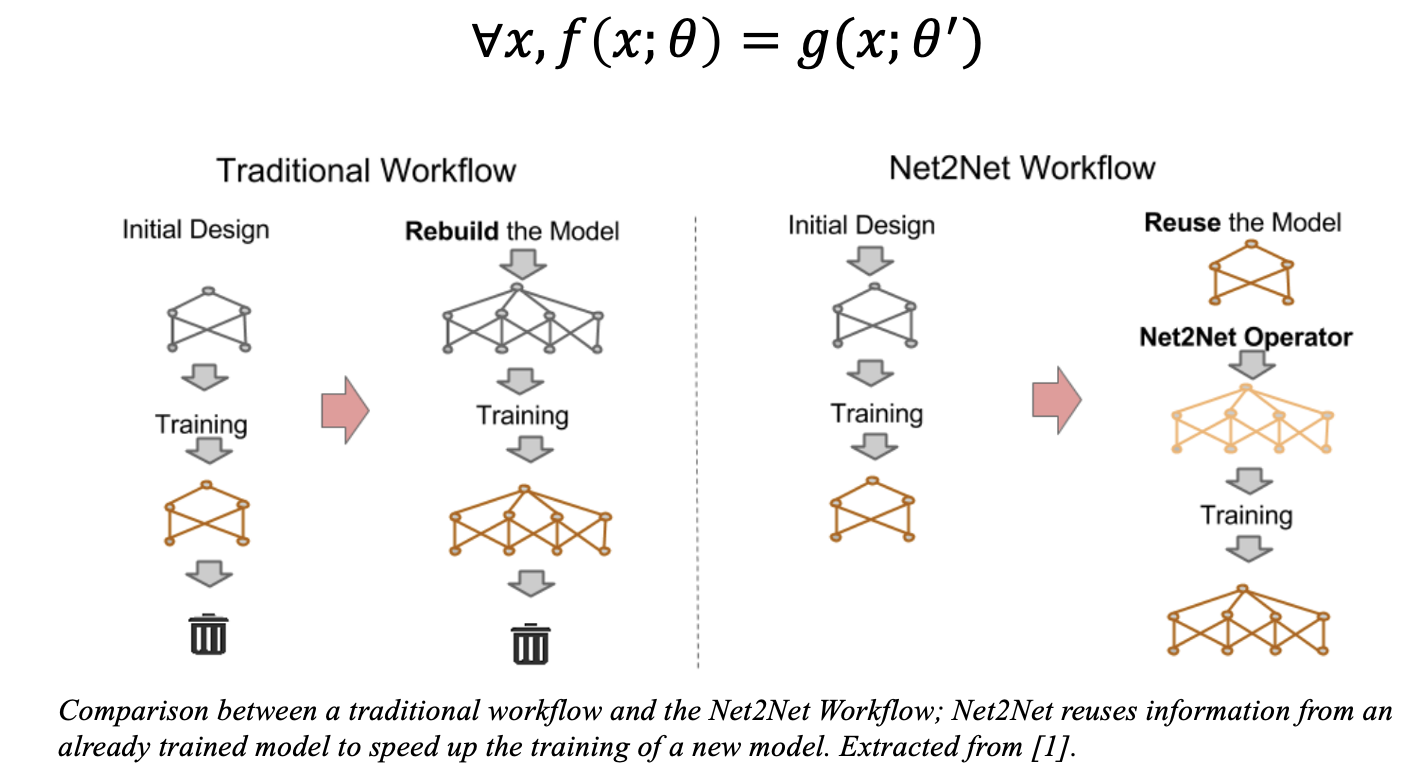

Function preserving caries many advantages:


*   Almost immediately performs as well as the teacher
*   Any change made to the network is an improvement
*   Safe, no need to freeze layers

Method definition:

Both **S** and **T** are compositions of linear NN layers:

$$
h^{(i)} = \Phi \left( \left( W^{(i)} \right)^\top h^{(i-1)} \right)
$$

where  
$h^{(i)}$ is the activation of hidden layer $i$,  
$W^{(i)}$ are the incoming weights,  
and $\Phi$ is an activation function such as **ReLU**.






**Net2WiderNet:**

A layer is replaced with a wider one → more units.  
The **Net2WiderNet operator** is used to create an **S** network that represents the same function as the **T** network.

- Unit $h[2]$ is replicated  
- Weights $c$ and $d$ are copied to $h[3]$  
- Outgoing weight $f$ is also copied but divided by 2 to compensate


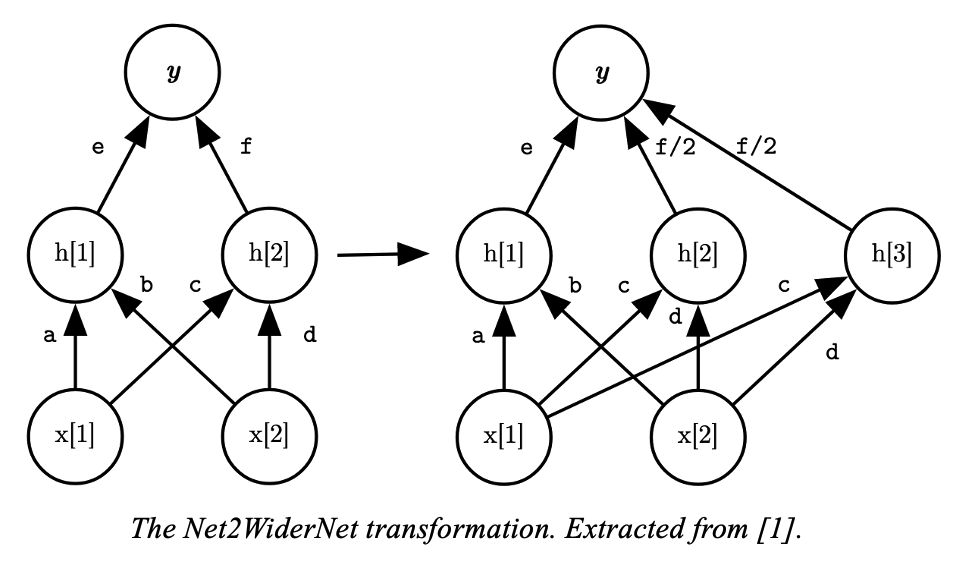

In practice, many units are replicated randomly on different layers.

In **Net2WiderNet**, the goal is to replace the previous weights $W^i \in \mathbb{R}^{m \times n}$ and $W^{i+1} \in \mathbb{R}^{n \times p}$ by a extended set of reused + new ones $U^i \in \mathbb{R}^{m \times q}$ and $U^{i+1} \in \mathbb{R}^{q \times p}$

---

It uses a **random mapping function** (from $n$ to $q$ units) to decide which neuron to duplicate:

$$
g(j) =
\begin{cases}
j & \text{if } j \leq n \\\\
\text{random sample from } \{1, 2, \dots, n\} & \text{if } j > n
\end{cases}
$$

---

Then weights are given by:

$$
U^i_{k,j} = W^i_{k, g(j)}, \quad
U^{i+1}_{j,h} = \frac{1}{\left| \{ x \mid g(x) = g(j) \} \right|} W^{i+1}_{g(j), h}
$$

(The denominator represents the **replication factor**.)

With Net2WiderNet, some precautions have to be taken:

- **Batch-Norm:**

  $$
  y = \gamma \cdot BN(x) + \beta
  $$

  - Learned parameters that allow the layer to represent any range of outputs  
  - Involves element-wise multiplication  
  - To ensure function-preservation, remapping for the multiplication parameters must match remapping from weight matrix


- **Concatenation:**

  - If `layer1` and `layer2` are concatenated and passed to `layer3`  
  - The output width of `layer1` determines the offset of the coordinates for units originating in `layer2`


- **Noise:**

  - Small perturbation added for replicated neurons to break symmetry


**Net2DeeperNet:**

A single layer is replaced by two layers:

$$
h^{(i)} = \Phi \left( W^{(i)\top} h^{(i-1)} \right)
\quad \longrightarrow \quad
h^{(i)} = \Phi \left( U^{i\top} \Phi \left( W^{(i)\top} h^{(i-1)} \right) \right)
$$

New matrix **U** is initialized to an identity matrix. It needs to verify:

$$
\Phi(I \cdot \Phi(v)) = \Phi(v) \quad \text{for all } v
$$


This property restricts the activation function to **ReLU** or **Maxout**,  
and cannot be applied with **sigmoids**.

*Deeper* can be composed with *Wider* to make new wider layers.



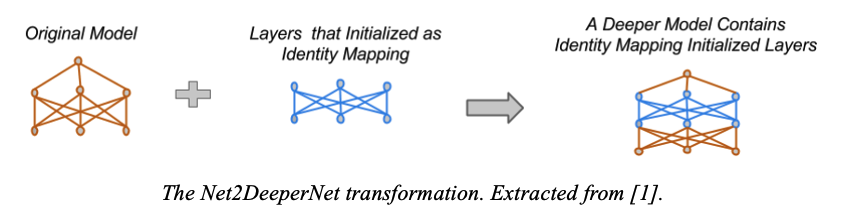

Same as for *Wider*, when using the Net2Deeper transformation precautions need to be taken:

- **Batch-Norm:**

  - To give the layer a true identity, the effect of standardization must be cancelled  
  - Forward pass to compute $\mu$ and $\sigma$ and set:

  $$
  \gamma = \sigma, \quad \beta = \mu
  $$

  - This has the effect of cancelling:
  
  $$
  y = \sigma * \left(\frac{x-μ}{\sigma}\right) + \mu = x
  $$

**Convolution Layers:**

Net2Net can also handle convolution layers:

For Wider:
- Add more filters to the layer  
- Copy existing ones  
- Divide outgoing weights according to the number of duplications


For Deeper:

  - Insert an identity convolutional layer  
  - Convolution kernels are set to be identity filters  
  - Handle BatchNorm if needed


### Environments

I approached this project with a real desire to learn how to produce code and a working environment that's as clear and portable as possible. I work mainly on a Mac, so both metal and cuda are supposed to be well managed.

As required, the code is flake8 compliant, only some line size errors remain.

A github repository contains all the code and requirements and can be imported simply to reproduce the experiments.  
To simplify the reproduction of results, I've used a Makefile that allows the experiments to be run directly from the source folder. Everything is configured to run from this location, so all you have to do is run make with the right target to reproduce the results.

The scripts folder contains all the code.

The following cell will download and install all the needed libraries for this project to run on colab. All of my code and work will be available in the growing networks. For the rest of the notebook, make sure you stay in the growing_networks/ (root) directory. Code snippets will be there to better explain and understand my work but everything will be executed from my repo's files.

In [1]:
%%capture
import os
REPO = "https://github.com/GitHubSamm/growing_networks.git"
if not os.path.isdir("growing-networks-project"):
    !git clone {REPO}
%cd growing_networks
!pip install -r requirements.txt

### Part 1 - Knowledge Transfer vs Scratch using Net2Net on MNIST/Fashion MNIST

This section of the project can be seen as a toy task. The objective of this part is to implement and test the Net2Net strategies on simple classification tasks such as MNIST or Fashion MNIST.  

Thus, we should be able to:
- Maintain performance after grow
- Observe the benefits of progressive vs full-size training from the beginning





The first thing was to implement a baseline recipe to train a network on the MNIST dataset. This has been seen and reproducted many times so the code won't be displayed in the notebook but code can be found from the root at `scripts/net2net/basic_MNIST`

The model here is an MLP composed of three linear layers with ReLU activations. This baseline is however a good example to demonstrate how to run the experiments as we just have to execute:


```
make run-basic-MNIST
```

If we have a look at the Makefile file one can see that a this name is associated with a corresponding shell command that gets executed when the target is invoked from the terminal.


```
### Basic MNIST ###
run-basic-MNIST:
	$(PYTHON) -m scripts.net2net.basic_MNIST.train
```



So let's run MNIST:




In [ ]:
!make run-basic-MNIST

python -m scripts.net2net.basic_MNIST.train
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/basic_MNIST_2025-04-24_02-09-18
Data will be saved (if not already) in:
/content/growing_networks/data/raw
Start training ...
Epoch 1/10 | Loss : 0.29| Train Acc : 91.77%
Epoch 2/10 | Loss : 0.20| Train Acc : 94.68%
Epoch 3/10 | Loss : 0.18| Train Acc : 95.52%
Epoch 4/10 | Loss : 0.15| Train Acc : 96.08%
Epoch 5/10 | Loss : 0.15| Train Acc : 96.28%
Epoch 6/10 | Loss : 0.14| Train Acc : 96.53%
Epoch 7/10 | Loss : 0.13| Train Acc : 96.92%
Epoch 8/10 | Loss : 0.14| Train Acc : 96.73%
Epoch 9/10 | Loss : 0.13| Train Acc : 96.94%
Epoch 10/10 | Loss : 0.13| Train Acc : 97.02%
Start evaluation ...
Evaluation -> Loss: 0.165, Accuracy: 96.32%


#### Net2Net Module
Let's now focus on growing the network. The approach taken here is based on different growth strategies that will be called when running the training recipe. They all rely on the ``net2net_ops.py`` module that implements all the Net2Net logic. Let's see first what the **Net2net module** offers in detail, as it is the most important in this project.

The module implements two functions:

- net2wider_linear: Return a wider version of a Linear layer with function-preserving weight transfer
- net2deeper_linear: Insert a new Linear layer initialized to preserve the identity function.

This module has been inspired by the Net2Net TensorFlow repo from D.Slater [10]

In [ ]:
raise RuntimeError("This cell is not intended to be executed; "
                   + "it is there to make the code easier to understand with the help of the explanations.")

"""
net2net_ops.py

This file implements Net2Net operations for dynamically growing neural networks
while preserving the function learned so far.

It includes:
- Net2WiderNet for widening linear layers with optional BatchNorm handling
- Net2DeeperNet for inserting identity-initialized layers
- Utilities for locating layers by name within PyTorch models

These methods are used to grow networks during training without reinitializing,
as part of a strategy to progressively expand capacity.

Reference:
Chen, T., Goodfellow, I., & Shlens, J. (2016). Net2Net: Accelerating Learning via Knowledge Transfer.
https://arxiv.org/abs/1511.05641

@author Sam Collin
"""

import torch
import torch.nn as nn
import numpy as np
import speechbrain as sb


def _find_layer(model, layer_name):

    for name, layer in model.named_modules():
        if name == layer_name:
            return layer


def net2wider_linear(
    layer: nn.Module,
    next_layer: nn.Module,
    new_width=None,
    norm_layer=None,
    noise_std=0.01,
    last_block=False,
):
    """Return a wider version of a Linear layer with function-preserving
    weight transfer.

    This function implements a Net2WiderNet operation by replicating
    existing neurons and adjusting the subsequent layer to preserve the
    function learned so far.
    Optionally, it also adapts an associated BatchNorm1d layer accordingly.

    Arguments
    ---------
    layer : nn.Module
        The Linear layer to be widened.
    next_layer : nn.Module
        The next Linear layer whose input size must be adapted.
    new_width : int, optional
        The desired output size of the widened layer. Must be greater than the
        current width.
    norm_layer : sb.nnet.normalization.BatchNorm1d, optional
        Associated normalization layer to widen and copy if provided.
    noise_std : float, optional
        Standard deviation of noise added to duplicated weights for symmetry
        breaking. Default is 0.01.
    last_block : bool, optional
        Whether the current layer is the final layer (avoids adding
        noise to output).

    Returns
    -------
    new_layer : nn.Linear
        The widened Linear layer.
    new_next_layer : nn.Linear
        The adjusted next Linear layer.
    new_norm_layer : sb.nnet.normalization.BatchNorm1d (optional)
        The widened batch norm layer, only if norm_layer is provided.

    Example
    -------
    >>> layer = nn.Linear(10, 20)
    >>> next_layer = nn.Linear(20, 30)
    >>> wider, next_wider = net2wider_linear(layer, next_layer, new_width=25)

    @author Sam Collin
    """

    # Add safety checks
    # Add one neuron if no target size
    if new_width is None:
        new_width = layer.out_features + 1
    # Make sure the goal is to grow
    elif new_width <= layer.out_features:
        raise ValueError(
            "The new layer size must be greater than the current layer size"
        )

    # Number of neurons to add
    n_add_weights = new_width - layer.out_features

    # Define our 2 new layers
    new_layer = nn.Linear(layer.in_features, new_width)
    new_next_layer = nn.Linear(new_width, next_layer.out_features)

    # First, we will copy the already trained weights
    # Current Layer
    new_layer.weight.data[: layer.out_features] = layer.weight.data
    new_layer.bias.data[: layer.out_features] = layer.bias.data
    # Next Layer
    new_next_layer.weight.data[:, : layer.out_features] = next_layer.weight.data

    # BatchNorm handling (Copy the layer but with new size)
    if norm_layer is not None:

        # Create new sb batchnorm with the updated size
        new_norm_layer = sb.nnet.normalization.BatchNorm1d(input_size=new_width)

        # Copy the learned scale parameters (gamma) for the existing units
        new_norm_layer.norm.weight.data[: layer.out_features] = (
            norm_layer.norm.weight.data
        )

        # Copy the learned shift parameters (beta) for the existing units
        new_norm_layer.norm.bias.data[: layer.out_features] = norm_layer.norm.bias.data

        # Copy the running mean statistics for the existing units
        new_norm_layer.norm.running_mean.data[: layer.out_features] = (
            norm_layer.norm.running_mean.data
        )

        # Copy the running var statistics for the existing units
        new_norm_layer.norm.running_var.data[: layer.out_features] = (
            norm_layer.norm.running_var.data
        )

        # Copy the number of batches seen so far
        new_norm_layer.norm.num_batches_tracked.data = (
            norm_layer.norm.num_batches_tracked.data
        )

    for i in range(n_add_weights):

        # Choose a random idx that will be the neuron to replicate
        idx_split = np.random.randint(0, layer.out_features)

        # Clone the node that will be duplicated
        weights_splitted_node = layer.weight.data[idx_split].clone()
        bias_splitted_node = layer.bias.data[idx_split].clone()

        # Add noise to the replicated weight and bias
        if noise_std:
            weights_splitted_node += torch.randn_like(weights_splitted_node) * noise_std
            bias_splitted_node += (
                torch.randn(1).to(layer.weight.device).item() * noise_std
            )

        # Insert the new node
        new_layer.weight.data[layer.out_features + i] = weights_splitted_node
        new_layer.bias.data[layer.out_features + i] = bias_splitted_node

        # Duplicate also the norm params
        if norm_layer is not None:

            # Copy the scale parameter (gamma) from the duplicated unit to the new unit
            new_norm_layer.norm.weight.data[layer.out_features + i] = (
                new_norm_layer.norm.weight.data[idx_split : idx_split + 1]
            )
            # Copy the shift parameter (beta) from the duplicated unit to the new unit
            new_norm_layer.norm.bias.data[layer.out_features + i] = (
                new_norm_layer.norm.bias.data[idx_split : idx_split + 1]
            )
            # Copy the running mean of the duplicated unit
            new_norm_layer.norm.running_mean.data[layer.out_features + i] = (
                new_norm_layer.norm.running_mean.data[idx_split : idx_split + 1]
            )
            # Copy the running variance of the duplicated unit
            new_norm_layer.norm.running_var.data[layer.out_features + i] = (
                new_norm_layer.norm.running_var.data[idx_split : idx_split + 1]
            )

        # To handle the next layer and perform function preservig, we divide
        # the outgoing weight associated with the splitted node and copy this divided
        # one.
        new_next_layer.weight.data[:, idx_split] /= 2
        new_next_layer.weight.data[:, layer.out_features + i] = (
            new_next_layer.weight.data[:, idx_split]
        )

        # Add output noise (same idea) but make sure it is not applied to last
        # layer to preserve the logits
        if noise_std and not last_block:
            new_next_layer.weight.data[:, layer.out_features + i] += (
                torch.randn_like(new_next_layer.weight.data[:, idx_split]) * noise_std
            )

    if norm_layer is not None:
        return new_layer, new_next_layer, new_norm_layer

    return new_layer, new_next_layer


def net2deeper_linear(layer: nn.Module):
    """Insert a new Linear layer initialized to preserve the identity function.

    This function implements the Net2DeeperNet operation by duplicating a Linear layer
    and inserting a new one initialized as an identity mapping, so that the transformation
    applied by the network remains unchanged.

    Arguments
    ---------
    layer : nn.Module
        The Linear layer after which an identity-initialized Linear layer will be inserted.

    Returns
    -------
    nn.Sequential
        A sequential module containing the original layer followed by the new identity layer.

    Example
    -------
    >>> layer = nn.Linear(128, 128)
    >>> deeper = net2deeper_linear(layer)
    >>> print(deeper)
    Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): Linear(in_features=128, out_features=128, bias=True)
    )

    @author Sam Collin
    """
    old_bias = layer.bias.data

    # Create a new layer with the same number of I/O units
    duplicated_layer = nn.Linear(layer.out_features, layer.out_features)
    # Initialize the weight matrix to identity
    duplicated_layer.weight.data = torch.eye(old_bias.size(0), dtype=old_bias.dtype)
    # Bias set to 0
    duplicated_layer.bias.data = torch.zeros_like(old_bias)

    return nn.Sequential(layer, duplicated_layer)

#### Recipe to compare Knowledge Transfer to scratch
The last thing we need to explore before diving into strategies is the **training recipe**. Defined in the following cell, it implements the full pipeline to train an MLP from scratch compared with a rapidly pre-trained network expanded using Net2Net transformations.  
This comparison is made in order to study the potential gain in efficiency by using Net2Net transformations rather than starting from scratch. This is very similar to what is done in the paper.

In this recipe:



1.   **Environment preparation**: Seed, results folder, wandb ...
2.   **Data preparation**: Wanted dataset is downloaded and wrapped to DataLoaders with basic normalization.
3.   **Model**: Based on the --strategy and --model choice, the right model is instantiated defined in `scripts/net2net/net2net_MNIST/model.py`.
4.   **Optimizer** is defined such as SGD (lr = 0.01, momentum = 0.9, weight-decay = 5 × 10⁻⁴) + Cross-entropy
5.   **Training loop**:  
If the flag `NO_PRETRAIN_FOR_BASELINE` is deactivated, it will first start by training the young model for a certain number of epochs (8 in my experiments).
Then Net2Net according to the growth strategy chosen will be used to expand the model to the adult size. After that, the training will resume or start in case there is no pretraining for 24 epochs.
6.   In the end, the model is evaluated and we save the results. WandB is used to monitor the second part of the training but is deactivated in this notebook to ensure reproductbility.




Everything can be run from the command line using the Makefile.
This recipe also saves logs and metrics of the experiments in the results folder.

In [ ]:
raise RuntimeError("This cell is not intended to be executed; "
                   + "it is there to make the code easier to understand with the help of the explanations.")

"""
Net2Net Growth & Knowledge-Transfer Recipe for MNIST / Fashion-MNIST
===================================================================

Author   : Sam Collin
Framework: PyTorch + wandb (optional)
Inspired : SpeechBrain Recipe Structure

Description
-----------
This recipe trains Multi-Layer Perceptrons (MLPs) under two regimes and
makes it easy to compare them:

1. **Scratch baseline**
   Train the *adult* (large) network for *N* epochs from random
    initialisation.

2. **Net2Net knowledge-transfer path**
   a. Train a *young* (small) network for *N₁* « pre-train » epochs.
   b. Expand it with a Net2Net transformation *(wider / deeper / BN)*.
   c. Continue training the *student* for *N₂* epochs.

Three growth strategies are implemented:

* **Strategy 1 (Wider)**     Net2Wider on `lin1` → `lin2`
* **Strategy 2 (Deeper + Wider)**
    – Net2Deeper identity insertion, then Net2Wider
* **Strategy 3 (Wider + BatchNorm)**
    – Net2Wider with BatchNorm parameter copying

Usage
----------
# Scratch baseline (adult network), wandb disabled
python scripts/net2net/net2net_MNIST/train_knowledge_transfer.py \
    --model adult           \
    --strat 1               \
    --no_pretrain_for_baseline \
    --dataset MNIST
"""

import os
import sys
import torch
import argparse
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as tf
import torch.nn as nn
import time
import wandb

import scripts.net2net.net2net_MNIST.net2net_ops as net2net_ops
import scripts.net2net.logger as logger
import scripts.utils as utils
import scripts.net2net.utils_net2net as utils_net2net
import scripts.net2net.net2net_MNIST.model as models

# Argument Parser inspired by the one in speechbrain
parser = argparse.ArgumentParser()
parser.add_argument("--model", type=str, default="young", choices=["young", "adult"])
parser.add_argument("--strat", type=int, default=1, choices=[1, 2, 3])
parser.add_argument("--no_pretrain_for_baseline", action="store_true")
parser.add_argument("--dataset", default="MNIST", choices=["MNIST", "FASHION_MNIST"])
parser.add_argument("--wandb", default="disabled", choices=["disabled", "online"])
parser.add_argument("--run_name", type=str, default="xyz")
command_line_args = parser.parse_args()

# == Hparams == #
NO_PRETRAIN_FOR_BASELINE = command_line_args.no_pretrain_for_baseline
STRAT_NUMBER = command_line_args.strat
BATCH_SIZE = 64
LEARNING_RATE = 0.01
MOMENTUM = 0.9
WEIGHT_DECAY = 0.0005

# When we train from scratch, no growth, 24 epochs
if NO_PRETRAIN_FOR_BASELINE:
    N_EPOCHS_BEFORE_GROW = [24]
    N_GROWTH = 0
    PRETRAIN_OFFSET = 0
# When the model is pretrained, 8 epochs, growth young -> adult, 24 epochs
else:
    N_EPOCHS_BEFORE_GROW = [8, 24]
    N_GROWTH = 1
    PRETRAIN_OFFSET = N_EPOCHS_BEFORE_GROW[0]

# If required, instantiate a new wandb run
wandb.init(
    mode=command_line_args.wandb,
    project="toy-Net2Net",
    name=command_line_args.run_name,
    config=dict(
        scratch_baseline=NO_PRETRAIN_FOR_BASELINE,
        model=command_line_args.model,
        strategy=STRAT_NUMBER,
        dataset=command_line_args.dataset,
        batch_size=BATCH_SIZE,
        lr=LEARNING_RATE,
        pretrain_offset=PRETRAIN_OFFSET,
        n_growth=N_GROWTH,
    ),
)

# == Pre-Processing == #
preprocess_MNIST = tf.Compose([tf.ToTensor(), tf.Normalize((0.1307,), (0.3081,))])
preprocess_FASHION = tf.Compose([tf.ToTensor(), tf.Normalize((0.2860,), (0.3530,))])

# == Models == #
model_dict = {
    "model_young_strat1": models.SuperBasicMLP_strat1,
    "model_adult_strat1": models.SuperBasicMLP_big_strat1,
    "model_young_strat2": models.SuperBasicMLP_strat2,
    "model_adult_strat2": models.SuperBasicMLP_big_strat2,
    "model_young_strat3": models.SuperBasicMLP_BN1D,
    "model_adult_strat3": models.SuperBasicMLP_big_BN1D,
}


# == Functions == #
def growth_strategy(model, growth_number, strat_number=STRAT_NUMBER):
    """
    Applies a growth transformation to a given model according to the specified strategy.

    This function supports multiple growth strategies for widening or deepening
    the architecture of a neural network during training (e.g., Net2Net).

    Args:
        model (nn.Module): The model to be grown.
        growth_number (int): The growth stage index. Used to decide which growth operation to apply
                            (e.g., for multi-step strategies).
        strat_number (int, optional): The strategy index to use for growing the network.
                                    Defaults to the global STRAT_NUMBER.

    Supported Strategies:
        - Strategy 1: Net2Wider applied on a two-layer MLP (lin1 → lin2).
        - Strategy 2:
            - Step 1: Net2Deeper inserted between input and hidden (lin1 becomes Sequential).
            - Step 2: Net2Wider applied on the inner hidden layer and lin2.
        - Strategy 3: Net2Wider with BatchNorm support.

    Returns:
        nn.Module: The updated model with increased capacity according to the selected strategy.

    Raises:
        ValueError: If an unknown strategy number is provided.

    Example:
        >>> model = SuperBasicMLP_strat1()
        >>> model = growth_strategy(model, growth_number=1, strat_number=1)
    """
    # In any case, the first set of epoch will be done without any growth
    if growth_number == 0:
        print("No growth here (Original step)")
        return model

    # Growth rules for strategy 1 (Wider)
    if strat_number == 1:

        # Retrieve the current layers
        print("Model growing ...")
        layer, next_layer = model.lin1, model.lin2

        # Make the hidden layer four times wider using net2wider at each growth
        new_width = int(layer.out_features * 4)
        new_layer, new_next_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, noise_std=0.01, last_block=True
        )
        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer

        return model

    # Growth rules for strategy 2 (Deeper + Wider)
    if strat_number == 2:

        # For the first growth, deepen the model by adding a layer
        if growth_number == 1:

            # Add a new layer using net2deeper
            layer = model.lin1
            duplicated_layer = net2net_ops.net2deeper_linear(layer)
            model.lin1 = duplicated_layer
            return model

        # For the second one, make the newly created layer 2 times wider
        if growth_number == 2:
            layer = model.lin1[1]
            next_layer = model.lin2
            new_width = int(layer.out_features * 2)
            model.lin1[1], model.lin2 = net2net_ops.net2wider_linear(
                layer, next_layer, new_width
            )
            return model

    # Growth rules for strategy 3 (Wider + BatchNorm)
    if strat_number == 3:

        # Retrieve the layers + the batchnorm layer
        print("Model growing ...")
        layer, next_layer, norm_layer = model.lin1, model.lin2, model.norm

        # Make the hidden layer four times wider using net2wider at each growth
        new_width = int(layer.out_features * 4)
        new_layer, new_next_layer, new_norm_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, norm_layer
        )

        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer
        model.norm = new_norm_layer

        return model

    else:
        raise ValueError(f"No strategy implemented for number {strat_number}.")


def train(
    train_loader,
    test_loader,
    model,
    epochs,
    criterion,
    optimizer,
    growth_number,
    device="cpu",
):
    """
    Train a model on a given dataset. It records the metrics in wandb if necessary, except for pretraining.

    Args:
        train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
        model (torch.nn.Module): The model to train.
        epochs (int): Number of training epochs.
        criterion (torch.nn.Module): Loss function to optimize.
        optimizer (torch.optim.Optimizer): Optimizer to update model weights.
        device (str, optional): Device to use ("cpu", "cuda", "mps"). Default is "cpu".

    Returns:
        tuple:
            - train_losses (list of float): List of epoch-wise training losses.
            - train_accs (list of float): List of epoch-wise training accuracies.
            - final_epoch_loss (float): Final epoch loss.
            - final_epoch_acc (float): Final epoch accuracy.

    Example:
        >>> train_losses, train_accs, final_loss, final_acc = train(
        >>>     train_loader, model, epochs=10, criterion=loss_fn, optimizer=opt, device="cpu"
        >>> )
    """

    model.train()

    train_losses = []
    train_accs = []

    for epoch in range(epochs):

        epoch_correct = 0
        epoch_loss = 0
        n_samples = 0

        for data, target in train_loader:

            n_correct_predictions = 0

            # move to GPU if available
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()

            # Forward pass
            output = model(data)

            loss = criterion(output, target)

            loss.backward()
            optimizer.step()

            # Compute the # of correct predictions
            n_correct_predictions = utils_net2net.compute_n_correct(output, target)

            epoch_loss += loss.item() * data.size(0)
            epoch_correct += n_correct_predictions
            n_samples += data.size(0)

        epoch_loss /= n_samples
        epoch_acc = (epoch_correct / n_samples) * 100

        # If we are currently pretraining the model before growing, we ignore wandb logging
        if not NO_PRETRAIN_FOR_BASELINE and growth_number == 0:
            pass
        else:
            test_loss, test_acc = evaluate(
                test_loader,
                model=model,
                criterion=criterion,
                device=device,
                train=True,
            )
            wandb.log(
                {
                    "train_loss": epoch_loss,
                    "train_acc": epoch_acc,
                    "epoch": epoch,
                    "test_loss": test_loss,
                    "test_acc": test_acc,
                }
            )

        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        print(
            f"Epoch {epoch+1}/{epochs} "
            + f"| Loss : {epoch_loss:.2f}"
            + f"| Train Acc : {epoch_acc:.2f}%"
        )

    return train_losses, train_accs, epoch_loss, epoch_acc


def evaluate(test_loader, model, criterion, device="cpu", train=False):
    """
    Evaluate a model on a given test dataset.

    Args:
        test_loader (torch.utils.data.DataLoader): DataLoader for the test dataset.
        model (torch.nn.Module): The model to evaluate.
        criterion (torch.nn.Module): Loss function used during evaluation.
        device (str, optional): Device to use ("cpu", "cuda", or "mps"). Default is "cpu".
        train (bool, optional): If True, suppress evaluation printing (e.g., during training). Default is False.

    Returns:
        tuple:
            - test_loss (float): Average loss over the test set.
            - test_acc (float): Accuracy (%) over the test set.

    Example:
        >>> test_loss, test_acc = evaluate(
        >>>     test_loader, model=model, criterion=loss_fn, device="cpu"
        >>> )
    """
    model.eval()

    test_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data, target in test_loader:
            # Copy data and targets to GPU
            data = data.to(device)
            target = target.to(device)

            # Do a forward pass
            output = model(data)

            # Calculate the loss
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)

            # Count number of correct digits
            total_correct += utils_net2net.compute_n_correct(output, target)
            total_samples += data.size(0)

    test_loss = test_loss / total_samples
    test_acc = (total_correct / total_samples) * 100

    # Just make sure that we display it when really evaluating on the test set
    if not train:
        print(f"Evaluation -> Loss: {test_loss:.3f}, Accuracy: {test_acc:.2f}%")

    return test_loss, test_acc


if __name__ == "__main__":
    """
    Main of the Net2Net / scratch experiments
    -------------------------------------------------------

    Workflow
    --------
    1.   **Reproducibility & logging**
         * `seed_everything` sets all RNG seeds.
         * A results folder is created; `logger.Logger` mirrors stdout to
           *train_log.txt*.
         * `wandb` is initialised *online* or *disabled* according to the
        `--wandb` CLI flag.

    2.   **Data preparation**
        The requested dataset (MNIST / Fashion-MNIST) is downloaded into
         *data/raw* and wrapped in `DataLoader`s with basic normalisation.

    3.   **Model definition**
         *young* (small) or *adult* (large) MLP is instantiated according
         to `--model` and growth *strategy* (`--strat`).

    4.   **Optimiser & criterion**
        SGD (lr = 0.01, momentum = 0.9, weight-decay = 5 × 10⁻⁴) and
        Cross-Entropy loss.

    5.   **Training loop over growth stages**
        For `growth_number = 0 … N_GROWTH`
        ────────────────────────────────────────
         * Optionally apply **Net2Net** (`growth_strategy`) unless the run
           is the *scratch baseline* (`--no_pretrain_for_baseline`).
         * Re-initialise the optimiser (LR is kept identical here)
         * **Pre-training evaluation** on the *training* set validates
            function-preservation.
         * Train for `N_EPOCHS_BEFORE_GROW[growth_number]` epochs:
                – Pre-train block (if any) is *not* logged to wandb
                to keep curves aligned.
                – Subsequent stages log per-epoch loss / accuracy.
         * Evaluate on the *test* set and log the final metrics.
         * Persist model checkpoint, JSON metrics and PNG learning-curves.

    6.   **Global summary**
            After the last growth stage, aggregate curves are saved and the
            total training time is printed.

    Returns
    -------
    None
    """

    # Set the seed, the result folder and create the logger for the results
    utils.seed_everything(691)
    device = utils.get_device()
    project_folder = utils.get_project_root()
    data_folder = utils.get_data_folder()
    results_dir = utils_net2net.create_result_dir(
        task_name=f"net2net_{command_line_args.dataset}"
    )
    sys.stdout = logger.Logger(os.path.join(results_dir, "train_log.txt"))

    # Diplay run info
    print(
        "\n##########"
        + "\nStarting net2net_MNIST ..."
        + f"\nModel used: {command_line_args.model} "
        + f"| Dataset used: {command_line_args.dataset} "
        + f"| Growth enabled: {not NO_PRETRAIN_FOR_BASELINE} "
        + f"| Strat number: {STRAT_NUMBER}"
        + "\n##########"
    )

    # Import data
    print(f"\nData will be saved (if not already) in:\n{data_folder}")

    # MNIST
    if command_line_args.dataset == "MNIST":
        train_dataset = datasets.MNIST(
            root=data_folder, train=True, download=True, transform=preprocess_MNIST
        )
        test_dataset = datasets.MNIST(
            root=data_folder, train=False, download=True, transform=preprocess_MNIST
        )
    # Fashion MNIST
    elif command_line_args.dataset == "FASHION_MNIST":
        train_dataset = datasets.FashionMNIST(
            root=data_folder, train=True, download=True, transform=preprocess_FASHION
        )
        test_dataset = datasets.FashionMNIST(
            root=data_folder, train=False, download=True, transform=preprocess_FASHION
        )

    train_loader = DataLoader(
        dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True
    )

    test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Choose model (young is the small version, adult is the final)
    model = model_dict[f"model_{command_line_args.model}_strat{STRAT_NUMBER}"]().to(
        device
    )

    # Momentum of 0.9, lr=0.01 and w_decay = 0.0005
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(
        model.parameters(),
        lr=LEARNING_RATE,
        momentum=MOMENTUM,
        weight_decay=WEIGHT_DECAY,
    )

    global_losses_over_growth = []
    global_accs_over_growth = []
    global_train_duration = 0

    print("\nStart training for multiple growth ...")
    for growth_number in range(N_GROWTH + 1):

        growth_results_dir = os.path.join(results_dir, f"growth{growth_number}")
        os.makedirs(growth_results_dir, exist_ok=True)

        # Check wether a growth strat is required
        # If yes, grow the model and reinitialize the optimizer
        print(f"\nBegin step {growth_number}")
        if not NO_PRETRAIN_FOR_BASELINE:
            model = growth_strategy(model, growth_number, STRAT_NUMBER)
            model = model.to(device)
            optimizer = torch.optim.SGD(
                model.parameters(),
                lr=LEARNING_RATE,
                momentum=MOMENTUM,
                weight_decay=WEIGHT_DECAY,
            )
        else:
            print("No growth here")

        # Compare the number of parameters
        n_parameters = utils.count_parameters(model)
        print(f"The number of parameters at this step is: {n_parameters}")
        print("The model is :\n", model)
        print(f"\nBegin training for growth step {growth_number}...")

        # Evaluate model raw after growth on the train set (Check for function preserving)
        train_loss, train_acc = evaluate(
            train_loader, model=model, criterion=criterion, device=device, train=True
        )
        # Display it in the logs
        print(
            "\n###### Pre-Training Evaluation ######\n"
            + f"Epoch 0/{N_EPOCHS_BEFORE_GROW[growth_number]} "
            + f"| Loss : {train_loss:.2f}"
            + f"| Train Acc : {train_acc:.2f}%\n"
            + "#####################################"
        )
        # Train the new model
        begin = time.time()
        train_losses, train_accs, final_loss, final_acc = train(
            train_loader,
            test_loader,
            model=model,
            epochs=N_EPOCHS_BEFORE_GROW[growth_number],
            criterion=criterion,
            optimizer=optimizer,
            device=device,
            growth_number=growth_number,
        )
        end = time.time()
        step_train_duration = end - begin
        global_train_duration += step_train_duration
        print(f"Training finished in {step_train_duration:.2f}s")

        print("\nStart evaluation ...")
        test_loss, test_acc = evaluate(
            test_loader, model=model, criterion=criterion, device=device
        )

        # If we are pretraining, we don't monitor the pretrain part
        if not NO_PRETRAIN_FOR_BASELINE and growth_number == 0:
            pass
        else:
            wandb.log({"final_test_loss": test_loss, "final_test_accuracy": test_acc})

        # Save final model
        torch.save(
            model.state_dict(),
            os.path.join(growth_results_dir, f"model_final_growth{growth_number}.pt"),
        )

        # Save metrics
        utils_net2net.save_training_curves(train_losses, train_accs, growth_results_dir)
        utils_net2net.save_metrics(
            {
                f"n_parameters_step{growth_number}": n_parameters,
                f"train_final_loss_step{growth_number}": final_loss,
                f"train_final_acc_step{growth_number}": final_acc,
                f"test_final_loss_step{growth_number}": test_loss,
                f"test_final_acc_step{growth_number}": test_acc,
                f"train_duration_step{growth_number}": step_train_duration,
            },
            growth_results_dir,
        )
        global_losses_over_growth.extend(train_losses)
        global_accs_over_growth.extend(train_accs)

    # Create learning curves that will be saved with the results
    utils_net2net.save_training_curves(
        global_losses_over_growth, global_accs_over_growth, results_dir
    )
    utils_net2net.save_metrics(
        {
            "m_parameters_final": n_parameters,
            "train_final_loss": final_loss,
            "train_final_acc": final_acc,
            "test_final_loss": test_loss,
            "test_final_acc": test_acc,
            "global_train_duration": global_train_duration,
        },
        results_dir,
    )

    print(
        "\nGlobal Experiment finished with a total"
        + f" training time of {global_train_duration:.2f}s"
    )
    print(f"Detailed results available in {results_dir}\n")

Now, we can have a look at the strategies and models associated with them. There are three strategies, each representing a different net2net style growth technique. They are applied to MLP architectures. Before growth, a model is called "young" and become "adult" after the expansion. For the scratch vs pretrained experiments, it will remain a singular expansion after period 8, we will see later for multiple growths.

Models and strategies can be found in `scripts/net2net/net2net_MNIST/model.py` and `scripts/net2net/net2net_MNIST/train_knowledge_transfer.py`

#### Strategy 1 (Wider):  
**Model:**
  - (young) ``SuperBasicMLP_strat1`` with Linear(28×28 → 16) → Linear(16 → 10)


```
class SuperBasicMLP_strat1(nn.Module):
    """
    A minimal Multi-Layer Perceptron (MLP) for MNIST-like classification tasks.

    This model flattens 28x28 input images and applies two linear layers with
    ReLU activation in between. It is designed as a simple baseline architecture
    for experiments involving model growth.

    Architecture:
        - Linear(784 → 16) + ReLU
        - Linear(16 → 10)

    Example:
        >>> model = SuperBasicMLP_strat1()
        >>> x = torch.randn(32, 1, 28, 28)
        >>> output = model(x)
        >>> output.shape
        torch.Size([32, 10])
    """

    def __init__(self):
        """
        Initializes the MLP with two fully connected layers.
        """

        super(SuperBasicMLP_strat1, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 16)
        self.lin2 = nn.Linear(16, 10)

    def forward(self, x):
        """
        Forward pass through the MLP.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10).
        """

        x = x.view(x.size(0), -1)
        x = F.relu(self.lin1(x))
        out = self.lin2(x)
        return out
```  


  - (adult) ``SuperBasicMLP_big_strat1`` with Linear(28×28 → 64) → Linear(64 → 10)  


```
class SuperBasicMLP_big_strat1(nn.Module):
    """
    A larger variant of the SuperBasicMLP model for MNIST classification.

    This model increases the capacity of the hidden layer to 128 units,
    allowing more complex representations compared to the smaller version.

    Architecture:
        - Linear(784 → 64) + ReLU
        - Linear(64 → 10)

    Example:
        >>> model = SuperBasicMLP_big_strat1()
        >>> x = torch.randn(32, 1, 28, 28)
        >>> output = model(x)
        >>> output.shape
        torch.Size([32, 10])
    """

    def __init__(self):
        """
        Initializes the larger MLP with a wider hidden layer.
        """
        super(SuperBasicMLP_big_strat1, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 128)
        self.lin2 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10).
        """

        x = x.view(x.size(0), -1)
        x = F.relu(self.lin1(x))
        out = self.lin2(x)
        return out
```

**Growth Technique:**  
After a certain number of epochs (8 here), a call to ``net2wider_linear`` increases the weight of the hidden layer by a factor of 4. During this step, the model goes from 16 to 64 weights (e.g. same size as the adult).  
Small amount of noise is also to try to break symmetry and we make sure it is not added to outgoing weights (e.g. the logits) as there is only one hidden layer.



```
    # Growth rules for strategy 1 (Wider)
    if strat_number == 1:

        # Retrieve the current layers
        print("Model growing ...")
        layer, next_layer = model.lin1, model.lin2

        # Make the hidden layer four times wider using net2wider at each growth
        new_width = int(layer.out_features * 4)
        new_layer, new_next_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, noise_std=0.01, last_block=True
        )
        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer

        return model
```

**Expected Results:**  

The aim of this experiment is firstly to check whether our functions preserve the function of the model after it has grown, even if it is 4x bigger.   
It will also be possible to compare this new adult-sized model, which benefits from the knowledge of a smaller model, with another large model which has been trained from scratch.





Let's start by running the adult baseline (e.g. the large model is trained from scratch for 24 epochs)

In [ ]:
!make run-net2net-MNIST-adult-baseline-featuretransfer-strat1

python -m scripts.net2net.net2net_MNIST.train_knowledge_transfer --model adult --strat 1 --no_pretrain_for_baseline --dataset MNIST --wandb disabled
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-24_22-47-18

##########
Starting net2net_MNIST ...
Model used: adult | Dataset used: MNIST | Growth enabled: False | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw
100% 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100% 28.9k/28.9k [00:00<00:00, 469kB/s]
100% 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100% 4.54k/4.54k [00:00<00:00, 10.3MB/s]

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 50890
The model is :
 SuperBasicMLP_big_strat1(
  (lin1): Linear(in_features=784, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=10, bias=True)
)

Begin training for growth step 0...

###### P

Result will be analyzed below, but first, let's run the experiment with the young pretrained model this time:

In [ ]:
!make run-net2net-MNIST-with-growth-featuretransfer-strat1

python -m scripts.net2net.net2net_MNIST.train_knowledge_transfer --model young --strat 1 --dataset MNIST --wandb disabled
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-24_22-56-42

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: True | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here (Original step)
The number of parameters at this step is: 12730
The model is :
 SuperBasicMLP_strat1(
  (lin1): Linear(in_features=784, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.36| Train Acc : 8.21%
#####################################
Epoch 1/8 | Loss : 0.35| Train Acc : 89.74%
Epoch 2/8 | Loss : 0.22|

##### Result Analysis: MNIST

To see our results more clearly, we can display them in a graph:

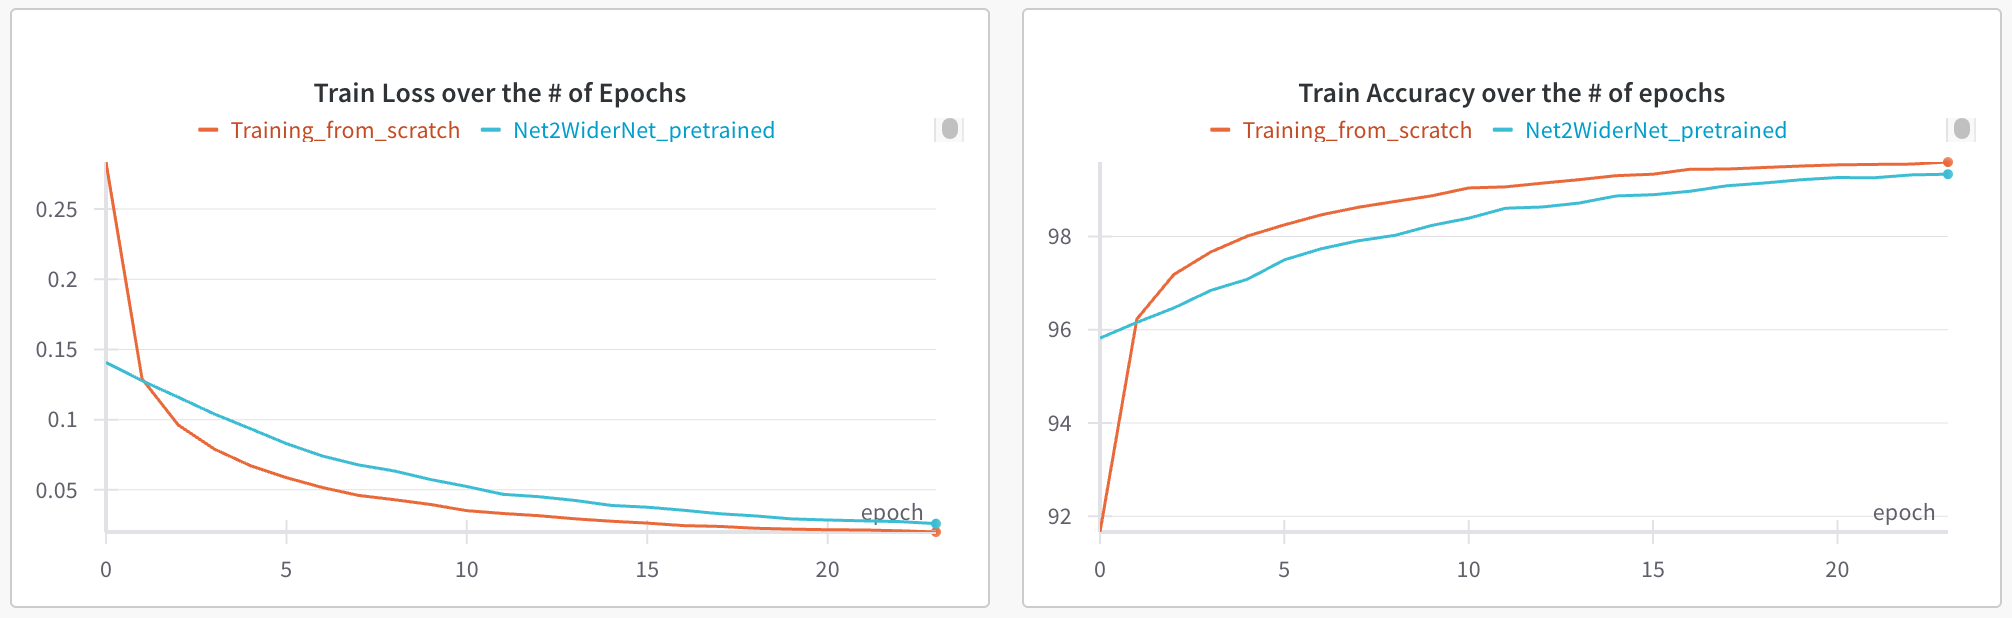

On this graph, the first piece of good news is that the pre-trained model (blue curve) doesn't seem to be doing anything wrong. Indeed, when we look at the logs, performance has only increased even just after the expansion.

Train Acc : 95.58% for the last epoch before growth.  
Train Acc : 95.80% for the first after.

This is a sign that the Net2Net transformation has achieved its objective of function preservation. We then notice that the pre-trained model initially outperforms the scratch model. This is logical, and is the whole point of knowledge transfer.

However, this superiority is very short-lived. Plus, the final accuracy on the test set of the adult is almost matched by the pretrained  network (around 97% for both) but the probable reason would be that the MNIST task is too trivial. We can see that a simple MLP, even in its young form, can manage this task in a few epochs, it has a risk then that knowledge transfer doesn't do much.

Let's not give up hope: let's see how this experiment works on a slightly more complicated task: FashionMNIST.

In [ ]:
!make run-net2net-FashionMNIST-adult-baseline-featuretransfer-strat1

python -m scripts.net2net.net2net_MNIST.train_knowledge_transfer --model adult --strat 1 --no_pretrain_for_baseline --dataset FASHION_MNIST --wandb disabled
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_FASHION_MNIST_2025-04-24_23-13-13

##########
Starting net2net_MNIST ...
Model used: adult | Dataset used: FASHION_MNIST | Growth enabled: False | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw
100% 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100% 29.5k/29.5k [00:00<00:00, 209kB/s]
100% 4.42M/4.42M [00:01<00:00, 3.87MB/s]
100% 5.15k/5.15k [00:00<00:00, 33.4MB/s]

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 50890
The model is :
 SuperBasicMLP_big_strat1(
  (lin1): Linear(in_features=784, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=10, bias=True)
)

Begin training for gr

In [ ]:
!make run-net2net-FashionMNIST-with-growth-featuretransfer-strat1

python -m scripts.net2net.net2net_MNIST.train_knowledge_transfer --model young --strat 1 --dataset FASHION_MNIST --wandb disabled
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_FASHION_MNIST_2025-04-24_23-30-57

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: FASHION_MNIST | Growth enabled: True | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here (Original step)
The number of parameters at this step is: 12730
The model is :
 SuperBasicMLP_strat1(
  (lin1): Linear(in_features=784, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.38| Train Acc : 9.98%
#####################################
Epoch 1/8 | Loss : 0.54| Train Acc : 80.75%


##### Result Analysis: FashionMNIST

Let's visualize our results:


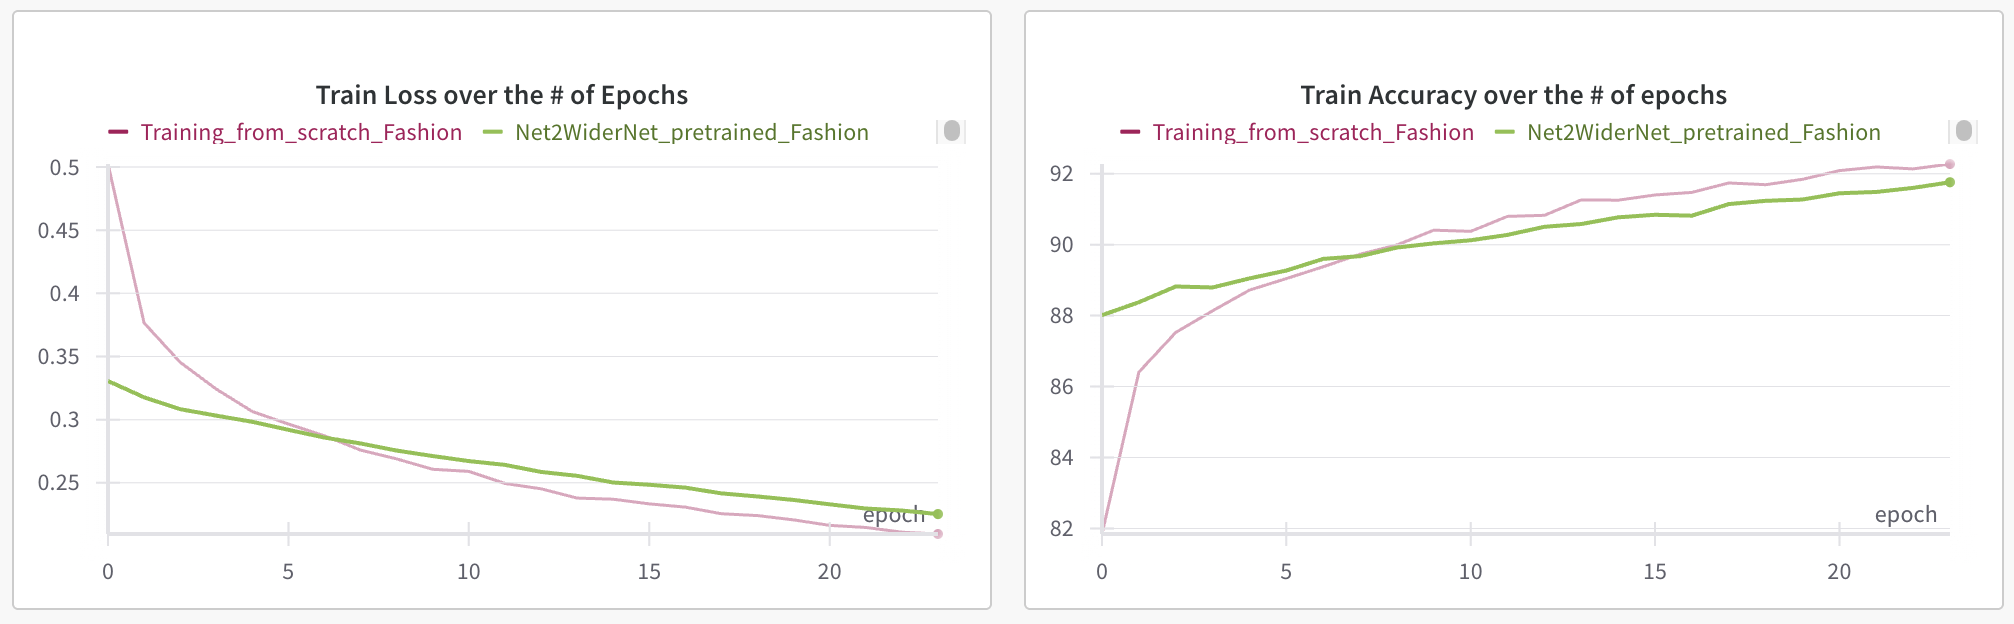

This graph shows that the version with knowledge transfer (KT) statrts with a smaller loss (0.33 against 0.5) and a superior accuracy (88% vs 82%). This shows that the Net2Net transfer gives us a head start. This 6-point difference is greater than for the MNIST experiment, which can be seen as the increased complexity of the FashionMNIST task, which benefits the young model.

It takes around 8 epochs for the scratch model to catch up with the pre-trained one. We can see that the pink model seems to be dragging a little. This may be due to the momentum reset which is slowing it down.

In terms of final performance, the results are fairly similar. The difference in accuracy on the test set is negligible.

So, to sum up, the initial benefit is confirmed but is eroding rapidly, which confirms that the Net2Net rules have been properly implemented, but could be affected by noise or by the optimiser being reset. The same performance ceiling is reached, which is expected for the same capacity.

#### Strategy 2 (Wider + Deeper)

**Model:**
  - (young) ``SuperBasicMLP_strat2`` with Linear(28×28 → 32) → Linear(32 → 10)


```
class SuperBasicMLP_strat2(nn.Module):
    """
    A minimal MLP model used as the 'young' baseline in strategy 2.

    This model consists of a single hidden layer with a ReLU activation,
    followed by a final linear projection to class scores. It is designed
    to be gradually deepened and widened during training.

    Arguments
    ---------
    None

    Attributes
    ----------
    lin1 : nn.Linear
        First linear transformation from flattened input to hidden space.
    lin2 : nn.Linear
        Final projection to class scores.

    Example
    -------
    >>> model = SuperBasicMLP_strat2()
    >>> x = torch.randn(32, 1, 28, 28)
    >>> output = model(x)
    >>> output.shape
    torch.Size([32, 10])
    """

    def __init__(self):
        """
        Initialize the BasicMLP layers.
        """

        super(SuperBasicMLP_strat2, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 32)
        self.lin2 = nn.Linear(32, 10)

    def forward(self, x):
        """
        Perform a forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes).
        """

        x = x.view(x.size(0), -1)
        x = self.lin1(x)
        x = F.relu(x)
        out = self.lin2(x)
        return out
```  


  - (adult) ``SuperBasicMLP_big_strat2`` with Linear(28×28 → 64) → Linear(32 → 64) → Linear(64 → 10)


```
class SuperBasicMLP_big_strat2(nn.Module):
    """
    The 'adult' version of the MLP used in strategy 2, with increased depth and width.

    This model adds an intermediate hidden layer and doubles the capacity of
    the original network. It is used as a reference to evaluate the effectiveness
    of Net2DeeperNet and Net2WiderNet growth applied to the smaller version.

    Arguments
    ---------
    None

    Attributes
    ----------
    lin1 : nn.Linear
        First linear layer from input to hidden space.
    lin2 : nn.Linear
        Second hidden layer expanding the representation.
    lin3 : nn.Linear
        Final projection to class scores.

    Example
    -------
    >>> model = SuperBasicMLP_big_strat2()
    >>> x = torch.randn(32, 1, 28, 28)
    >>> output = model(x)
    >>> output.shape
    torch.Size([32, 10])
    """

    def __init__(self):

        super(SuperBasicMLP_big_strat2, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 32)
        self.lin2 = nn.Linear(32, 64)
        self.lin3 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Perform a forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes).
        """

        x = x.view(x.size(0), -1)
        x = self.lin1(x)
        x = self.lin2(x)
        x = F.relu(x)
        out = self.lin3(x)
        return out
```

**Growth Technique:**  
After a certain number of epochs (8 here), a call to `net2deeper_linear` followed by one to `net2wider_linear` increases the weight of the hidden layer by a factor of 4. During this step, the model goes from 1 to 2 hidden layers and from 32 to 64 neurons one the replicated layer (e.g. same size as the adult).  
Small amount of noise is also added to try to break symmetry and we make sure it is not added to outgoing weights (e.g. the logits) as there is only one hidden layer.



```
     # Growth rules for strategy 2 (Deeper + Wider)
    if strat_number == 2:

        # For the first growth, deepen the model by adding a layer
        if growth_number == 1:

            # Add a new layer using net2deeper
            layer = model.lin1
            duplicated_layer = net2net_ops.net2deeper_linear(layer)
            model.lin1 = duplicated_layer

            # For the second one, make the newly created layer 2 times wider
            layer = model.lin1[1]
            next_layer = model.lin2
            new_width = int(layer.out_features * 2)
            model.lin1[1], model.lin2 = net2net_ops.net2wider_linear(
                layer, next_layer, new_width, noise_std=0.01, last_block=True
            )
        return model
```

**Expected Results:**  

The aim of this experiment is firstly to check whether our functions preserve the function of the model after it has grown.   
It will also be possible to compare this new adult-sized model, which benefits from the knowledge of a smaller model, with another large model which has been trained from scratch.
These were the same as for strategy 1, however, here the depth of the network is also increased. We should be able to see better performance as more non linearity is added.

We saw previously that FashionMNIST was more interesting. We'll stick with it for the next part to avoid overloading the notebook.
The results for strategy 2 on FashionMNIST are the following:

In [ ]:
!make run-net2net-FashionMNIST-adult-baseline-featuretransfer-strat2

python -m scripts.net2net.net2net_MNIST.train_knowledge_transfer --model adult --strat 2 --no_pretrain_for_baseline --dataset FASHION_MNIST --wandb disabled --run_name Training_from_scratch_Fashion-strat2
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_FASHION_MNIST_2025-04-25_00-31-55

##########
Starting net2net_MNIST ...
Model used: adult | Dataset used: FASHION_MNIST | Growth enabled: False | Strat number: 2
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw
100% 26.4M/26.4M [00:02<00:00, 10.5MB/s]
100% 29.5k/29.5k [00:00<00:00, 170kB/s]
100% 4.42M/4.42M [00:01<00:00, 3.29MB/s]
100% 5.15k/5.15k [00:00<00:00, 32.4MB/s]

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 27882
The model is :
 SuperBasicMLP_big_strat2(
  (lin1): Linear(in_features=784, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_

In [ ]:
!make run-net2net-FashionMNIST-with-growth-featuretransfer-strat2

python -m scripts.net2net.net2net_MNIST.train_knowledge_transfer --model young --strat 2 --dataset FASHION_MNIST --wandb disabled --run_name Net2WiderNet_pretrained_Fashion-strat2
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_FASHION_MNIST_2025-04-25_00-38-56

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: FASHION_MNIST | Growth enabled: True | Strat number: 2
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here (Original step)
The number of parameters at this step is: 25450
The model is :
 SuperBasicMLP_strat2(
  (lin1): Linear(in_features=784, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.34| Train Acc : 5.56%
################################

##### Results analysis: FashionMNIST

Once visualized:
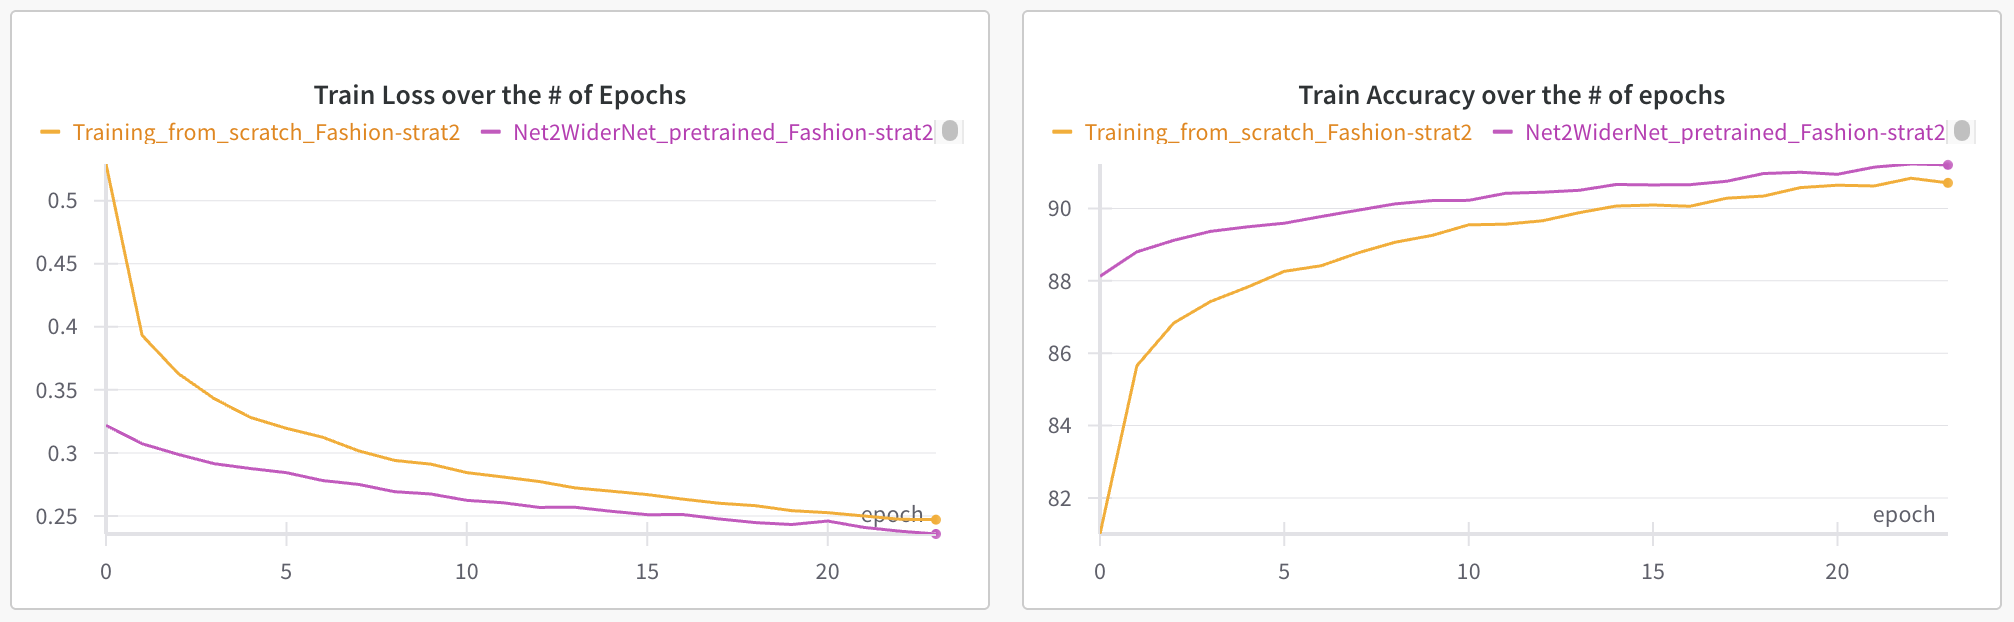

Again, looking at the logs, one can see that our net2deeper transformation is performing well has the model preserves the function.

On this graph, a big difference from the previous ones is that the advantage of the pre-trained model is never caught up by the scratch model. The gap at the start is the same as for wider, at around 6 points.

Why does it work better? First of all, the identity layer seems to be safer from the outset because it doesn't interfere with the features. What's more, there are fewer duplicate weights in this experiment, so there's less noise too.

However, we must point out that the test does not seem to benefit from this advantage (87.57% and 87.43%).

#### Summary
In these scenarios, we've seen some potentials, especially the last one. By benefiting from the knowledge of a smaller model, it is possible to explore larger ones, with a final performance that matches that of a model trained from scratch. By using Net2Net, no knowledge is lost and the new model immediately performs as well as the previous trained model. However, these results are still open to a lot of potential improvements and questions, as they only cover cases that remain basic. I'm aware of this, but my more advanced attempts have not borne fruit.

### Part 2 - Grow during training using Net2Net on MNIST/Fashion MNIST

In this part the objective is to observe what happens when we grow a model based on some predefined strategies. The growth will be performed using the Net2Net transformations and happens during the training. The growth epochs are predefined and the results will compare the young and adult baseline models to the growing model.

We will study 3 strategies:

1.   Wider
2.   Wider + Deeper
3.   Wider + BN

The goal of it is to pave the way for more advanced applications and study the behavior of simple model when they grow.

As in part 1, we will have a closer look at the recipe. More details are available in the header:

In [ ]:
raise RuntimeError("This cell is not intended to be executed; "
                   + "it is there to make the code easier to understand with the help of the explanations.")

"""
net2net_MNIST/train.py

Net2Net Growth Recipe for MNIST and FashionMNIST
================================================

Author
------
Sam Collin

Framework
---------
PyTorch (inspired by SpeechBrain recipe structure)

Description
-----------
This script implements a flexible training pipeline for Multi-Layer Perceptrons
on MNIST and Fashion-MNIST, augmented with dynamic “Net2Net” growth operations.
Supported growth strategies:
  1. Strategy 1 (Wider)        : Net2Wider — widen the first hidden layer.
  2. Strategy 2 (Deeper + Wider): Net2Deeper then Net2Wider on the inserted layer.
  3. Strategy 3 (Wider + BN)    : Net2Wider with BatchNorm1d

Key Features
------------
- Apply multiple growth steps (controlled by N_GROWTH)
- Preserve learned function at each growth via weight-transfer
- Reproducibility ensured by fixed random seeds
- Detailed logging and metric saving at every growth stage
- Optional W&B integration for real-time experiment tracking

Usage
-----
Run from project root:
    python scripts/net2net/net2net_MNIST/train.py \
        --model young \
        --strat 1 \
        --dataset MNIST \
        [--no_growth_for_baseline] \
        [--wandb online] \
        [--run_name <name>]
"""

import os
import sys
import torch
import argparse
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as tf
import torch.nn as nn
import time
import wandb

import scripts.net2net.net2net_MNIST.net2net_ops as net2net_ops
import scripts.net2net.logger as logger
import scripts.utils as utils
import scripts.net2net.utils_net2net as utils_net2net
import scripts.net2net.net2net_MNIST.model as models

# Argument Parser inspired by the one in speechbrain
parser = argparse.ArgumentParser()
parser.add_argument("--model", type=str, default="young", choices=["young", "adult"])
parser.add_argument("--strat", type=int, default=1, choices=[1, 2, 3])
parser.add_argument("--no_growth_for_baseline", action="store_true")
parser.add_argument("--dataset", default="MNIST", choices=["MNIST", "FASHION_MNIST"])
parser.add_argument("--wandb", default="disabled", choices=["disabled", "online"])
parser.add_argument("--run_name", type=str, default="xyz")
command_line_args = parser.parse_args()

# == Hparams == #
STRAT_NUMBER = command_line_args.strat
BATCH_SIZE = 64
LEARNING_RATE = 0.01
N_EPOCHS_BEFORE_GROW = 8
N_GROWTH = 2
WEIGHT_DECAY = 0.0005
MOMENTUM = 0.9

# If required, instantiate a new wandb run
wandb.init(
    mode=command_line_args.wandb,
    project="growth-Net2Net",
    name=command_line_args.run_name,
    config=dict(
        baseline=command_line_args.no_growth_for_baseline,
        model=command_line_args.model,
        strategy=STRAT_NUMBER,
        dataset=command_line_args.dataset,
        batch_size=BATCH_SIZE,
        lr=LEARNING_RATE,
        w_decay=WEIGHT_DECAY,
        momentum=MOMENTUM,
        n_growth=N_GROWTH,
        n_epochs_before_grow=N_EPOCHS_BEFORE_GROW,
    ),
)


# == Pre-Processing == #
preprocess_MNIST = tf.Compose([tf.ToTensor(), tf.Normalize((0.1307,), (0.3081,))])
preprocess_FASHION = tf.Compose([tf.ToTensor(), tf.Normalize((0.2860,), (0.3530,))])

# == Models == #
model_dict = {
    "model_young_strat1": models.SuperBasicMLP_strat1,
    "model_adult_strat1": models.SuperBasicMLP_big_strat1,
    "model_young_strat2": models.SuperBasicMLP_strat2,
    "model_adult_strat2": models.SuperBasicMLP_big_strat2,
    "model_young_strat3": models.SuperBasicMLP_BN1D,
    "model_adult_strat3": models.SuperBasicMLP_big_BN1D,
}


# == Functions == #
def growth_strategy(model, growth_number, strat_number=STRAT_NUMBER):
    """
    Applies a growth transformation to a given model according to the specified strategy.

    This function supports multiple growth strategies for widening or deepening
    the architecture of a neural network during training (e.g., Net2Net).

    Args:
        model (nn.Module): The model to be grown.
        growth_number (int): The growth stage index. Used to decide which growth operation to apply
                            (e.g., for multi-step strategies).
        strat_number (int, optional): The strategy index to use for growing the network.
                                    Defaults to the global STRAT_NUMBER.

    Supported Strategies:
        - Strategy 1: Net2Wider applied on a two-layer MLP (lin1 → lin2).
        - Strategy 2:
            - Step 1: Net2Deeper inserted between input and hidden (lin1 becomes Sequential).
            - Step 2: Net2Wider applied on the inner hidden layer and lin2.
        - Strategy 3: Net2Wider with BatchNorm support.

    Returns:
        nn.Module: The updated model with increased capacity according to the selected strategy.

    Raises:
        ValueError: If an unknown strategy number is provided.

    Example:
        >>> model = SuperBasicMLP_strat1()
        >>> model = growth_strategy(model, growth_number=1, strat_number=1)
    """
    # In any case, the first set of epoch will be done without any growth
    if growth_number == 0:
        print("No growth here (Original step)")
        return model

    # Growth rules for strategy 1 (Wider)
    if strat_number == 1:

        # Retrieve the current layers
        print("Model growing ...")
        layer, next_layer = model.lin1, model.lin2

        # Make the hidden layer four times wider using net2wider at each growth
        new_width = int(layer.out_features * 2)
        new_layer, new_next_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, noise_std=0.01, last_block=True
        )
        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer

        return model

    # Growth rules for strategy 2 (Deeper + Wider)
    if strat_number == 2:

        # For the first growth, deepen the model by adding a layer
        if growth_number == 1:

            # Add a new layer using net2deeper
            layer = model.lin1
            duplicated_layer = net2net_ops.net2deeper_linear(layer)
            model.lin1 = duplicated_layer
            return model

        # For the second one, make the newly created layer 2 times wider
        if growth_number == 2:
            layer = model.lin1[1]
            next_layer = model.lin2
            new_width = int(layer.out_features * 2)
            model.lin1[1], model.lin2 = net2net_ops.net2wider_linear(
                layer, next_layer, new_width
            )
            return model

    # Growth rules for strategy 3 (Wider + BatchNorm)
    if strat_number == 3:

        # Retrieve the layers + the batchnorm layer
        print("Model growing ...")
        layer, next_layer, norm_layer = model.lin1, model.lin2, model.norm

        # Make the hidden layer two times wider using net2wider at each growth
        new_width = int(layer.out_features * 2)
        new_layer, new_next_layer, new_norm_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, norm_layer, noise_std=0.01, last_block=True
        )

        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer
        model.norm = new_norm_layer

        return model

    else:
        raise ValueError(f"No strategy implemented for number {strat_number}.")


def train(train_loader, test_loader, model, epochs, criterion, optimizer, device="cpu"):
    """
    Train a model on a given dataset.

    Args:
        train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
        model (torch.nn.Module): The model to train.
        epochs (int): Number of training epochs.
        criterion (torch.nn.Module): Loss function to optimize.
        optimizer (torch.optim.Optimizer): Optimizer to update model weights.
        device (str, optional): Device to use ("cpu", "cuda", "mps"). Default is "cpu".

    Returns:
        tuple:
            - train_losses (list of float): List of epoch-wise training losses.
            - train_accs (list of float): List of epoch-wise training accuracies.
            - final_epoch_loss (float): Final epoch loss.
            - final_epoch_acc (float): Final epoch accuracy.

    Example:
        >>> train_losses, train_accs, final_loss, final_acc = train(
        >>>     train_loader, model, epochs=10, criterion=loss_fn, optimizer=opt, device="cpu"
        >>> )
    """

    model.train()

    train_losses = []
    train_accs = []

    for epoch in range(epochs):

        epoch_correct = 0
        epoch_loss = 0
        n_samples = 0

        for data, target in train_loader:

            n_correct_predictions = 0

            # move to GPU if available
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()

            # Forward pass
            output = model(data)

            loss = criterion(output, target)

            loss.backward()
            optimizer.step()

            # Compute the # of correct predictions
            n_correct_predictions = utils_net2net.compute_n_correct(output, target)

            epoch_loss += loss.item() * data.size(0)
            epoch_correct += n_correct_predictions
            n_samples += data.size(0)

        epoch_loss /= n_samples
        epoch_acc = (epoch_correct / n_samples) * 100

        test_loss, test_acc = evaluate(
            test_loader,
            model=model,
            criterion=criterion,
            device=device,
            train=True,
        )
        model.train()
        wandb.log(
            {
                "train_loss": epoch_loss,
                "train_acc": epoch_acc,
                "epoch": epoch,
                "test_loss": test_loss,
                "test_acc": test_acc,
            }
        )
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        print(
            f"Epoch {epoch+1}/{epochs} "
            + f"| Loss : {epoch_loss:.2f}"
            + f"| Train Acc : {epoch_acc:.2f}%"
        )

    return train_losses, train_accs, epoch_loss, epoch_acc


def evaluate(test_loader, model, criterion, device="cpu", train=False):
    """
    Evaluate a model on a given test dataset.

    Args:
        test_loader (torch.utils.data.DataLoader): DataLoader for the test dataset.
        model (torch.nn.Module): The model to evaluate.
        criterion (torch.nn.Module): Loss function used during evaluation.
        device (str, optional): Device to use ("cpu", "cuda", or "mps"). Default is "cpu".
        train (bool, optional): If True, suppress evaluation printing (e.g., during training). Default is False.

    Returns:
        tuple:
            - test_loss (float): Average loss over the test set.
            - test_acc (float): Accuracy (%) over the test set.

    Example:
        >>> test_loss, test_acc = evaluate(
        >>>     test_loader, model=model, criterion=loss_fn, device="cpu"
        >>> )
    """
    model.eval()

    test_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data, target in test_loader:
            # Copy data and targets to GPU
            data = data.to(device)
            target = target.to(device)

            # Do a forward pass
            output = model(data)

            # Calculate the loss
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)

            # Count number of correct digits
            total_correct += utils_net2net.compute_n_correct(output, target)
            total_samples += data.size(0)

    test_loss = test_loss / total_samples
    test_acc = (total_correct / total_samples) * 100

    # Just make sure that we display it when really evaluating on the test set
    if not train:
        print(f"Evaluation -> Loss: {test_loss:.3f}, Accuracy: {test_acc:.2f}%")

    return test_loss, test_acc


if __name__ == "__main__":
    """
    Main entry point for the training and evaluation pipeline.

    This function initializes data loaders, model, optimizer,
    and loss function, then trains and evaluates the model.
    It optionally applies a growth strategy at predefined points to
    increase model capacity during training.

    Typical steps:
    1. Load and preprocess the dataset.
    2. Initialize model, loss, and optimizer.
    3. Train the model (possibly applying a growth strategy mid-training).
    4. Evaluate the model on test data.
    5. Save or log the results.

    Returns:
        None
    """

    # Set the seed, the result folder and create the logger for the results
    utils.seed_everything(691)
    device = utils.get_device()
    project_folder = utils.get_project_root()
    data_folder = utils.get_data_folder()
    results_dir = utils_net2net.create_result_dir(
        task_name=f"net2net_{command_line_args.dataset}"
    )
    sys.stdout = logger.Logger(os.path.join(results_dir, "train_log.txt"))

    NO_GROWTH_BASELINE = command_line_args.no_growth_for_baseline

    # Diplay run info
    print(
        "\n##########"
        + "\nStarting net2net_MNIST ..."
        + f"\nModel used: {command_line_args.model} "
        + f"| Dataset used: {command_line_args.dataset} "
        + f"| Growth enabled: {not NO_GROWTH_BASELINE} "
        + f"| Strat number: {STRAT_NUMBER}"
        + "\n##########"
    )

    # Import data
    print(f"\nData will be saved (if not already) in:\n{data_folder}")

    # MNIST
    if command_line_args.dataset == "MNIST":
        train_dataset = datasets.MNIST(
            root=data_folder, train=True, download=True, transform=preprocess_MNIST
        )
        test_dataset = datasets.MNIST(
            root=data_folder, train=False, download=True, transform=preprocess_MNIST
        )
    # Fashion MNIST
    elif command_line_args.dataset == "FASHION_MNIST":
        train_dataset = datasets.FashionMNIST(
            root=data_folder, train=True, download=True, transform=preprocess_FASHION
        )
        test_dataset = datasets.FashionMNIST(
            root=data_folder, train=False, download=True, transform=preprocess_FASHION
        )

    train_loader = DataLoader(
        dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True
    )

    test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Choose model (young is the small version, adult is the final)
    model = model_dict[f"model_{command_line_args.model}_strat{STRAT_NUMBER}"]().to(
        device
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(
        model.parameters(),
        lr=LEARNING_RATE,
        momentum=MOMENTUM,
        weight_decay=WEIGHT_DECAY,
    )

    global_losses_over_growth = []
    global_accs_over_growth = []
    global_train_duration = 0

    print("\nStart training for multiple growth ...")
    for growth_number in range(N_GROWTH + 1):

        growth_results_dir = os.path.join(results_dir, f"growth{growth_number}")
        os.makedirs(growth_results_dir, exist_ok=True)

        # Check wether a growth strat is required
        print(f"\nBegin step {growth_number}")
        if not NO_GROWTH_BASELINE:
            model = growth_strategy(model, growth_number, STRAT_NUMBER)
            model = model.to(device)
            optimizer = torch.optim.SGD(
                model.parameters(),
                lr=LEARNING_RATE,
                momentum=MOMENTUM,
                weight_decay=WEIGHT_DECAY,
            )

        else:
            print("No growth here")

        # Compare the number of parameters
        n_parameters = utils.count_parameters(model)
        print(f"The number of parameters at this step is: {n_parameters}")
        print("The model is :\n", model)
        print(f"\nBegin training for growth step {growth_number}...")
        wandb.log({"n_params": n_parameters})

        # Evaluate model raw after growth on the train set (Check for function preserving)
        train_loss, train_acc = evaluate(
            train_loader, model=model, criterion=criterion, device=device, train=True
        )
        # Display it in the logs
        print(
            "\n###### Pre-Training Evaluation ######\n"
            + f"Epoch 0/{N_EPOCHS_BEFORE_GROW} "
            + f"| Loss : {train_loss:.2f}"
            + f"| Train Acc : {train_acc:.2f}%\n"
            + "#####################################"
        )
        # Train the new model
        begin = time.time()
        train_losses, train_accs, final_loss, final_acc = train(
            train_loader,
            test_loader,
            model=model,
            epochs=N_EPOCHS_BEFORE_GROW,
            criterion=criterion,
            optimizer=optimizer,
            device=device,
        )
        end = time.time()
        step_train_duration = end - begin
        global_train_duration += step_train_duration
        print(f"Training finished in {step_train_duration:.2f}s")

        print("\nStart evaluation ...")
        test_loss, test_acc = evaluate(
            test_loader, model=model, criterion=criterion, device=device
        )

        # Save final model
        torch.save(
            model.state_dict(),
            os.path.join(growth_results_dir, f"model_final_growth{growth_number}.pt"),
        )

        # Save metrics
        utils_net2net.save_training_curves(train_losses, train_accs, growth_results_dir)
        utils_net2net.save_metrics(
            {
                f"n_parameters_step{growth_number}": n_parameters,
                f"train_final_loss_step{growth_number}": final_loss,
                f"train_final_acc_step{growth_number}": final_acc,
                f"test_final_loss_step{growth_number}": test_loss,
                f"test_final_acc_step{growth_number}": test_acc,
                f"train_duration_step{growth_number}": step_train_duration,
            },
            growth_results_dir,
        )

        global_losses_over_growth.extend(train_losses)
        global_accs_over_growth.extend(train_accs)

    wandb.log(
        {
            "final_test_loss": test_loss,
            "final_test_accuracy": test_acc,
            "train_duration": global_train_duration,
        }
    )

    # Create learning curves that will be saved with the results
    utils_net2net.save_training_curves(
        global_losses_over_growth, global_accs_over_growth, results_dir
    )
    utils_net2net.save_metrics(
        {
            "m_parameters_final": n_parameters,
            "train_final_loss": final_loss,
            "train_final_acc": final_acc,
            "test_final_loss": test_loss,
            "test_final_acc": test_acc,
            "global_train_duration": global_train_duration,
        },
        results_dir,
    )

    print(
        "\nGlobal Experiment finished with a total"
        + f" training time of {global_train_duration:.2f}s"
    )
    print(f"Detailed results available in {results_dir}\n")



#### Strategy 1: (Wider)
**Model:**
  - (young) ``SuperBasicMLP_strat1`` with Linear(28×28 → 16) → Linear(16 → 10)


```
class SuperBasicMLP_strat1(nn.Module):
    """
    A minimal Multi-Layer Perceptron (MLP) for MNIST-like classification tasks.

    This model flattens 28x28 input images and applies two linear layers with
    ReLU activation in between. It is designed as a simple baseline architecture
    for experiments involving model growth.

    Architecture:
        - Linear(784 → 16) + ReLU
        - Linear(16 → 10)

    Example:
        >>> model = SuperBasicMLP_strat1()
        >>> x = torch.randn(32, 1, 28, 28)
        >>> output = model(x)
        >>> output.shape
        torch.Size([32, 10])
    """

    def __init__(self):
        """
        Initializes the MLP with two fully connected layers.
        """

        super(SuperBasicMLP_strat1, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 16)
        self.lin2 = nn.Linear(16, 10)

    def forward(self, x):
        """
        Forward pass through the MLP.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10).
        """

        x = x.view(x.size(0), -1)
        x = F.relu(self.lin1(x))
        out = self.lin2(x)
        return out
```  


  - (adult) ``SuperBasicMLP_big_strat1`` with Linear(28×28 → 64) → Linear(64 → 10)  


```
class SuperBasicMLP_big_strat1(nn.Module):
    """
    A larger variant of the SuperBasicMLP model for MNIST classification.

    This model increases the capacity of the hidden layer to 128 units,
    allowing more complex representations compared to the smaller version.

    Architecture:
        - Linear(784 → 64) + ReLU
        - Linear(64 → 10)

    Example:
        >>> model = SuperBasicMLP_big_strat1()
        >>> x = torch.randn(32, 1, 28, 28)
        >>> output = model(x)
        >>> output.shape
        torch.Size([32, 10])
    """

    def __init__(self):
        """
        Initializes the larger MLP with a wider hidden layer.
        """
        super(SuperBasicMLP_big_strat1, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 128)
        self.lin2 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 10).
        """

        x = x.view(x.size(0), -1)
        x = F.relu(self.lin1(x))
        out = self.lin2(x)
        return out
```

**Growth Technique:**  
After a certain number of epochs (8 here), a call to ``net2wider_linear`` increases the weight by a factor of 2. As there are two growth step, the model goes from 16 to 32 and finally to 64 (e.g. same size as the adult).  
Small amount of noise is also added to try to break symmetry and we make sure it is not added to outgoing weights (e.g. the logits) as there is only one hidden layer.



```
# Growth rules for strategy 1 (Wider)
    if strat_number == 1:

        # Retrieve the current layers
        print("Model growing ...")
        layer, next_layer = model.lin1, model.lin2

        # Make the hidden layer four times wider using net2wider at each growth
        new_width = int(layer.out_features * 2)
        new_layer, new_next_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, noise_std=0.01, last_block=True
        )
        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer

        return model
```

**Experiments settings:**  
To be able to analyse efficiently the growth, we will use a young and adult baseline, respectively the initial and final model that are just trained from scratch for the same number of epoch without any growing techniques.

**Expected Results:**  
 - From this experiment, we should see the model that preserves the function after the growth (i.e. the accuracy should remain in the same range). This will highlights the function preserving aspect of the net2wider transformation on linear layers.
 - With the same final capacity as the adult, the model should at least beat the young baseline.
 - It might be faster overall with growth as the model has less parameter to train initially.







Let's start with the young baseline:

Recall:  
Model used: young | Dataset used: MNIST | Growth enabled: False | Strat number: 1

In [ ]:
!make run-net2net-MNIST-without-growth_young-strat1

python -m scripts.net2net.net2net_MNIST.train --model young --strat 1 --dataset MNIST --no_growth_for_baseline --wandb disabled --run_name MNIST-without-growth_young-strat1
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_06-58-49

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: False | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw
100% 9.91M/9.91M [00:00<00:00, 11.5MB/s]
100% 28.9k/28.9k [00:00<00:00, 338kB/s]
100% 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100% 4.54k/4.54k [00:00<00:00, 9.52MB/s]

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 12730
The model is :
 SuperBasicMLP_strat1(
  (lin1): Linear(in_features=784, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=10, bias=True)
)

Begin training for growth

Now that we've set the young baseline, let's run the adult from scratch. The performance should be higher.

Recal:  
Model used: adult | Dataset used: MNIST | Growth enabled: False | Strat number: 1

In [ ]:
!make run-net2net-MNIST-without-growth_adult-strat1

python -m scripts.net2net.net2net_MNIST.train --model adult --strat 1 --dataset MNIST --no_growth_for_baseline  --wandb disabled --run_name MNIST-without-growth_adult-strat1
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_07-24-20

##########
Starting net2net_MNIST ...
Model used: adult | Dataset used: MNIST | Growth enabled: False | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 50890
The model is :
 SuperBasicMLP_big_strat1(
  (lin1): Linear(in_features=784, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.35| Train Acc : 3.93%
#####################################
Epoch 1/8 | Loss : 0.28| Tr

Finally, we can run the growing model that will reach the size of the adult one from the young one and have a look at the results:

Recal:  
Model used: young | Dataset used: MNIST | Growth enabled: True | Strat number: 1  
Strategy is to widen the layer by a factor of 2 at each growth step.

In [ ]:
!make run-net2net-MNIST-with-growth-strat1

python -m scripts.net2net.net2net_MNIST.train --model young --strat 1 --dataset MNIST --wandb disabled --run_name MNIST-with-growth-strat1
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_07-13-42

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: True | Strat number: 1
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here (Original step)
The number of parameters at this step is: 12730
The model is :
 SuperBasicMLP_strat1(
  (lin1): Linear(in_features=784, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.36| Train Acc : 8.21%
#####################################
Epoch 1/8 | Loss : 0.35| Train Acc : 89.74%
Epoch 2

##### Results Analysis: MNIST

The following information can be retrieved form the previous experiments:


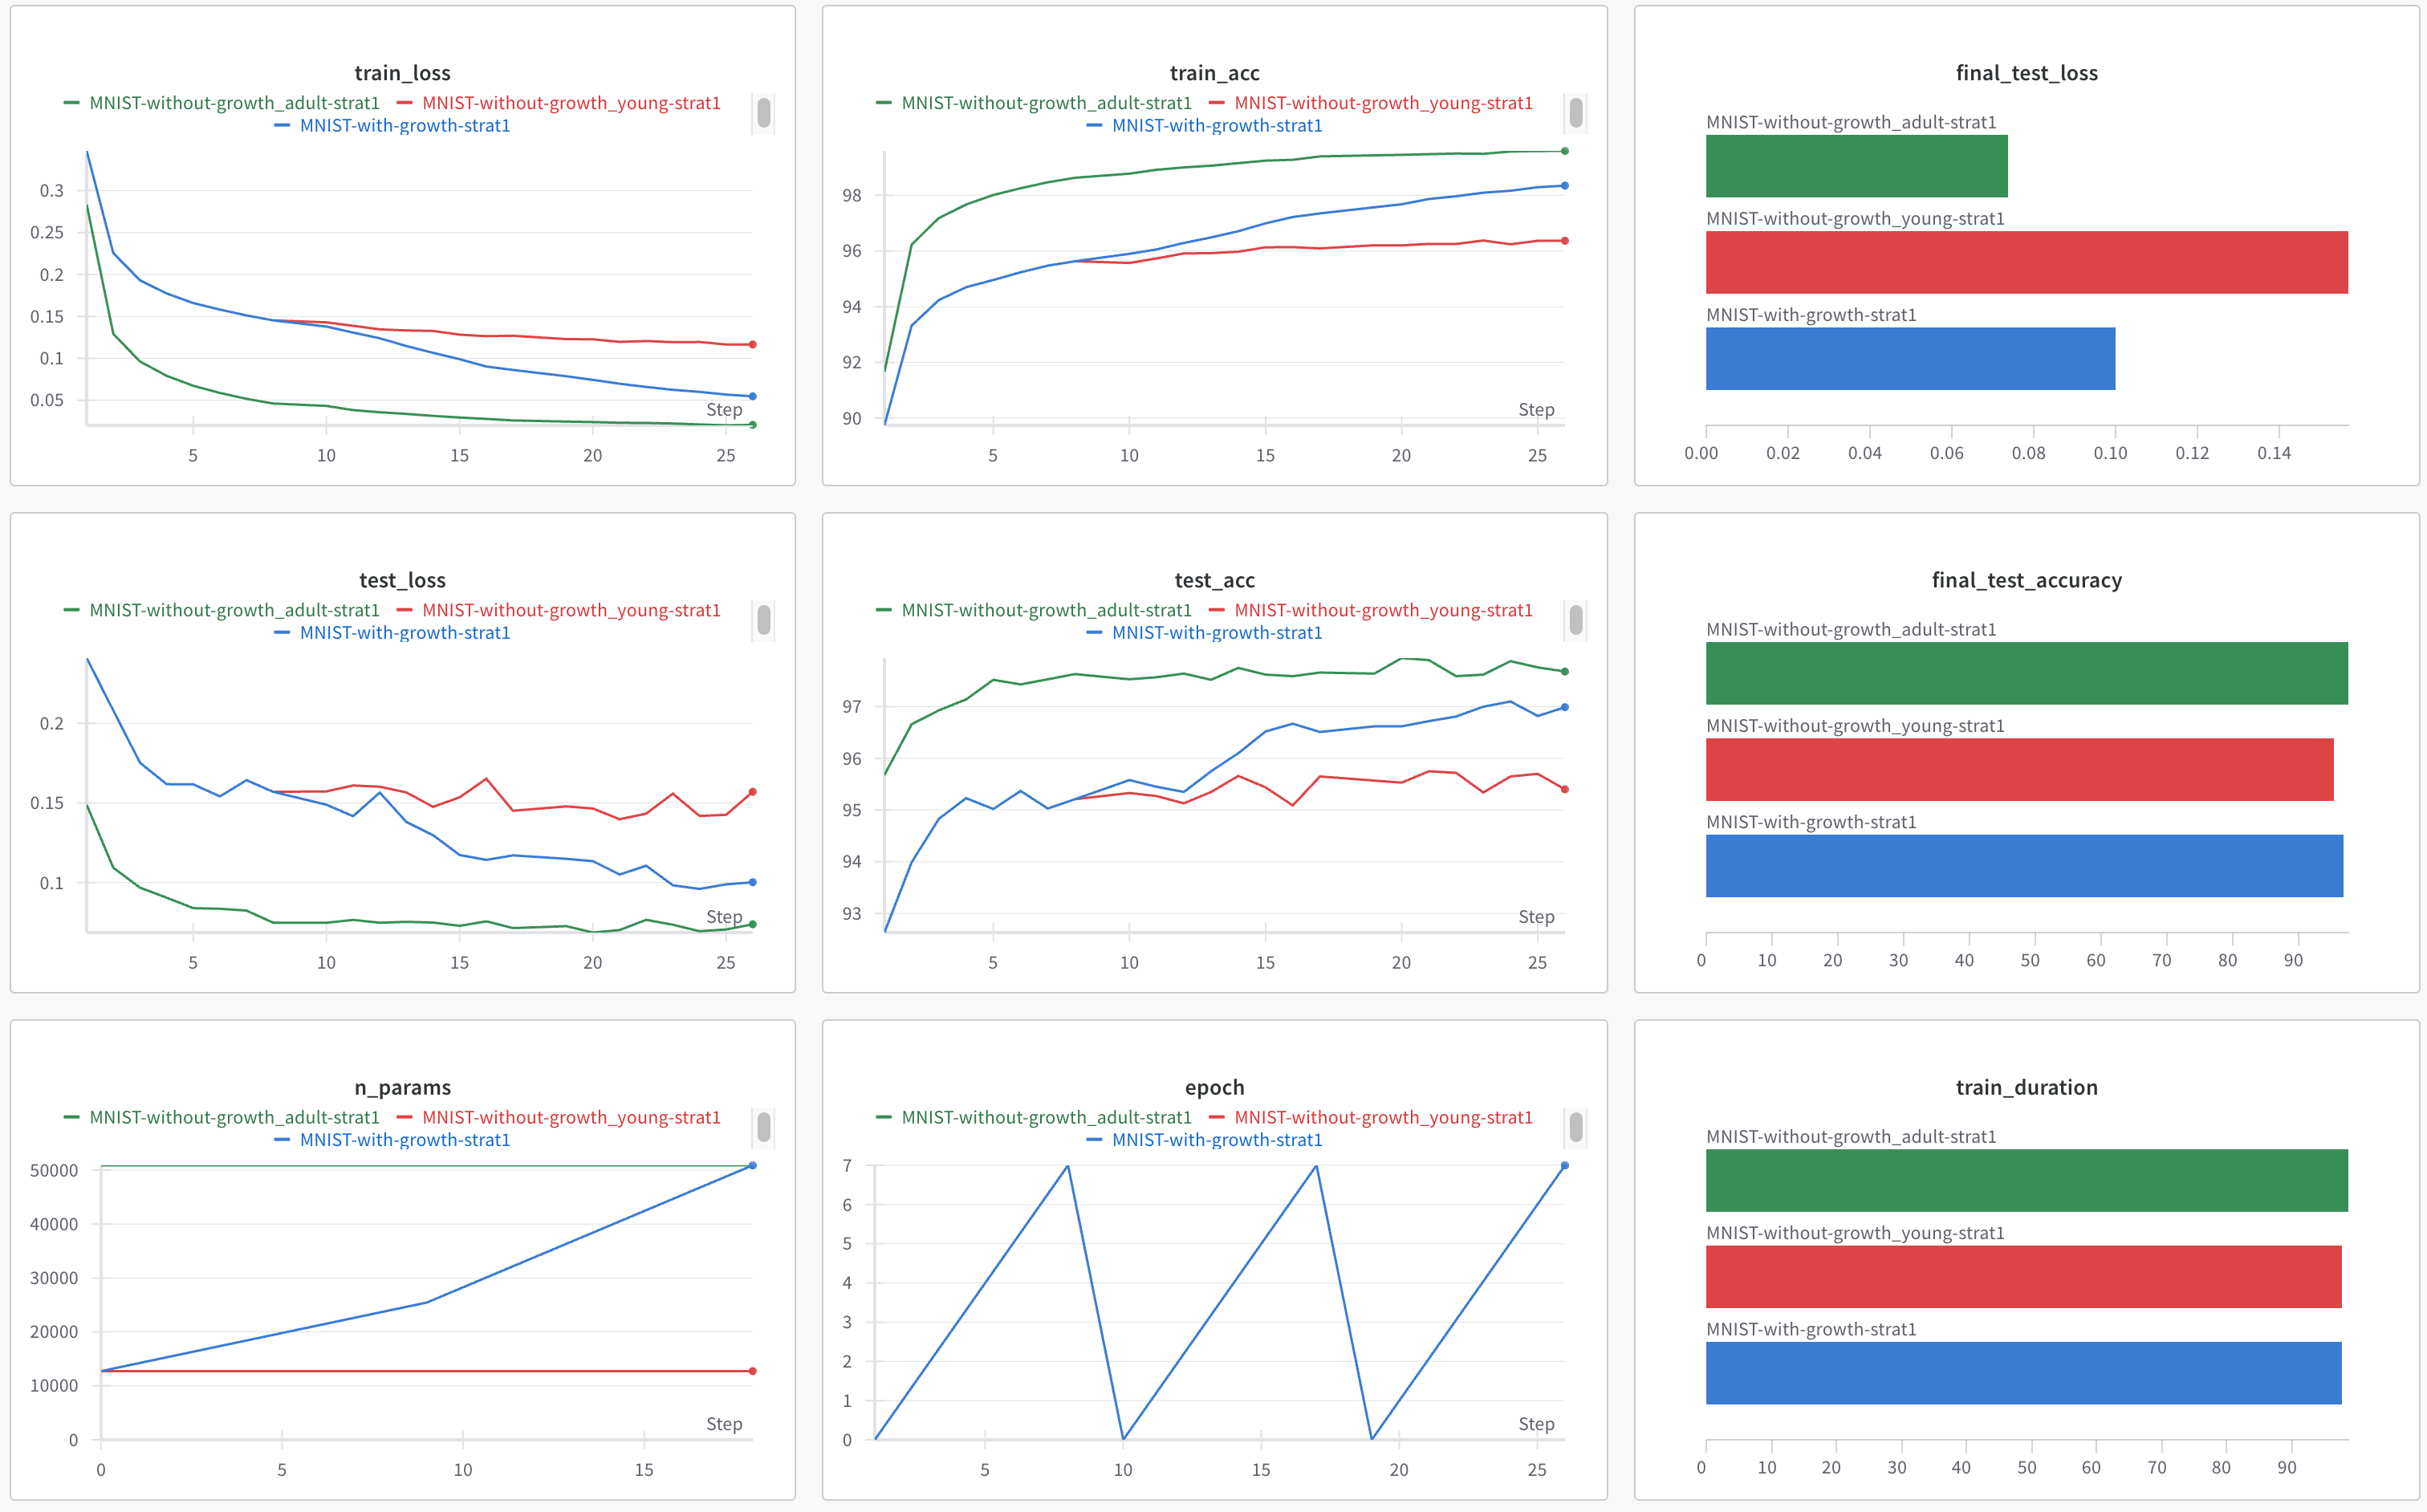

These graphs are very interesting:

One can see the immediate gain in capacity. As soon as Net2Wider is applied (epoch 8), accuracy increases and loss decreases more rapidly than when compared with the young model, which does not benefit from this expansion. The second growth has the same effect but to a much lesser extent.

This proves that our growth is working, and it gives the model more power.

The growing model is close to the adult model at the end of the experiment, which is a sign that it is not getting lost along the way.

It achieves almost the same final training loss and is very close to the accuracy test. This is a good thing because it achieves this performance using the same number of parameters, however, it spent 1/3 of the experiment with 4x fewer neurons and a second third with 2x fewer. If we imagine the same thing on large networks, this technique is very interesting because it can save a large amount of computational resources.

Finally, the training duration time is interesting too. We can see that the young baseline has a global training duration 97.77s where the growing module takes 97.86s. In contrast, the adult reference model takes 98.73s. While these differences may not seem huge at first glance, on such small models they reveal something interesting.  This information should be taken with caution, however, as no in-depth study has been carried out, but these differences between the values have always been more or less the same in my experiments. (Given values are from my Mac M4 Pro computations, it seems to be different and much longer on colab, even if running on GPU. My Colab seems really slow and less responsive as I’m writing the report, I don’t if it is related to performances)

#### Strategy 2 (Wider + Deeper)



 **Model:**
  - (young) ``SuperBasicMLP_strat2`` with Linear(28×28 → 32) → Linear(32 → 10)


```
class SuperBasicMLP_strat2(nn.Module):
    """
    A minimal MLP model used as the 'young' baseline in strategy 2.

    This model consists of a single hidden layer with a ReLU activation,
    followed by a final linear projection to class scores. It is designed
    to be gradually deepened and widened during training.

    Arguments
    ---------
    None

    Attributes
    ----------
    lin1 : nn.Linear
        First linear transformation from flattened input to hidden space.
    lin2 : nn.Linear
        Final projection to class scores.

    Example
    -------
    >>> model = SuperBasicMLP_strat2()
    >>> x = torch.randn(32, 1, 28, 28)
    >>> output = model(x)
    >>> output.shape
    torch.Size([32, 10])
    """

    def __init__(self):
        """
        Initialize the BasicMLP layers.
        """

        super(SuperBasicMLP_strat2, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 32)
        self.lin2 = nn.Linear(32, 10)

    def forward(self, x):
        """
        Perform a forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes).
        """

        x = x.view(x.size(0), -1)
        x = self.lin1(x)
        x = F.relu(x)
        out = self.lin2(x)
        return out
```  


  - (adult) ``SuperBasicMLP_big_strat2`` with Linear(28×28 → 32) → Linear(32 → 64) → Linear(64 → 10)  


```
class SuperBasicMLP_big_strat2(nn.Module):
    """
    The 'adult' version of the MLP used in strategy 2, with increased depth and width.

    This model adds an intermediate hidden layer and doubles the capacity of
    the original network. It is used as a reference to evaluate the effectiveness
    of Net2DeeperNet and Net2WiderNet growth applied to the smaller version.

    Arguments
    ---------
    None

    Attributes
    ----------
    lin1 : nn.Linear
        First linear layer from input to hidden space.
    lin2 : nn.Linear
        Second hidden layer expanding the representation.
    lin3 : nn.Linear
        Final projection to class scores.

    Example
    -------
    >>> model = SuperBasicMLP_big_strat2()
    >>> x = torch.randn(32, 1, 28, 28)
    >>> output = model(x)
    >>> output.shape
    torch.Size([32, 10])
    """

    def __init__(self):

        super(SuperBasicMLP_big_strat2, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 32)
        self.lin2 = nn.Linear(32, 64)
        self.lin3 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Perform a forward pass through the network.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes).
        """

        x = x.view(x.size(0), -1)
        x = self.lin1(x)
        x = self.lin2(x)
        x = F.relu(x)
        out = self.lin3(x)
        return out
```

**Growth Technique:**  
After a certain number of epochs (8 here), a first call to ``net2deeper_linear`` increases the depth by adding a fully connected layer. At epoch 16, it is followed by a net2Wider expnsion of the new layer from 32 units to 64 (e.g. the same size as the adult model).  
Small amount of noise is also added to try to break symmetry and we make sure it is not added to outgoing weights (e.g. the logits) as there is only one hidden layer. As stated in the paper, noise is not added when using deeper transformation.



```
# Growth rules for strategy 2 (Deeper + Wider)
    if strat_number == 2:

        # For the first growth, deepen the model by adding a layer
        if growth_number == 1:

            # Add a new layer using net2deeper
            layer = model.lin1
            duplicated_layer = net2net_ops.net2deeper_linear(layer)
            model.lin1 = duplicated_layer
            return model

        # For the second one, make the newly created layer 2 times wider
        if growth_number == 2:
            layer = model.lin1[1]
            next_layer = model.lin2
            new_width = int(layer.out_features * 2)
            model.lin1[1], model.lin2 = net2net_ops.net2wider_linear(
                layer, next_layer, new_width
            )
            return model
```

**Experiments settings:**  
Same as before, to be able to analyse efficiently the growth, we will use a young and adult baseline, respectively the initial and final model that are just trained from scratch for the same number of epoch without any growing techniques.

**Expected Results:**  
 - From this experiment, we should see the model that preserves the function after the growth (i.e. the accuracy should remain in the same range). This will highlights the function preserving aspect of the net2wider and the net2deeper transformation on linear layers.
 - With the same final capacity as the adult, the model should at least beat the young baseline.
 - It might be faster overall with growth as the model has less parameter to train initially.

In [ ]:
!make run-net2net-MNIST-without-growth_young-strat2

python -m scripts.net2net.net2net_MNIST.train --model young --strat 2 --dataset MNIST --no_growth_for_baseline --wandb disabled --run_name MNIST-without-growth_young-strat2
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_07-33-02

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: False | Strat number: 2
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 25450
The model is :
 SuperBasicMLP_strat2(
  (lin1): Linear(in_features=784, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.36| Train Acc : 3.94%
#####################################
Epoch 1/8 | Loss : 0.32| Train A

In [ ]:
!make run-net2net-MNIST-without-growth_adult-strat2

python -m scripts.net2net.net2net_MNIST.train --model adult --strat 2 --dataset MNIST --no_growth_for_baseline  --wandb disabled --run_name MNIST-without-growth_adult-strat2
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_07-41-34

##########
Starting net2net_MNIST ...
Model used: adult | Dataset used: MNIST | Growth enabled: False | Strat number: 2
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 27882
The model is :
 SuperBasicMLP_big_strat2(
  (lin1): Linear(in_features=784, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=64, bias=True)
  (lin3): Linear(in_features=64, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.32| Train Acc : 8.79%
####

In [ ]:
!make run-net2net-MNIST-with-growth-strat2

python -m scripts.net2net.net2net_MNIST.train --model young --strat 2 --dataset MNIST --wandb disabled --run_name MNIST-with-growth-strat2
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_07-50-15

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: True | Strat number: 2
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here (Original step)
The number of parameters at this step is: 25450
The model is :
 SuperBasicMLP_strat2(
  (lin1): Linear(in_features=784, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=10, bias=True)
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 2.36| Train Acc : 3.94%
#####################################
Epoch 1/8 | Loss : 0.32| Train Acc : 90.75%
Epoch 2

##### Results Analysis: MNIST

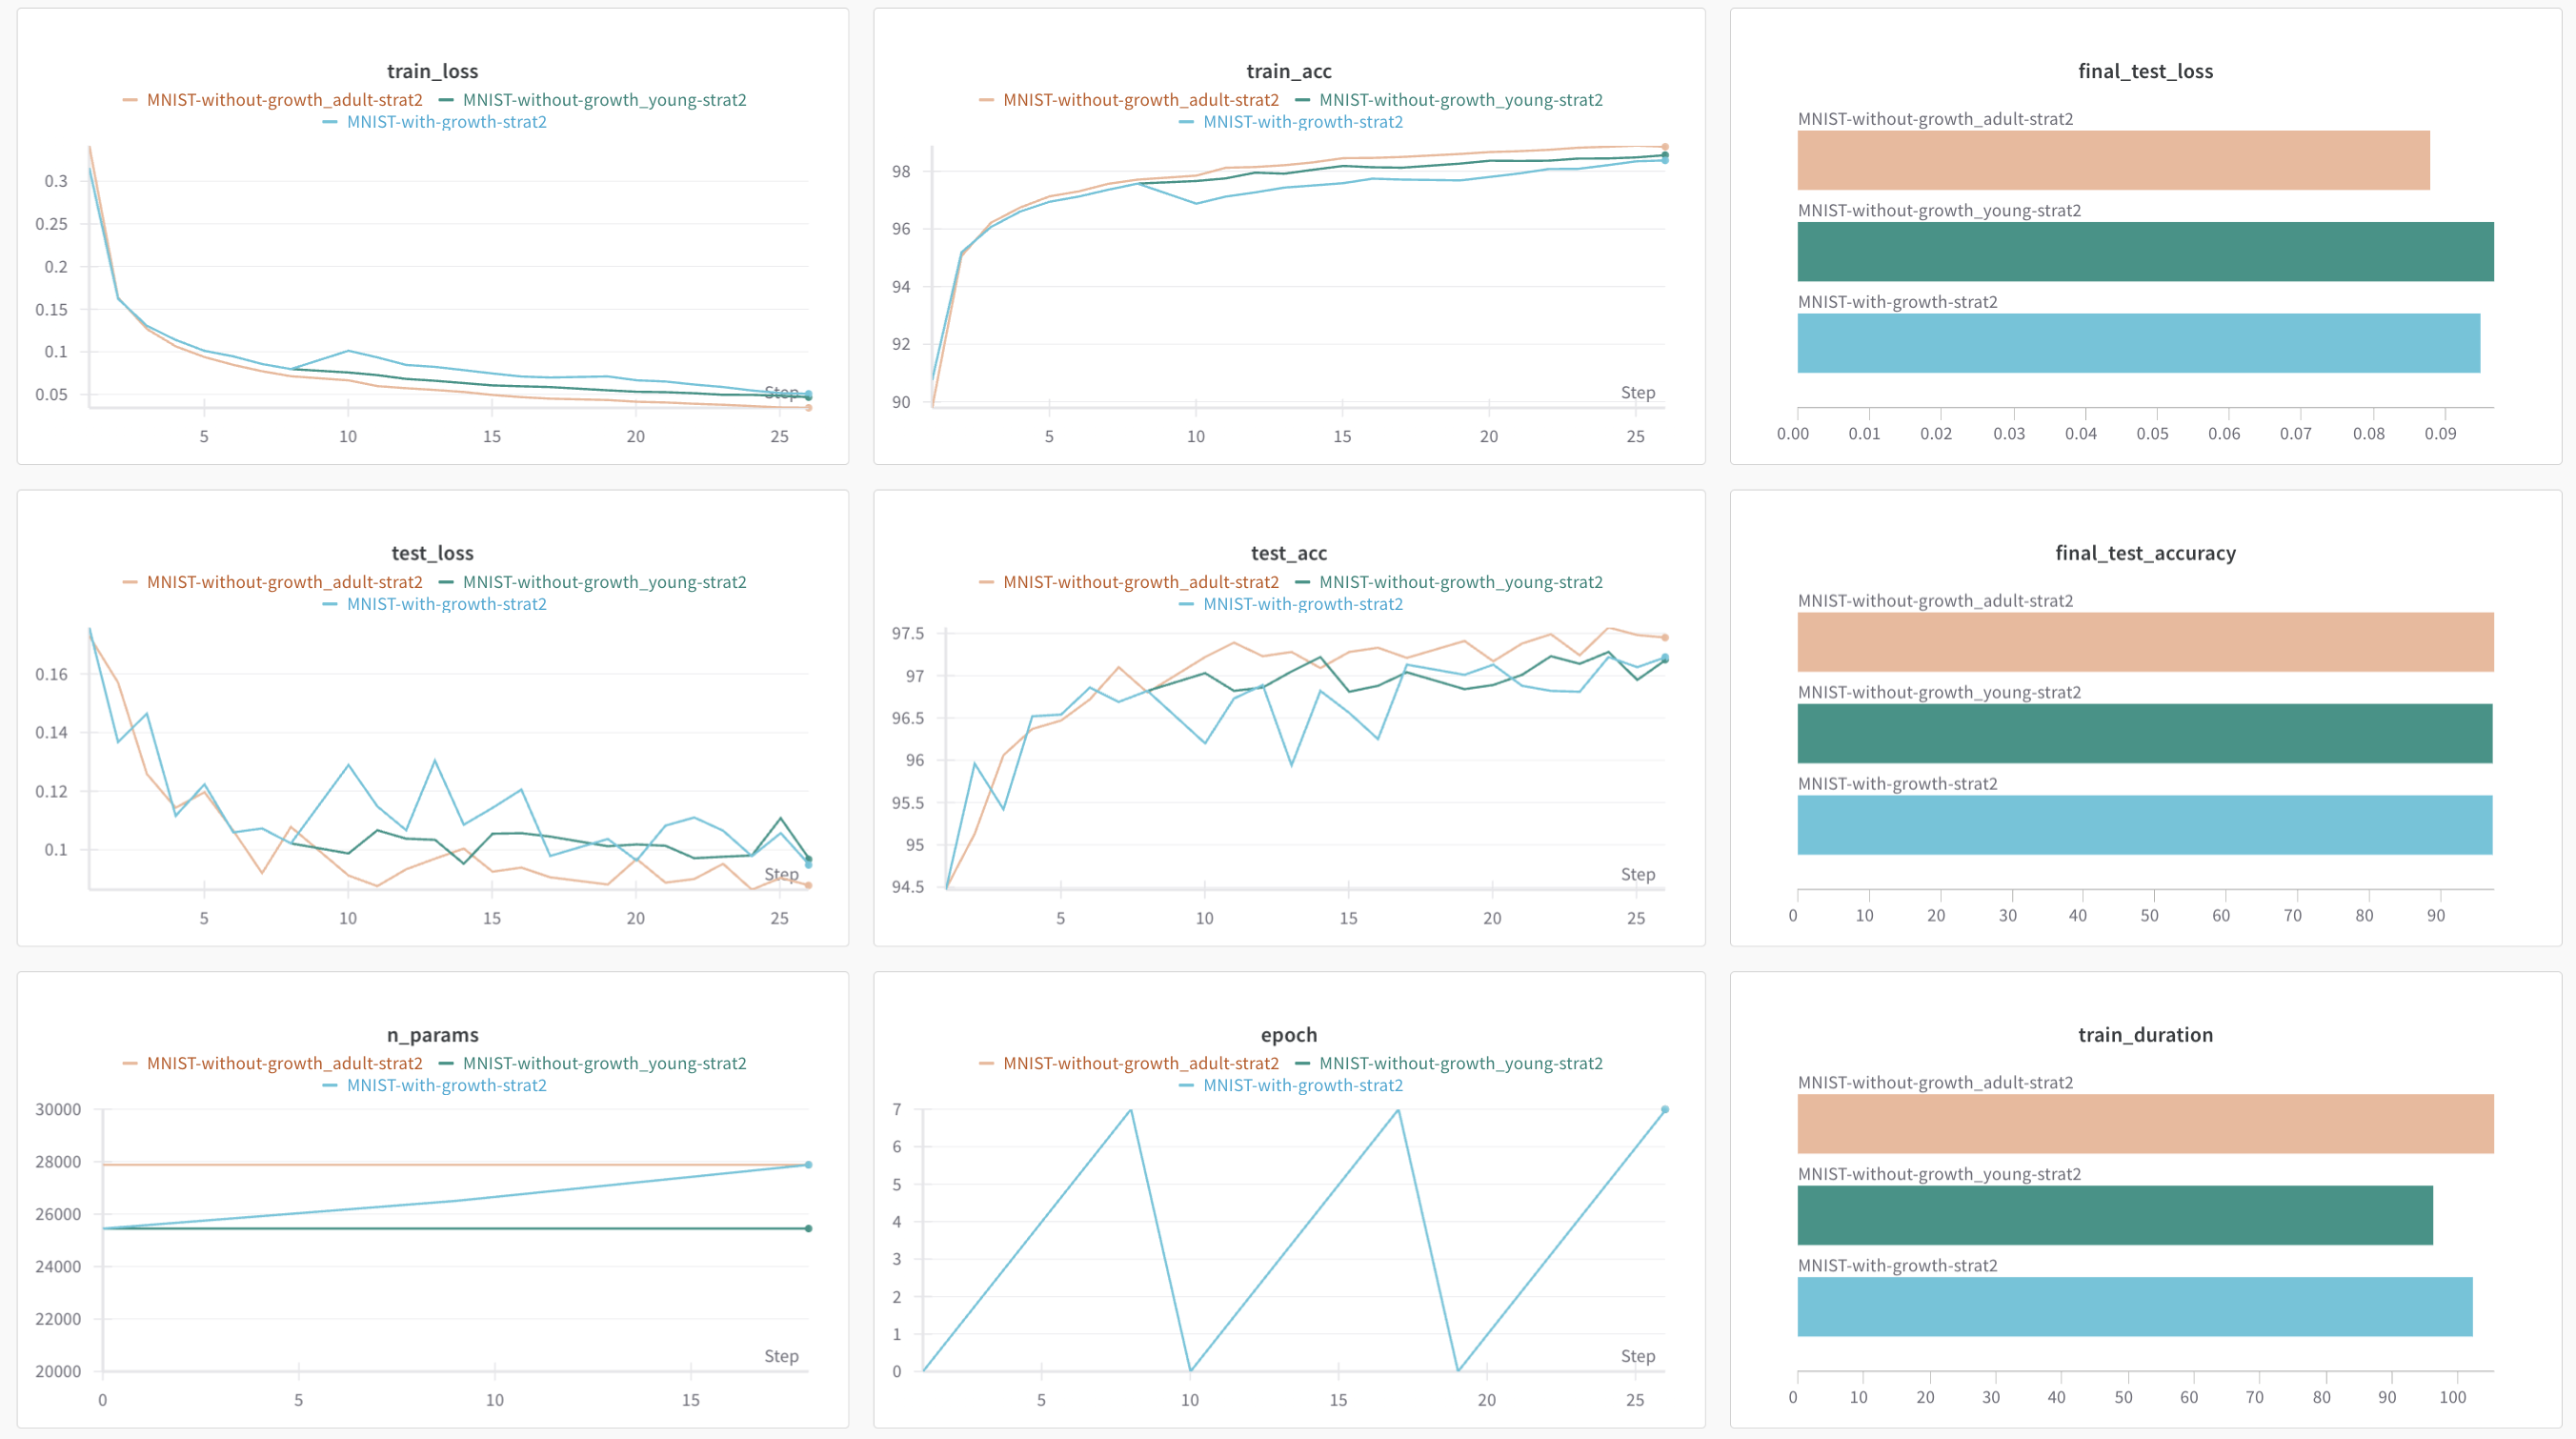

From the previous graph, we can see that the results seem less encouraging. In fact, the model with growth is the one with the worst accuracy and the highest loss at the end of training. It didn't catch up with the adult model and, worse still, performed worse than the young model. Performance drops can be seen just after the growth stages, particularly the first one after the addition of an extra layer.

So why these performance drops, when with Wider we've seen up until now that the gain is immediate? Adding a layer is done with identity, so chances are it will need more time to break out of its monotony. This, combined with the optimiser reset, could probably explain this slowdown in performance. This is a precious information for the future.

Here too, we can see that the adult model needs more time than the growing model. This is of little use, however, if the models are not equal in terms of performance.

#### Strategy 3 (Wider + BN)

 **Model:**
  - (young) ``SuperBasicMLP_BN1D`` with Linear(28×28 → 8) → BatchNorm1D → Linear(8 → 10)


```
class SuperBasicMLP_BN1D(nn.Module):
    """
    A minimal MLP model with BatchNorm1d for MNIST-like classification tasks.

    This model flattens 28×28 input images, applies a linear transform,
    normalizes via BatchNorm1d, passes through a ReLU activation, and
    finally projects to 10 class scores.

    Architecture:
        - Linear(784 → 8)
        - BatchNorm1d(8)
        - ReLU
        - Linear(8 → 10)

    Example
    -------
    >>> model = SuperBasicMLP_BN1D()
    >>> x = torch.randn(4, 1, 28, 28)
    >>> out = model(x)
    >>> out.shape
    torch.Size([4, 10])
    """

    def __init__(self):

        super(SuperBasicMLP_BN1D, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 8)
        self.lin2 = nn.Linear(8, 10)
        self.norm = sb.nnet.normalization.BatchNorm1d(input_size=8)

    def forward(self, x):

        x = x.view(x.size(0), -1)
        x = self.lin1(x)
        x = self.norm(x)
        x = F.relu(x)
        out = self.lin2(x)
        return out
```  


  - (adult) ``SuperBasicMLP_big_BN1D`` with Linear(28×28 → 32) → BatchNorm1D → Linear(32 → 10)  


```class SuperBasicMLP_big_BN1D(nn.Module):
    """
    A larger MLP model with BatchNorm1d for enhanced capacity on MNIST-like data.

    This model flattens 28×28 input images, applies a wider linear transform,
    normalizes via BatchNorm1d, uses a ReLU activation, then projects to
    10 class scores.

    Architecture:
        - Linear(784 → 32)
        - BatchNorm1d(32)
        - ReLU
        - Linear(32 → 10)

    Example
    -------
    >>> model = SuperBasicMLP_big_BN1D()
    >>> x = torch.randn(4, 1, 28, 28)
    >>> out = model(x)
    >>> out.shape
    torch.Size([4, 10])
    """

    def __init__(self):

        super(SuperBasicMLP_big_BN1D, self).__init__()

        self.lin1 = nn.Linear(28 * 28, 32)
        self.lin2 = nn.Linear(32, 10)
        self.norm = sb.nnet.normalization.BatchNorm1d(input_size=32)

    def forward(self, x):

        x = x.view(x.size(0), -1)
        x = self.lin1(x)
        x = self.norm(x)
        x = F.relu(x)
        out = self.lin2(x)
        return out
```

**Growth Technique:**  
The technique here is the same as in strategy 1. However, a BatchNorm added to verify if the model can handle it. It wouldbe interesting for the next part where the model might be more complex.

After a certain number of epochs (8 here), a call to net2wider_linear increases the weight by a factor of 2. As there are two growth step, the model goes from 16 to 32 and finally to 64 (e.g. same size as the adult).
Small amount of noise is also added to try to break symmetry and we make sure it is not added to outgoing weights (e.g. the logits) as there is only one hidden layer.



```
    # Growth rules for strategy 3 (Wider + BatchNorm)
    if strat_number == 3:

        # Retrieve the layers + the batchnorm layer
        print("Model growing ...")
        layer, next_layer, norm_layer = model.lin1, model.lin2, model.norm

        # Make the hidden layer two times wider using net2wider at each growth
        new_width = int(layer.out_features * 2)
        new_layer, new_next_layer, new_norm_layer = net2net_ops.net2wider_linear(
            layer, next_layer, new_width, norm_layer, noise_std=0.01, last_block=True
        )

        # Assign the new layers
        model.lin1 = new_layer
        model.lin2 = new_next_layer
        model.norm = new_norm_layer

        return model
```

**Experiments settings:**  
Same as before, to be able to analyse efficiently the growth, we will use a young and adult baseline, respectively the initial and final model that are just trained from scratch for the same number of epoch without any growing techniques.

**Expected Results:**  
 - From this experiment, we should see the model that preserves the function after the growth (i.e. the accuracy should remain in the same range). This will highlights the function preserving aspect of the net2wider transformation on linear layers.
 - With the same final capacity as the adult, the model should at least beat the young baseline.
 - It might be faster overall with growth as the model has less parameter to train initially.
 - The BatchNorm should be handled well by the transformation.


 **Handling BatchNorm:**
This part is interesting and took me time, let's explain it in detail. In the core of a wider net transformation, the weights are replicated for both the extended layer and the next one with compensation. For BatchNorm when it is present, we also copy all the BN parameters such as the scale, the shift, the running_mean and the running_var.

Note that the num_batches_tracked parameter is also copied. To recall, it counts the number of batch seen during the process to update running var and mean. Copying this counter allows to continue accumulating stats where the old layer left off, which is consistent with the idea of a preserved function.

It is important because, as stated in the paper, the correspondence between the Linear and BatchNorm neurons is preserved. Otherwise, duplicating a neuron i with the stats of a neuron j would break the invariance of the transformation.

Here, note that it is the sb version of the BN that is used. It is for convenience with the audio task after. It would be good practice to re-adapt it to generalise better but I was running out of time and was afraid of breaking everything.

This part is very important because most advanced models use batch normalization (e.g. CRDNNs, Transformers, etc.).



In [ ]:
!make run-net2net-MNIST-without-growth_young-strat3

python -m scripts.net2net.net2net_MNIST.train --model young --strat 3 --dataset MNIST --no_growth_for_baseline --wandb disabled --run_name MNIST-without-growth_young-strat3
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_07-58-46

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: False | Strat number: 3
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 6386
The model is :
 SuperBasicMLP_BN1D(
  (lin1): Linear(in_features=784, out_features=8, bias=True)
  (lin2): Linear(in_features=8, out_features=10, bias=True)
  (norm): BatchNorm1d(
    (norm): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######


In [ ]:
!make run-net2net-MNIST-without-growth_adult-strat3

python -m scripts.net2net.net2net_MNIST.train --model adult --strat 3 --dataset MNIST --no_growth_for_baseline  --wandb disabled --run_name MNIST-without-growth_adult-strat3
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_08-07-26

##########
Starting net2net_MNIST ...
Model used: adult | Dataset used: MNIST | Growth enabled: False | Strat number: 3
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here
The number of parameters at this step is: 25514
The model is :
 SuperBasicMLP_big_BN1D(
  (lin1): Linear(in_features=784, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=10, bias=True)
  (norm): BatchNorm1d(
    (norm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

Begin training for growth step 0...

###### Pre-Training Evaluatio

In [ ]:
!make run-net2net-MNIST-with-growth-strat3

python -m scripts.net2net.net2net_MNIST.train --model young --strat 3 --dataset MNIST --wandb disabled --run_name MNIST-with-growth-strat3
Setting global seed to 691
Device used is CUDA - Nvidia
Results will be saved in: /content/growing_networks/results/net2net_MNIST_2025-04-25_08-15-58

##########
Starting net2net_MNIST ...
Model used: young | Dataset used: MNIST | Growth enabled: True | Strat number: 3
##########

Data will be saved (if not already) in:
/content/growing_networks/data/raw

Start training for multiple growth ...

Begin step 0
No growth here (Original step)
The number of parameters at this step is: 6386
The model is :
 SuperBasicMLP_BN1D(
  (lin1): Linear(in_features=784, out_features=8, bias=True)
  (lin2): Linear(in_features=8, out_features=10, bias=True)
  (norm): BatchNorm1d(
    (norm): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

Begin training for growth step 0...

###### Pre-Training Evaluation ######
Epoch 0/8 | Loss : 

##### Results Analysis: MNIST

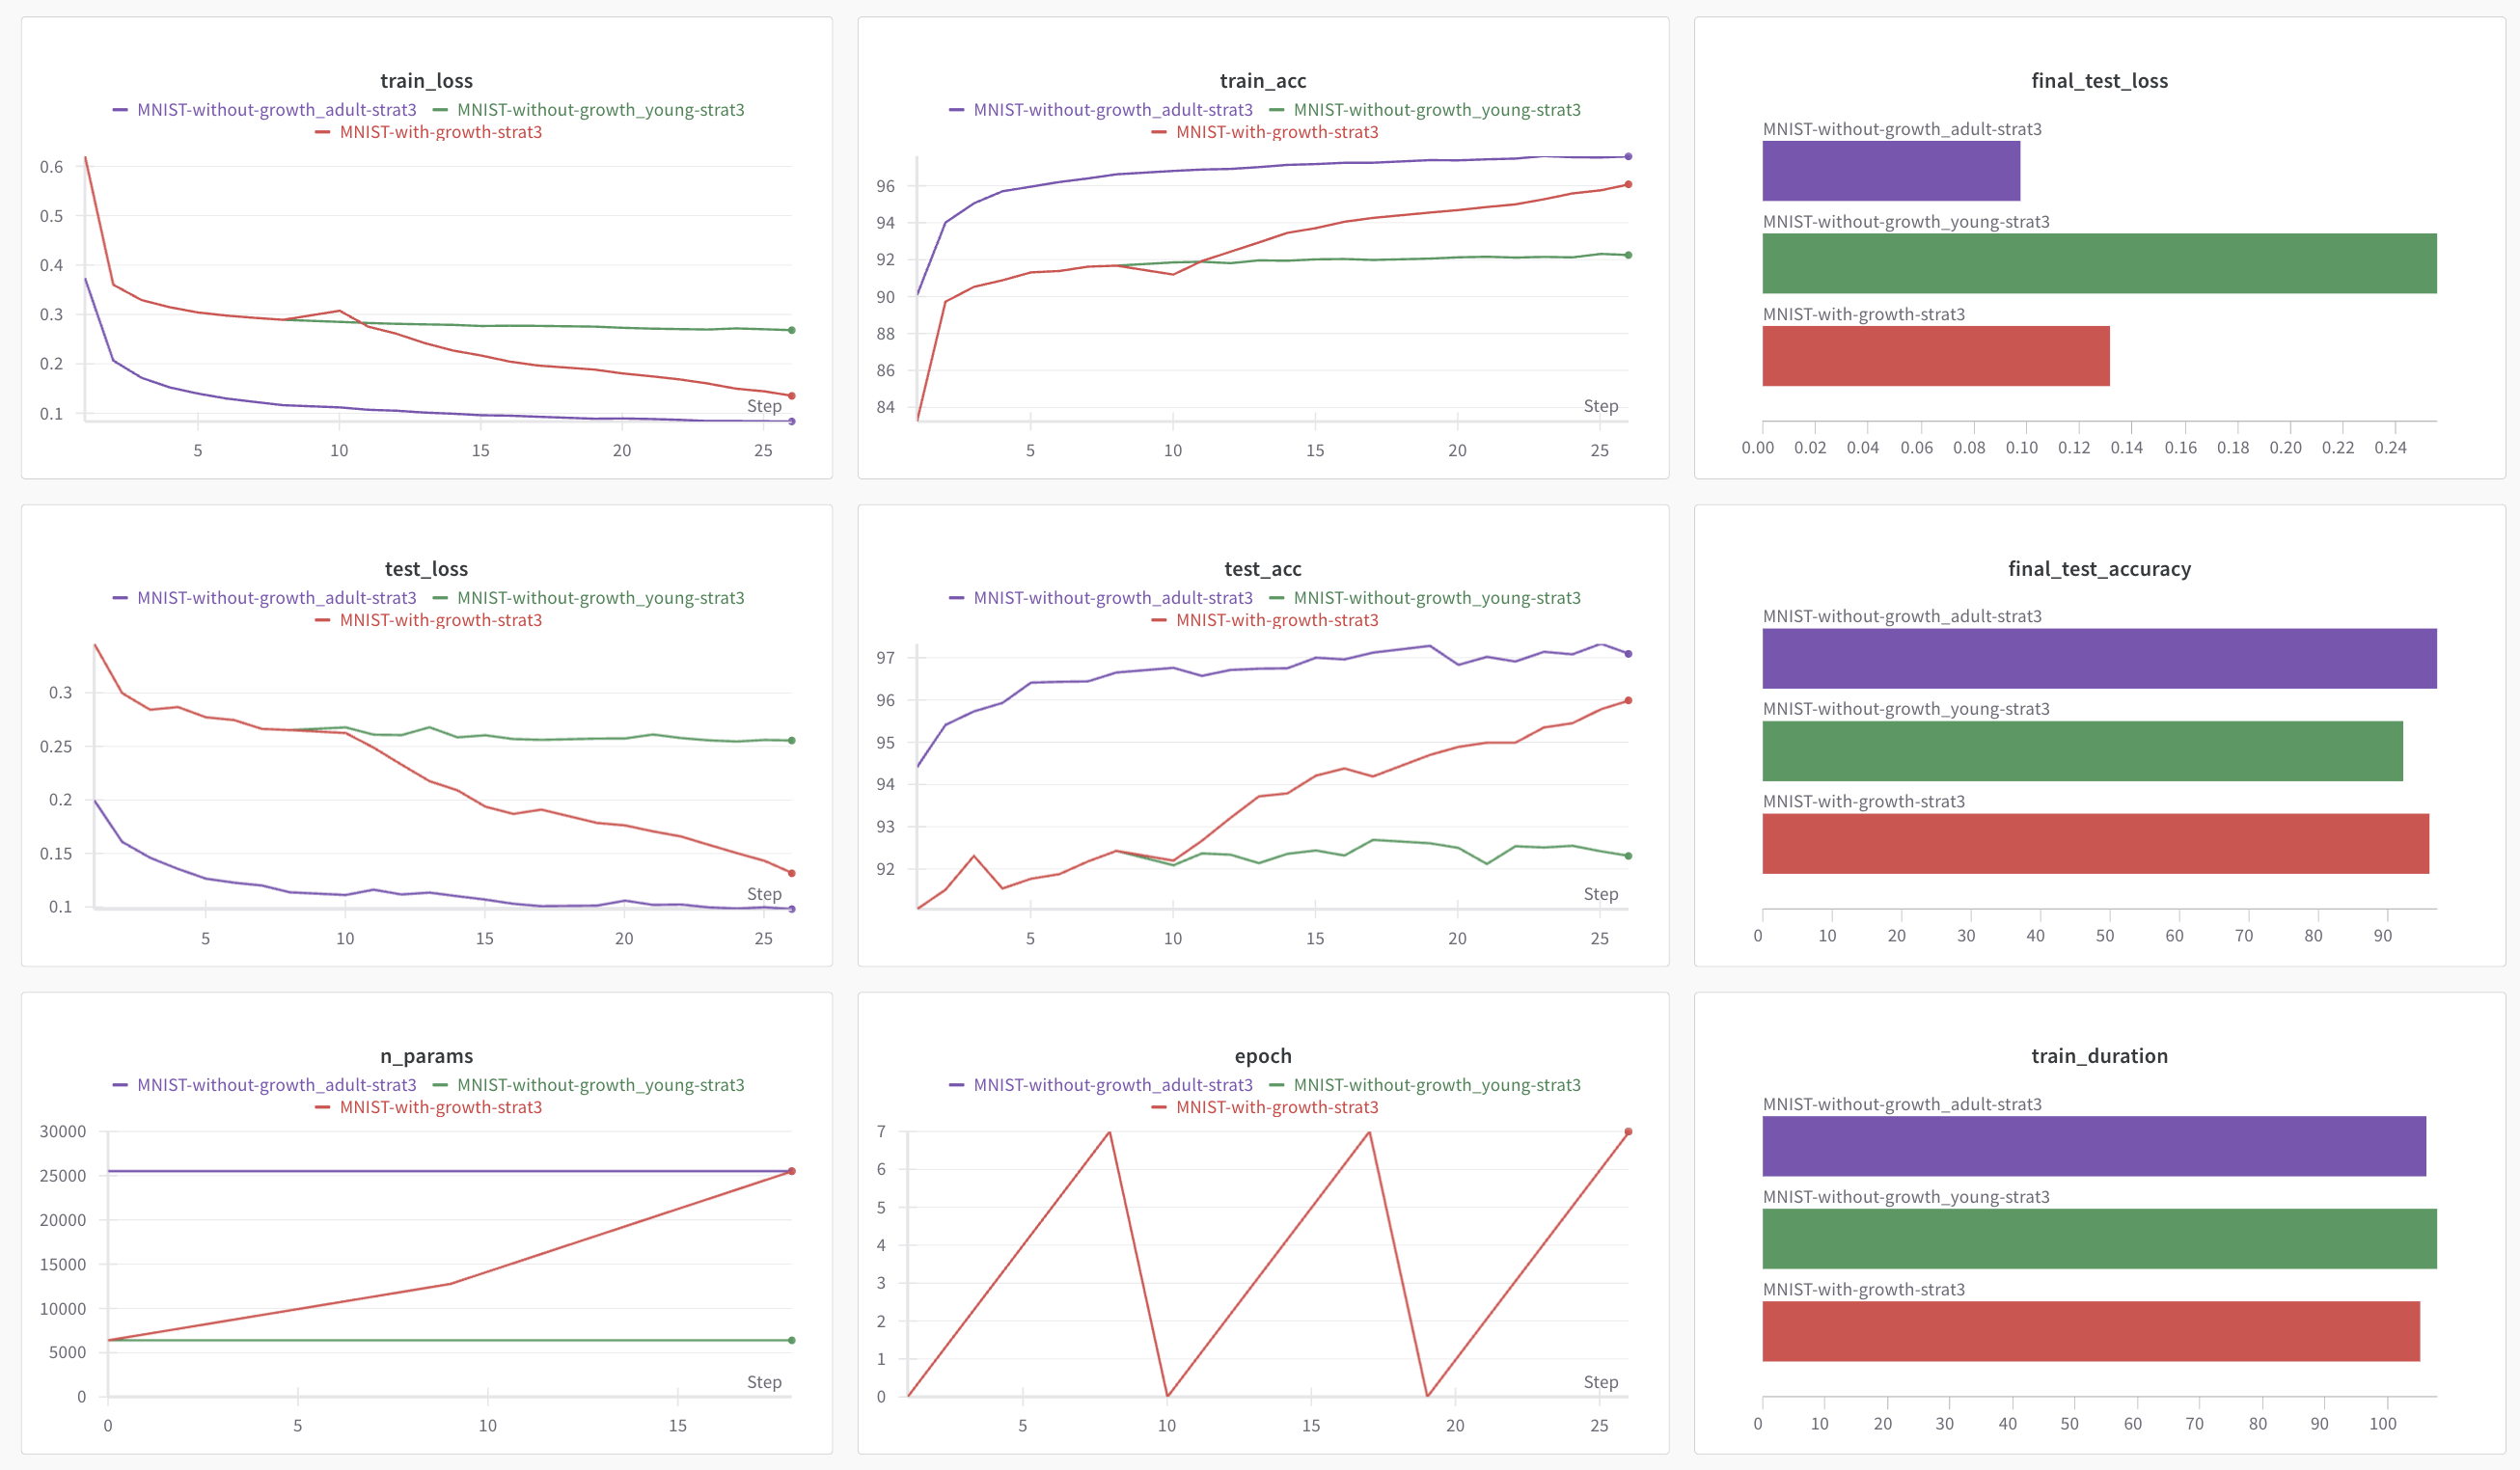

The results are very similar to those of strategy 1. We can see that the adult model is joined by the coarse model and that it has not finished improving, while the adult has reached its full potential.

We can see that the green baseline peaks at around 92%, while the adult baseline reaches 97%. The growing model, as expected, starts like the red curve and then gradually gains ground, guided by net2net's growth.

There is no or very little explosion or instability in the loss after the growth stages. This is a sign that the batchnorm is well managed and that the copied parameters are acting as they should.



### Part 3 - Phomeme level ASR using growing networks on TIMIT dataset

##### Overview
In this section, we test our Net2Net growth methods on an automatic speech recognition task at the phonetic level on the TIMIT dataset.

**Objectives:**
- Verify that the Net2Wider and Net2Deeper functions preserve the learned function in a real scenario.
- Measure the impact of network growth on the phenomenon error rate (PER).

**TIMIT:**

TIMIT is a well-known dataset available [here](https://catalog.ldc.upenn.edu/LDC93S1) [11].  
It is made up of 630 different speakers, each pronouncing 10 sentences in 8 different dialects of American English.
Phonetically, it will use 39 different labels.
The dataset is divided into 462 speakers for the train set, 50 for the validation and 24 for the test.

**Baseline SpeechBrain**

Our starting point will be the speechbrain implementation of a CTC ASR with CRDNN approach available  [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/TIMIT/ASR/CTC) [12],[13] and is also present in my github repository.
It can be run from the root with (assumes that the repository is imported and the dataset is placed in data/raw):
```
!make run-recipe-asr-timit
```
In this recipe:

1.   Pre-training and calculation of features: Sampling at 16 kHz, FFT 400, 40 mel-filter, global normalization. (prepare timit is used in its original version)
2.   Data Augmentaton: Noise, speed perturbation, random suppression of temporal and frequential chunks
3. Architecture: The core module is a CRDNN + LiGRU. It has 2 CNN blocks (128,256), 4 bi-directional Li-GRU with 512 neurons and finally two DNN blocks with 512 neurons. An linear layer is added on top with an output size of 40 (39 phomemes + blank)
4. Training: CTC Loss, AdaDelta Optimizer + NewBob Scheduler, Batch size 8, 50 epochs.

In the following, we'll describe the modifications needed to adapt this recipe to our growing environment. My approach in this project is to start from a smaller version of the CRDNN and grow the model until we reach the size of the adult model.
We will focus on growing only the DNNs block.




#### CRDNN wrapper

The wrapper is the essential element of our approach. It encapsulates the CRDNN defined by the recipe as well as the output layer so that the Net2Net growth functions can be applied to it while guaranteeing the preservation of the function.

The `GrowingCRDNN` is initialized with the new or already trained CRDNN and the output layer. The CRDNN contains the CNN, RNN, and DNN layers as a sequence of blocks.

In case of a forward pass, the call is simply pass to the CRDNN module.

When `grow()` is called:

  - We go through all the DNN blocks and retrieve for each one the layer to be extended, the next layer and the BatchNorm layer if there is one (there is one in each DNN block of the CRDNN).
  - After calculating the new layer size based on the width factor, we call the net2wider linear method, which will return the 3 new extended layers (new_linear, new_next_layer, new_norm). It also add noise if needed but make sure it does not apply on the last output layer.
  - The new layers are then replaced by the enlarged versions and sent to the device before the new model is returned.

This implementation, inspired by what is already done in speechbrain, is very practical because it makes it easy to test without altering what is done naturally in the sb pipeline.

The code for information purposes is as follows and can be found at `scripts/speech/TIMIT/TIMIT_Growing_Net2Net/growth_wrapper_CRDNN.py`


In [ ]:
raise RuntimeError("This cell is not intended to be executed; "
                   + "it is there to make the code easier to understand with the help of the explanations.")
"""
GrowingCRDNN wrapper
====================

This module defines a GrowingCRDNN class that wraps a pretrained CRDNN ASR model
and provides a method to apply Net2Net “wider” growth to its DNN blocks in a
function‐preserving way.

Usage:
    >>> from growing_crdnn import GrowingCRDNN
    >>> model = GrowingCRDNN(original_model, model_output)
    >>> # grow each hidden layer by 1.5× with small noise
    >>> model.grow(width_factor=1.5, noise_std=0.01)

Dependencies:
    - torch
    - scripts.net2net.net2net_MNIST.net2net_ops.net2wider_linear

Author: Sam Collin
"""

import torch.nn as nn
from scripts.net2net.net2net_MNIST.net2net_ops import net2wider_linear


class GrowingCRDNN(nn.Module):
    """
    Wrapper module to dynamically grow a CRDNN-based ASR model.

    This class takes an existing CRDNN (`original_model`) and its final
    output linear layer (`model_output`), and exposes a `grow` method
    which applies Net2WiderNet to each DNN block in turn.

    Attributes
    ----------
    model : nn.Module
        The core CRDNN model (without the final linear projection).
    output : nn.Module
        The final linear projection layer to adjust after the last DNN block.
    """

    def __init__(self, original_model, model_output):
        """
        Initialize the GrowingCRDNN wrapper.

        Parameters
        ----------
        original_model : nn.Module
            Pretrained CRDNN backbone (all convolutional/RNN layers plus DNN blocks).
        model_output : nn.Module
            The final linear layer (often named `.w`) whose input size must match
            the last DNN block’s output.
        """
        super().__init__()
        self.model = original_model
        self.output = model_output

    def forward(self, x):
        """
        Perform a forward pass through the underlying CRDNN.

        Parameters
        ----------
        x : torch.Tensor
            Input feature tensor (e.g., log-Mel spectrogram) of shape
            (batch_size, time_steps, n_mels).

        Returns
        -------
        torch.Tensor
            The raw output logits from the CRDNN (before softmax or CTC log-softmax).
        """
        return self.model(x)

    def grow(self, width_factor, noise_std):
        """
        Apply Net2WiderNet growth to each DNN block, in place.

        Iterates over the DNN blocks stored in `self.model.DNN`, widens each
        block’s linear layer by `width_factor`, transfers its BatchNorm1d
        parameters if present, and adjusts the subsequent layer’s weights
        to exactly preserve the function (up to optional noise).

        Parameters
        ----------
        width_factor : float
            Factor by which to multiply each hidden layer’s width.
        noise_std : float
            Standard deviation of Gaussian noise to add to duplicated neurons
            to break symmetry.

        Notes
        -----
        - The final DNN block is linked to `self.output`; all others are
            linked block→block.
        - Growth is done in‐place: after calling `.grow()`, both the DNN blocks
            and the final linear layer have been replaced by their widened versions.
        """
        n_blocks = len(self.model.DNN)
        last_block = False
        device = next(self.parameters()).device
        for idx in range(n_blocks):

            if idx + 1 == n_blocks:
                current_block, out_linear = (
                    self.model.DNN[f"block_{idx}"],
                    self.output.w,
                )
                last_block = True
            else:
                current_block, next_block = (
                    self.model.DNN[f"block_{idx}"],
                    self.model.DNN[f"block_{idx+1}"],
                )
            # Grow the layer
            new_width = int(current_block.linear.w.out_features * width_factor)
            new_linear, new_next_layer, new_norm = net2wider_linear(
                layer=current_block.linear.w,
                next_layer=next_block.linear.w if not last_block else out_linear,
                norm_layer=current_block.norm,
                new_width=new_width,
                noise_std=noise_std,
                last_block=last_block,
            )
            # Assign the new layers
            current_block.linear.w = new_linear.to(device)
            current_block.norm = new_norm.to(device)
            if last_block:
                self.output.w = new_next_layer.to(device)
            else:
                next_block.linear.w = new_next_layer.to(device)


#### YAML files

The YAML file is similar to the one already existing. Few changes have been made such as:  
- **Weight and biases Integration:** not used in the notebook but can be activated with --wandb_mode online.
```
wandb_mode: disabled
run_name: xyz
```
- **# of epochs:** The number of epochs have been reduced to 20 has it is already heavy to run.

- **Insertion du wrapper GrowingCRDNN:** The CRDNN is automatically wrapped in its wrapper so that the grow() method can be called.

```
growingmodel:
  !new:scripts.speech.TIMIT.TIMIT_Growing_Net2Net.growth_wrapper_CRDNN.GrowingCRDNN
  original_model: !ref <model>
  model_output: !ref <output>

modules:
  model:  !ref <growingmodel>
  output: !ref <output>

```

- **Growth params:** Growth parameters are added where necessary

```
growth_factor: 2
growth_epoch: [5] # The epoch at which the growth happens
noise_std: 0.01 # Noise amplitude
```

**Baseline Model:** The adult model has been scaled down from the original to reduce complexity and speed up experimentation.

It has the same structure: 2 CNN blocks, 4 RNN layers and 2 DNN blocks mais leur taille est passée de (128, 256) à (32,64) pour les CNNs, 512 à 256 pour les RNNs et 512 à 256 pour les DNNs.


```
activation: !name:torch.nn.LeakyReLU
dropout: 0.15
cnn_blocks: 2
cnn_channels: (32, 64)
cnn_kernelsize: (3, 3)
rnn_layers: 4
rnn_neurons: 256
rnn_bidirectional: True
dnn_blocks: 2
dnn_neurons: 256

# Outputs
output_neurons: 40
blank_index: 0
```

The young model has the same structure also but with less neurons in the DNN blocks:



```
activation: !name:torch.nn.LeakyReLU
dropout: 0.15
cnn_blocks: 2
cnn_channels: (32, 64)
cnn_kernelsize: (3, 3)
rnn_layers: 4
rnn_neurons: 256
rnn_bidirectional: True
dnn_blocks: 2
dnn_neurons: 128

# Outputs
output_neurons: 40
blank_index: 0
```


An example of a full growing.yaml that can be found at `scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/growing.yaml`



In [ ]:
raise RuntimeError("This cell is not intended to be executed; "
                   + "it is there to make the code easier to understand with the help of the explanations.")

# ################################
# Growing TIMIT ASR with Net2Net
# - Wraps CRDNN in GrowingCRDNN for dynamic widening
# - Configurable growth: epochs, factor, noise_std

# Model: CTC ASR on TIMIT with CRDNN (with LiGRU)
# Additions: TimeDomainSpecAugment
# Authors: Mirco Ravanelli & Peter Plantinga 2020
# ################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !apply:speechbrain.utils.seed_everything [!ref <seed>]
output_folder: !ref results/TIMIT_Growing_young_at_epoch5/augment_noise_CRDNN/<seed>
test_wer_file: !ref <output_folder>/wer_test.txt
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt
wandb_mode: disabled # Pass disabled for submission
run_name: xyz

# Data files
data_folder: !PLACEHOLDER # e.g. /path/to/TIMIT


train_annotation: !ref <save_folder>/train.json
valid_annotation: !ref <save_folder>/dev.json
test_annotation: !ref <save_folder>/test.json
skip_prep: False # Skip data preparation
uppercase: False # Must be True when the TIMIT dataset is in the upper-case version

# Data for augmentation
data_folder_noise: !ref <data_folder>/noise # The noisy sequences for data augmentation will automatically be downloaded here.
NOISE_DATASET_URL: https://www.dropbox.com/scl/fi/a09pj97s5ifan81dqhi4n/noises.zip?rlkey=j8b0n9kdjdr32o1f06t0cw5b7&dl=1
noise_annotation: !ref <save_folder>/noise.csv #The data manifest files are created by the data preparation script

####################### Training Parameters ####################################
number_of_epochs: 20
batch_size: 8
lr: 1.0
sorting: ascending # choose between ascending, descending and random

# Feature parameters
sample_rate: 16000
n_fft: 400
n_mels: 40

####################### Model Parameters #######################################
activation: !name:torch.nn.LeakyReLU
dropout: 0.15
cnn_blocks: 2
cnn_channels: (32, 64)
cnn_kernelsize: (3, 3)
rnn_layers: 4
rnn_neurons: 256
rnn_bidirectional: True
dnn_blocks: 2
dnn_neurons: 128

# Outputs
output_neurons: 40
blank_index: 0

# Dataloader options
num_workers: 4
train_dataloader_opts:
  batch_size: !ref <batch_size>
  num_workers: !ref <num_workers>

valid_dataloader_opts:
  batch_size: !ref <batch_size>
  num_workers: !ref <num_workers>

test_dataloader_opts:
  batch_size: !ref <batch_size>
  num_workers: !ref <num_workers>

normalize: !new:speechbrain.processing.features.InputNormalization
  norm_type: global

############################## Augmentations ###################################

# Download and prepare the dataset of noisy sequences for augmentation
prepare_noise_data:
  !name:speechbrain.augment.preparation.prepare_dataset_from_URL
  URL: !ref <NOISE_DATASET_URL>
  dest_folder: !ref <data_folder_noise>
  ext: wav
  csv_file: !ref <noise_annotation>

# Add noise to input signal
add_noise: !new:speechbrain.augment.time_domain.AddNoise
  csv_file: !ref <noise_annotation>
  snr_low: 0
  snr_high: 15
  noise_sample_rate: !ref <sample_rate>
  clean_sample_rate: !ref <sample_rate>
  num_workers: !ref <num_workers>

# Speed perturbation
speed_perturb: !new:speechbrain.augment.time_domain.SpeedPerturb
  orig_freq: !ref <sample_rate>
  speeds: [95, 100, 105]

# Frequency drop: randomly drops a number of frequency bands to zero.
drop_freq: !new:speechbrain.augment.time_domain.DropFreq
  drop_freq_low: 0
  drop_freq_high: 1
  drop_freq_count_low: 1
  drop_freq_count_high: 3
  drop_freq_width: 0.05

# Time drop: randomly drops a number of temporal chunks.
drop_chunk: !new:speechbrain.augment.time_domain.DropChunk
  drop_length_low: 1000
  drop_length_high: 2000
  drop_count_low: 1
  drop_count_high: 5

# Augmenter: Combines previously defined augmentations to perform data augmentation
wav_augment: !new:speechbrain.augment.augmenter.Augmenter
  concat_original: True
  min_augmentations: 4
  max_augmentations: 4
  augment_prob: 1.0
  augmentations:
    [
      !ref <add_noise>,
      !ref <speed_perturb>,
      !ref <drop_freq>,
      !ref <drop_chunk>,
    ]

############################## Models ##########################################

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
  limit: !ref <number_of_epochs>

compute_features: !new:speechbrain.lobes.features.Fbank
  sample_rate: !ref <sample_rate>
  n_fft: !ref <n_fft>
  n_mels: !ref <n_mels>

model: !new:speechbrain.lobes.models.CRDNN.CRDNN
  input_size: !ref <n_mels>
  activation: !ref <activation>
  dropout: !ref <dropout>
  cnn_blocks: !ref <cnn_blocks>
  cnn_channels: !ref <cnn_channels>
  cnn_kernelsize: !ref <cnn_kernelsize>
  time_pooling: True
  rnn_layers: !ref <rnn_layers>
  rnn_neurons: !ref <rnn_neurons>
  rnn_bidirectional: !ref <rnn_bidirectional>
  dnn_blocks: !ref <dnn_blocks>
  dnn_neurons: !ref <dnn_neurons>

output: !new:speechbrain.nnet.linear.Linear
  input_size: !ref <dnn_neurons>
  n_neurons: !ref <output_neurons>
  bias: True

growingmodel:
  !new:scripts.speech.TIMIT.TIMIT_Growing_Net2Net.growth_wrapper_CRDNN.GrowingCRDNN
  original_model: !ref <model>
  model_output: !ref <output>

log_softmax: !new:speechbrain.nnet.activations.Softmax
  apply_log: True

opt_class: !name:torch.optim.Adadelta
  rho: 0.95
  lr: !ref <lr>
  eps: 1.e-8

lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
  initial_value: !ref <lr>
  improvement_threshold: 0.0025
  annealing_factor: 0.8
  patient: 0

modules:
  model: !ref <growingmodel>
  output: !ref <output>
  normalize: !ref <normalize>

jit_module_keys: [model]

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
  checkpoints_dir: !ref <save_folder>
  recoverables:
    model: !ref <model>
    output: !ref <output>
    scheduler: !ref <lr_annealing>
    normalizer: !ref <normalize>
    counter: !ref <epoch_counter>

compute_cost: !name:speechbrain.nnet.losses.ctc_loss
  blank_index: !ref <blank_index>

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
  save_file: !ref <train_log>

ctc_stats: !name:speechbrain.utils.metric_stats.MetricStats
  metric: !name:speechbrain.nnet.losses.ctc_loss
    blank_index: !ref <blank_index>
    reduction: batch

per_stats:
  !name:speechbrain.utils.metric_stats.ErrorRateStats ############################## Growth ##########################################


growth_factor: 2
growth_epoch: [5]
noise_std: 0.01
reset_optimizer: True


#### Updated Recipe

Finally, we had to tweak the recipe a bit to make it "growing compliant". The following changes were made:

**WandB**

- Import of wandb and init (wandb.init) into the __main__

- Adding a wandb_mode parameter to YAML

- Conditional calls to wandb.log in on_stage_end (VALID and TEST)

**Step count tracking**

- Adding self.step_count to ASR_Brain.__init__

- Override of on_fit_batch_end to increment step_count

**Model growth**

- Addition of a ‘Growth’ block in on_stage_end under VALID :

  - Condition if epoch in growth_epoch

  - Call to self.modules.model.grow(width_factor, noise_std)

  - Before/after printout and optional optimizer reset (reset_optimizer)

**YAML**

- New keys: growth_epoch, growth_factor, noise_std, reset_optimizer

- Passing wandb_mode and run_name to drive the WandB interface

The recipe below can be found at `scripts/speech/TIMIT/TIMIT_Growing_Net2Net/train.py`

In [ ]:
raise RuntimeError("This cell is not intended to be executed; "
                   + "it is there to make the code easier to understand with the help of the explanations.")

#!/usr/bin/env python3
"""Recipe for training a phoneme recognizer on TIMIT.
The system relies on a model trained with CTC.
Greedy search is using for validation, while beamsearch
is used at test time to improve the system performance.


**Modifications for Growing-Net2Net experiments:**
- Integrated Weights & Biases logging (`wandb.init`, `wandb.log`)
- Step counter added (`self.step_count`) via `on_fit_batch_end`
- “Growth block” in `on_stage_end` to call `model.grow(...)` at specified epochs
- New hyperparameters in the YAML:
    • `growth_epoch` (list of int)
    • `growth_factor` (float)
    • `noise_std` (float)
    • `reset_optimizer` (bool)

To run:
On colab or NVIDIA
> !make run-growing-TIMIT-young-growth-colab

With MPS
> !make run-growing-TIMIT-young-growth

Note on Compilation:
Enabling the just-in-time (JIT) compiler with --jit significantly improves code performance,
resulting in a 50-60% speed boost. We highly recommend utilizing the JIT compiler for optimal results.

Authors
 * Mirco Ravanelli 2020
 * Peter Plantinga 2020
 * Sam Collin 2024
"""

import os
import sys
import wandb

from hyperpyyaml import load_hyperpyyaml

import speechbrain as sb
from speechbrain.utils.distributed import if_main_process, run_on_main
from speechbrain.utils.logger import get_logger

logger = get_logger(__name__)


# Define training procedure
class ASR_Brain(sb.Brain):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.step_count = 0

    def compute_forward(self, batch, stage):
        "Given an input batch it computes the phoneme probabilities."
        batch = batch.to(self.device)
        wavs, wav_lens = batch.sig

        # Add waveform augmentation if specified.
        if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
            wavs, wav_lens = self.hparams.wav_augment(wavs, wav_lens)

        feats = self.hparams.compute_features(wavs)
        feats = self.modules.normalize(feats, wav_lens)
        out = self.modules.model(feats)
        out = self.modules.output(out)
        pout = self.hparams.log_softmax(out)

        return pout, wav_lens

    def compute_objectives(self, predictions, batch, stage):
        "Given the network predictions and targets computed the CTC loss."
        pout, pout_lens = predictions
        phns, phn_lens = batch.phn_encoded

        if stage == sb.Stage.TRAIN and hasattr(self.hparams, "wav_augment"):
            phns = self.hparams.wav_augment.replicate_labels(phns)
            phn_lens = self.hparams.wav_augment.replicate_labels(phn_lens)

        loss = self.hparams.compute_cost(pout, phns, pout_lens, phn_lens)
        self.ctc_metrics.append(batch.id, pout, phns, pout_lens, phn_lens)

        if stage != sb.Stage.TRAIN:
            sequence = sb.decoders.ctc_greedy_decode(
                pout, pout_lens, blank_id=self.hparams.blank_index
            )
            self.per_metrics.append(
                ids=batch.id,
                predict=sequence,
                target=phns,
                target_len=phn_lens,
                ind2lab=self.label_encoder.decode_ndim,
            )

        return loss

    def on_fit_batch_end(self, batch, outputs, loss, should_step):
        self.step_count += 1

    def on_stage_start(self, stage, epoch):
        "Gets called when a stage (either training, validation, test) starts."
        self.ctc_metrics = self.hparams.ctc_stats()

        if stage != sb.Stage.TRAIN:
            self.per_metrics = self.hparams.per_stats()

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a stage."""
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
        else:
            per = self.per_metrics.summarize("error_rate")

        if stage == sb.Stage.VALID:
            old_lr, new_lr = self.hparams.lr_annealing(per)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats={"loss": stage_loss, "PER": per},
            )
            if self.hparams.wandb_mode != "disabled":
                wandb.log(
                    {
                        "epoch": epoch,
                        "lr": old_lr,
                        "train_loss": self.train_loss,
                        "val_loss": stage_loss,
                        "val_PER": per,
                        "step": self.step_count,
                    }
                )

            self.checkpointer.save_and_keep_only(
                meta={"PER": per},
                min_keys=["PER"],
            )

            # Growth block (detects if a growth is supposed to happen at this epoch)
            # If yes, the model calls the grow() method and grows.
            if (
                hasattr(self.hparams, "growth_epoch")
                and epoch in self.hparams.growth_epoch
            ):
                print("\n\n\n### Grow Time ###\n")
                print("Previous model is:\n", asr_brain.modules.model.model)
                print("Output is:\n", asr_brain.modules.output)
                print("\n\n# Model starts growing ... #")
                self.modules.model.grow(
                    width_factor=self.hparams.growth_factor,
                    noise_std=self.hparams.noise_std,
                )
                print("Model has grown successfully")
                print("New model is:\n", asr_brain.modules.model.model)
                print("Output is:\n", asr_brain.modules.output)
                if self.hparams.reset_optimizer:
                    print("Reinitializing optimizer...")
                    self.optimizer = self.hparams.opt_class(self.modules.parameters())

        elif stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats={"loss": stage_loss, "PER": per},
            )

            if self.hparams.wandb_mode != "disabled":
                wandb.log(
                    {
                        "test_loss": stage_loss,
                        "test_PER": per,
                    }
                )

            if if_main_process():
                with open(self.hparams.test_wer_file, "w", encoding="utf-8") as w:
                    w.write("CTC loss stats:\n")
                    self.ctc_metrics.write_stats(w)
                    w.write("\nPER stats:\n")
                    self.per_metrics.write_stats(w)
                    print(
                        "CTC and PER stats written to ",
                        self.hparams.test_wer_file,
                    )


def dataio_prep(hparams):
    "Creates the datasets and their data processing pipelines."

    data_folder = hparams["data_folder"]

    # 1. Declarations:
    train_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["train_annotation"],
        replacements={"data_root": data_folder},
    )

    if hparams["sorting"] == "ascending":
        # we sort training data to speed up training and get better results.
        train_data = train_data.filtered_sorted(sort_key="duration")
        # when sorting do not shuffle in dataloader ! otherwise is pointless
        hparams["train_dataloader_opts"]["shuffle"] = False

    elif hparams["sorting"] == "descending":
        train_data = train_data.filtered_sorted(sort_key="duration", reverse=True)
        # when sorting do not shuffle in dataloader ! otherwise is pointless
        hparams["train_dataloader_opts"]["shuffle"] = False

    elif hparams["sorting"] == "random":
        pass

    else:
        raise NotImplementedError("sorting must be random, ascending or descending")

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["valid_annotation"],
        replacements={"data_root": data_folder},
    )
    valid_data = valid_data.filtered_sorted(sort_key="duration")

    test_data = sb.dataio.dataset.DynamicItemDataset.from_json(
        json_path=hparams["test_annotation"],
        replacements={"data_root": data_folder},
    )
    test_data = test_data.filtered_sorted(sort_key="duration")

    datasets = [train_data, valid_data, test_data]
    label_encoder = sb.dataio.encoder.CTCTextEncoder()

    # 2. Define audio pipeline:
    @sb.utils.data_pipeline.takes("wav")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        sig = sb.dataio.dataio.read_audio(wav)
        return sig

    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline)

    # 3. Define text pipeline:
    @sb.utils.data_pipeline.takes("phn")
    @sb.utils.data_pipeline.provides("phn_list", "phn_encoded")
    def text_pipeline(phn):
        phn_list = phn.strip().split()
        yield phn_list
        phn_encoded = label_encoder.encode_sequence_torch(phn_list)
        yield phn_encoded

    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 3. Fit encoder:
    # Load or compute the label encoder (with multi-gpu dpp support)
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[train_data],
        output_key="phn_list",
        special_labels={"blank_label": hparams["blank_index"]},
        sequence_input=True,
    )

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(datasets, ["id", "sig", "phn_encoded"])

    return train_data, valid_data, test_data, label_encoder


# Begin Recipe!
if __name__ == "__main__":
    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hyperparameters file with command-line overrides
    with open(hparams_file, encoding="utf-8") as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    wandb.init(
        project="growing-networks",
        config=hparams,
        name=hparams["run_name"],
        mode=hparams["wandb_mode"],  # Choose if we use and connect wandb
    )

    # Dataset prep (parsing TIMIT and annotation into csv files)
    # Dot needed cus timit prepare is now the code not just a path
    from .timit_prepare import prepare_timit  # noqa

    # Initialize ddp (useful only for multi-GPU DDP training)
    sb.utils.distributed.ddp_init_group(run_opts)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # multi-gpu (ddp) save data preparation
    run_on_main(
        prepare_timit,
        kwargs={
            "data_folder": hparams["data_folder"],
            "save_json_train": hparams["train_annotation"],
            "save_json_valid": hparams["valid_annotation"],
            "save_json_test": hparams["test_annotation"],
            "skip_prep": hparams["skip_prep"],
            "uppercase": hparams["uppercase"],
        },
    )
    run_on_main(hparams["prepare_noise_data"])

    # Dataset IO prep: creating Dataset objects and proper encodings for phones
    train_data, valid_data, test_data, label_encoder = dataio_prep(hparams)

    # Trainer initialization
    asr_brain = ASR_Brain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    asr_brain.label_encoder = label_encoder

    # Training/validation loop
    asr_brain.fit(
        asr_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

    # Test
    asr_brain.evaluate(
        test_data,
        min_key="PER",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )


#### Experiments

It is now time to test our setup. We'll start by downloading the TIMIT dataset.

**!!! Make sure you've added the repository below to the environment section !!!**

In [2]:
!wget -q -O timit.tar.gz "https://www.dropbox.com/scl/fi/t6ql1ef4odthpdi5dxd6r/TIMIT.tar.gz?rlkey=j8xyxnc2wk2saaj2reej0yl4a&dl=1"

In [3]:
%%capture
!mkdir -p data/raw/TIMIT
!tar -xzf timit.tar.gz -C data/raw/TIMIT --strip-components=1
assert os.path.exists("data/raw/TIMIT/test")

##### Baseline Comparisons
In the first part of this analysis we will compare our two models. The young versus the adult.

In this scenario no growth is happening, the model are just trained from scratch on the task.

The young and adult baseline can be reproducted with the following commands respectively:

In [ ]:
#!make run-growing-TIMIT-young-baseline-colab

python -m scripts.speech.TIMIT.TIMIT_Growing_Net2Net.train \
scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/young.yaml \
  --data_folder data/raw/TIMIT \
  --jit
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press c

In [4]:
#!make run-growing-TIMIT-adult-baseline-colab

python -m scripts.speech.TIMIT.TIMIT_Growing_Net2Net.train \
scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/adult.yaml \
--data_folder data/raw/TIMIT \
--wandb_mode disabled
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/TIMIT_Growing_real_adult_baseline/no_augment_noise_CRDNN/1986
scripts.speech.TIMIT.TIMIT_Growing_Net2Net.timit_prepare - Creating json files for the TIMIT Dataset..
scripts.speech.TIMIT.TIMIT_Growing_Net2Net.timit_prep

Results are the following:

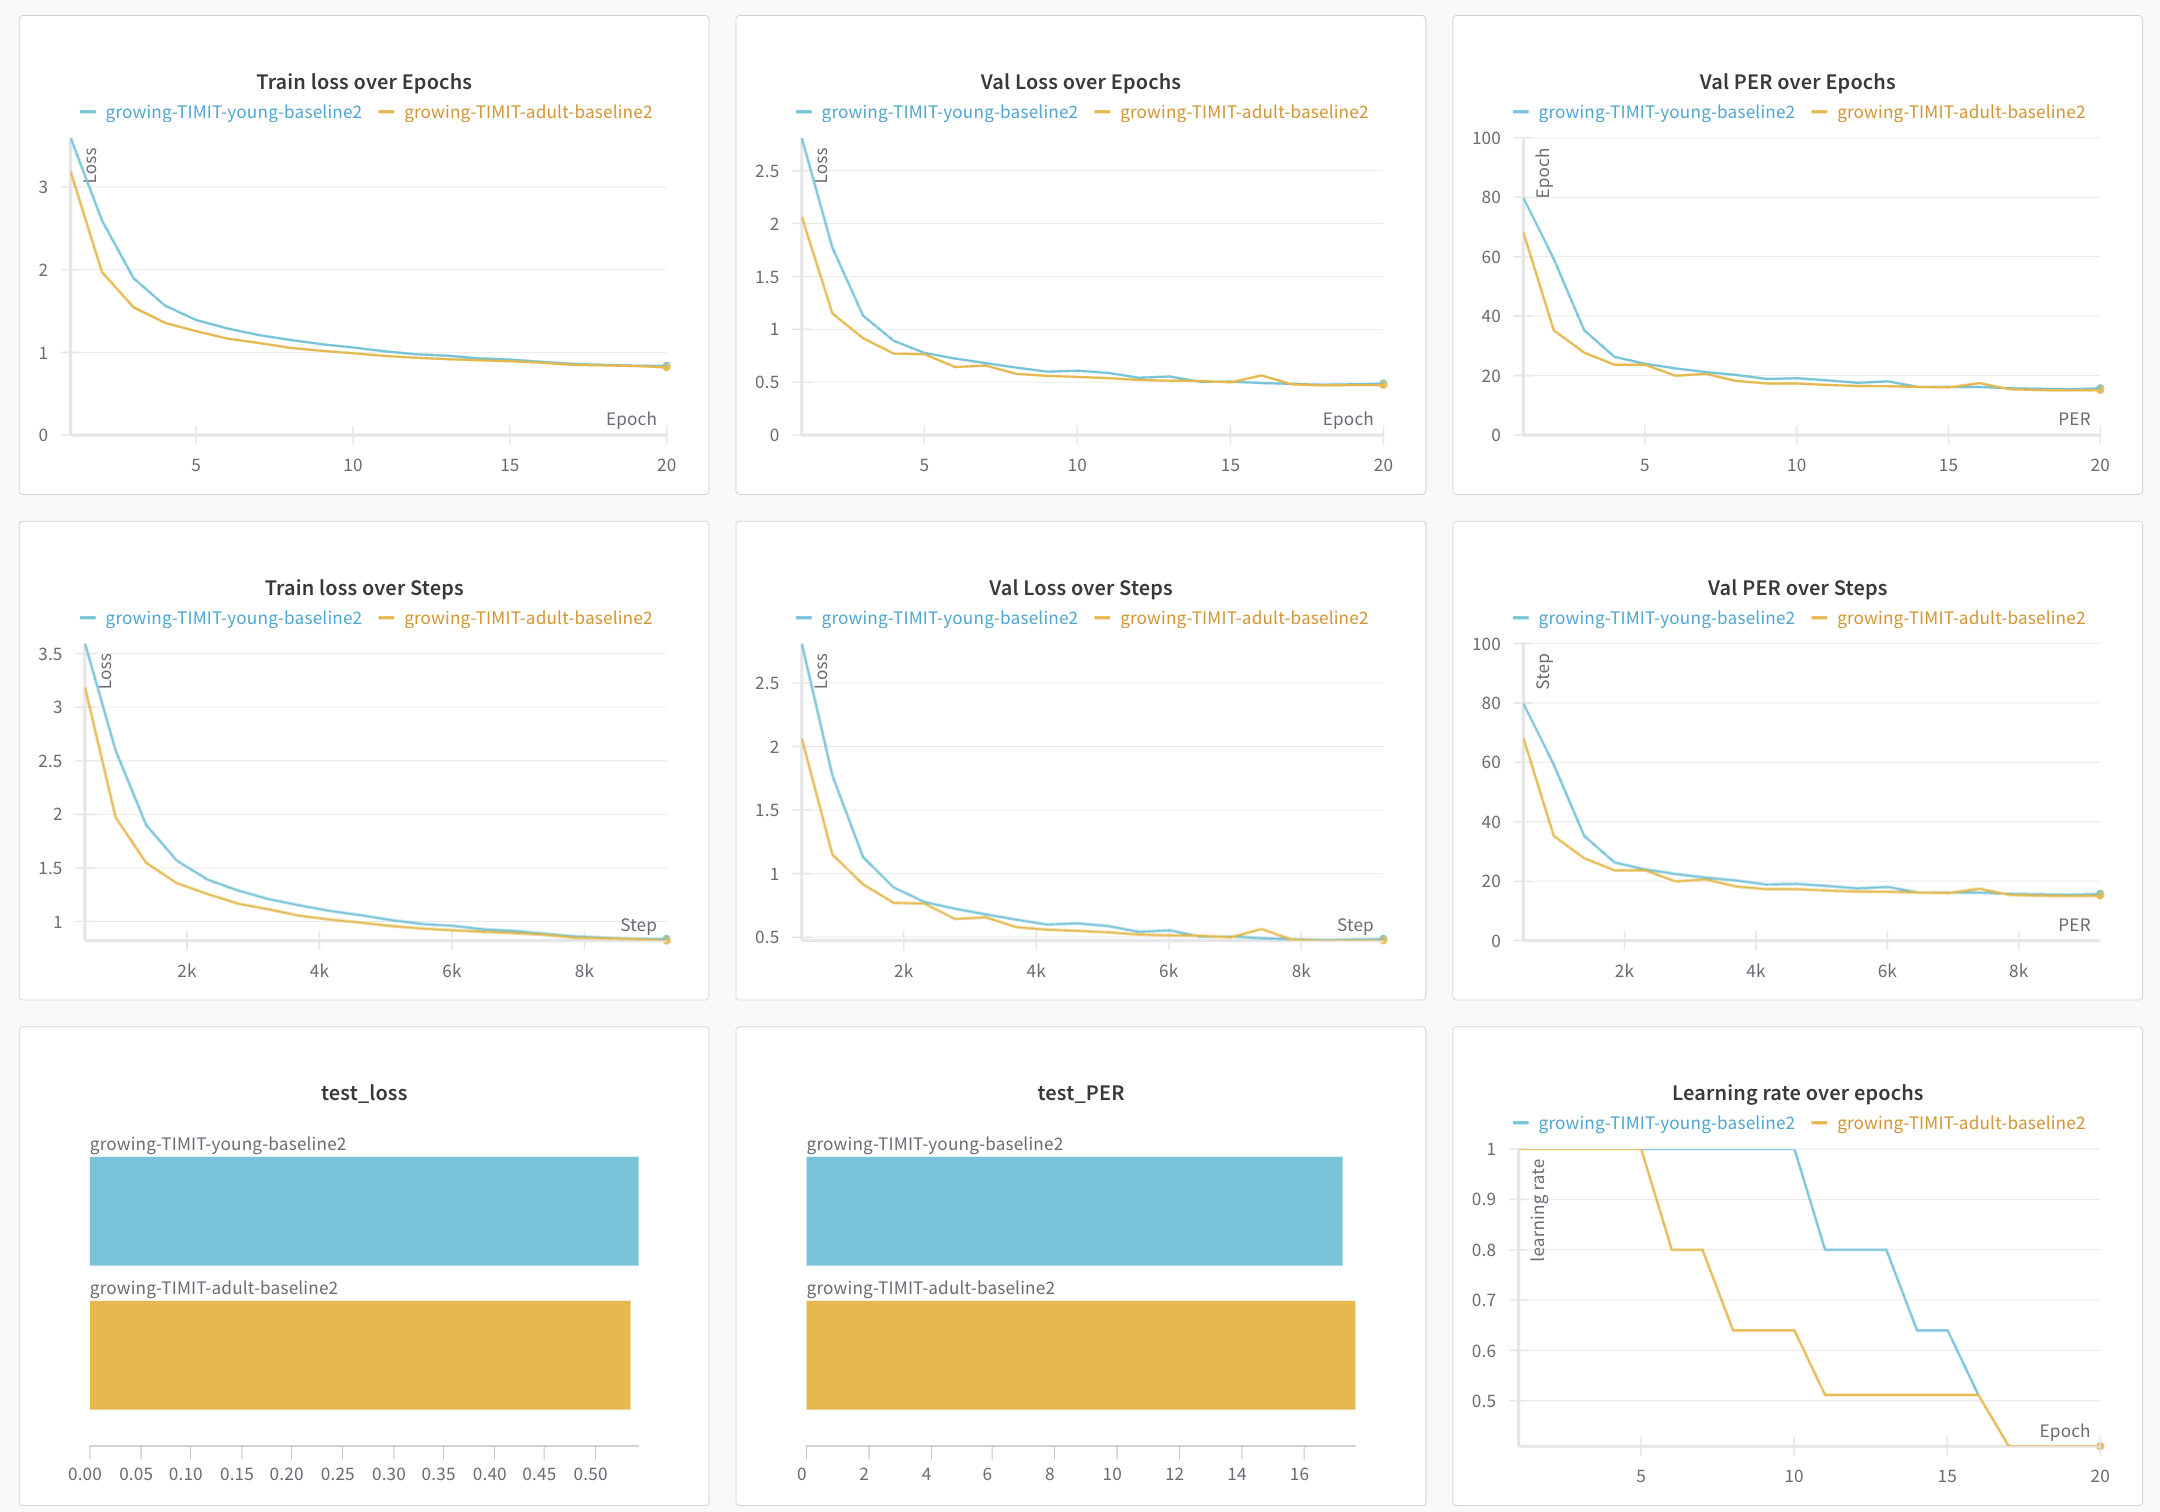

From the previous results, one can see many things:

- The adult model converges faster; at the start of training, the orange curve falls faster than the blue curve on both loss and accuracy. The adult model benefits from its greater capacity.
- The final convergence is very close. From epoch 12-13, the two models converge and end up at around 0.48 for the validation loss and 15% for the PER. This means that the difference in capacity no longer leads to significant gains, and a similar plateau is reached.
-  The results on the test are also very similar 17.6% (young) vs 17.3% (adult). Increased capacity does not generalize better in that case.

In short, the adult model converges faster, but in the end the young model is more compact, more parameter efficient and achieves the same performance on the test. This is the basis on which we will thn measure the impact of the growth.

##### Effect of a single growth step

The objective here is to analyse the model's behaviour wen we grow from the young to the adult architecture at different moments of the training.

I tried at three different moments, epoch 1, 5 and 10. In the following, no noise is added.
Experiments logs can be found here. Careful, if you want to run it, you need to set the yaml file correctly with the growth at the right time (1,5 or 10), the right amount of noise (here 0) and the reset_optimizer to false. Not mandatory but better, change also the name of the output folder accordingly.

**growing-TIMIT-young-w-growth-at-1**

In [ ]:
!make run-growing-TIMIT-young-growth-colab

python -m scripts.speech.TIMIT.TIMIT_Growing_Net2Net.train \
scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/growing.yaml \
--data_folder data/raw/TIMIT \
  --run_name growing-TIMIT-young-w-growth-at-1
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: s_c92666 (s_c92666-concordia-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /content/growing_networks/wandb/run-20250422_171149-r9suxfsw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run growing-TIMIT-young-w-growth-at-1
wandb: ⭐️ Vi

**growing-TIMIT-young-w-growth-at-5**

In [ ]:
!make run-growing-TIMIT-young-growth-colab

python -m scripts.speech.TIMIT.TIMIT_Growing_Net2Net.train \
scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/growing.yaml \
--data_folder data/raw/TIMIT \
  --run_name growing-TIMIT-young-w-growth-at-5
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: s_c92666 (s_c92666-concordia-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /content/growing_networks/wandb/run-20250422_154244-mt156kpm
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run growing-TIMIT-young-w-growth-at-5
wandb: ⭐️ Vi

**growing-TIMIT-young-w-growth-at-10**

In [ ]:
#!make run-growing-TIMIT-young-growth-colab

python -m scripts.speech.TIMIT.TIMIT_Growing_Net2Net.train \
scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/growing.yaml \
--data_folder data/raw/TIMIT
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to q

The results of these three experiments compared to the baselines are:

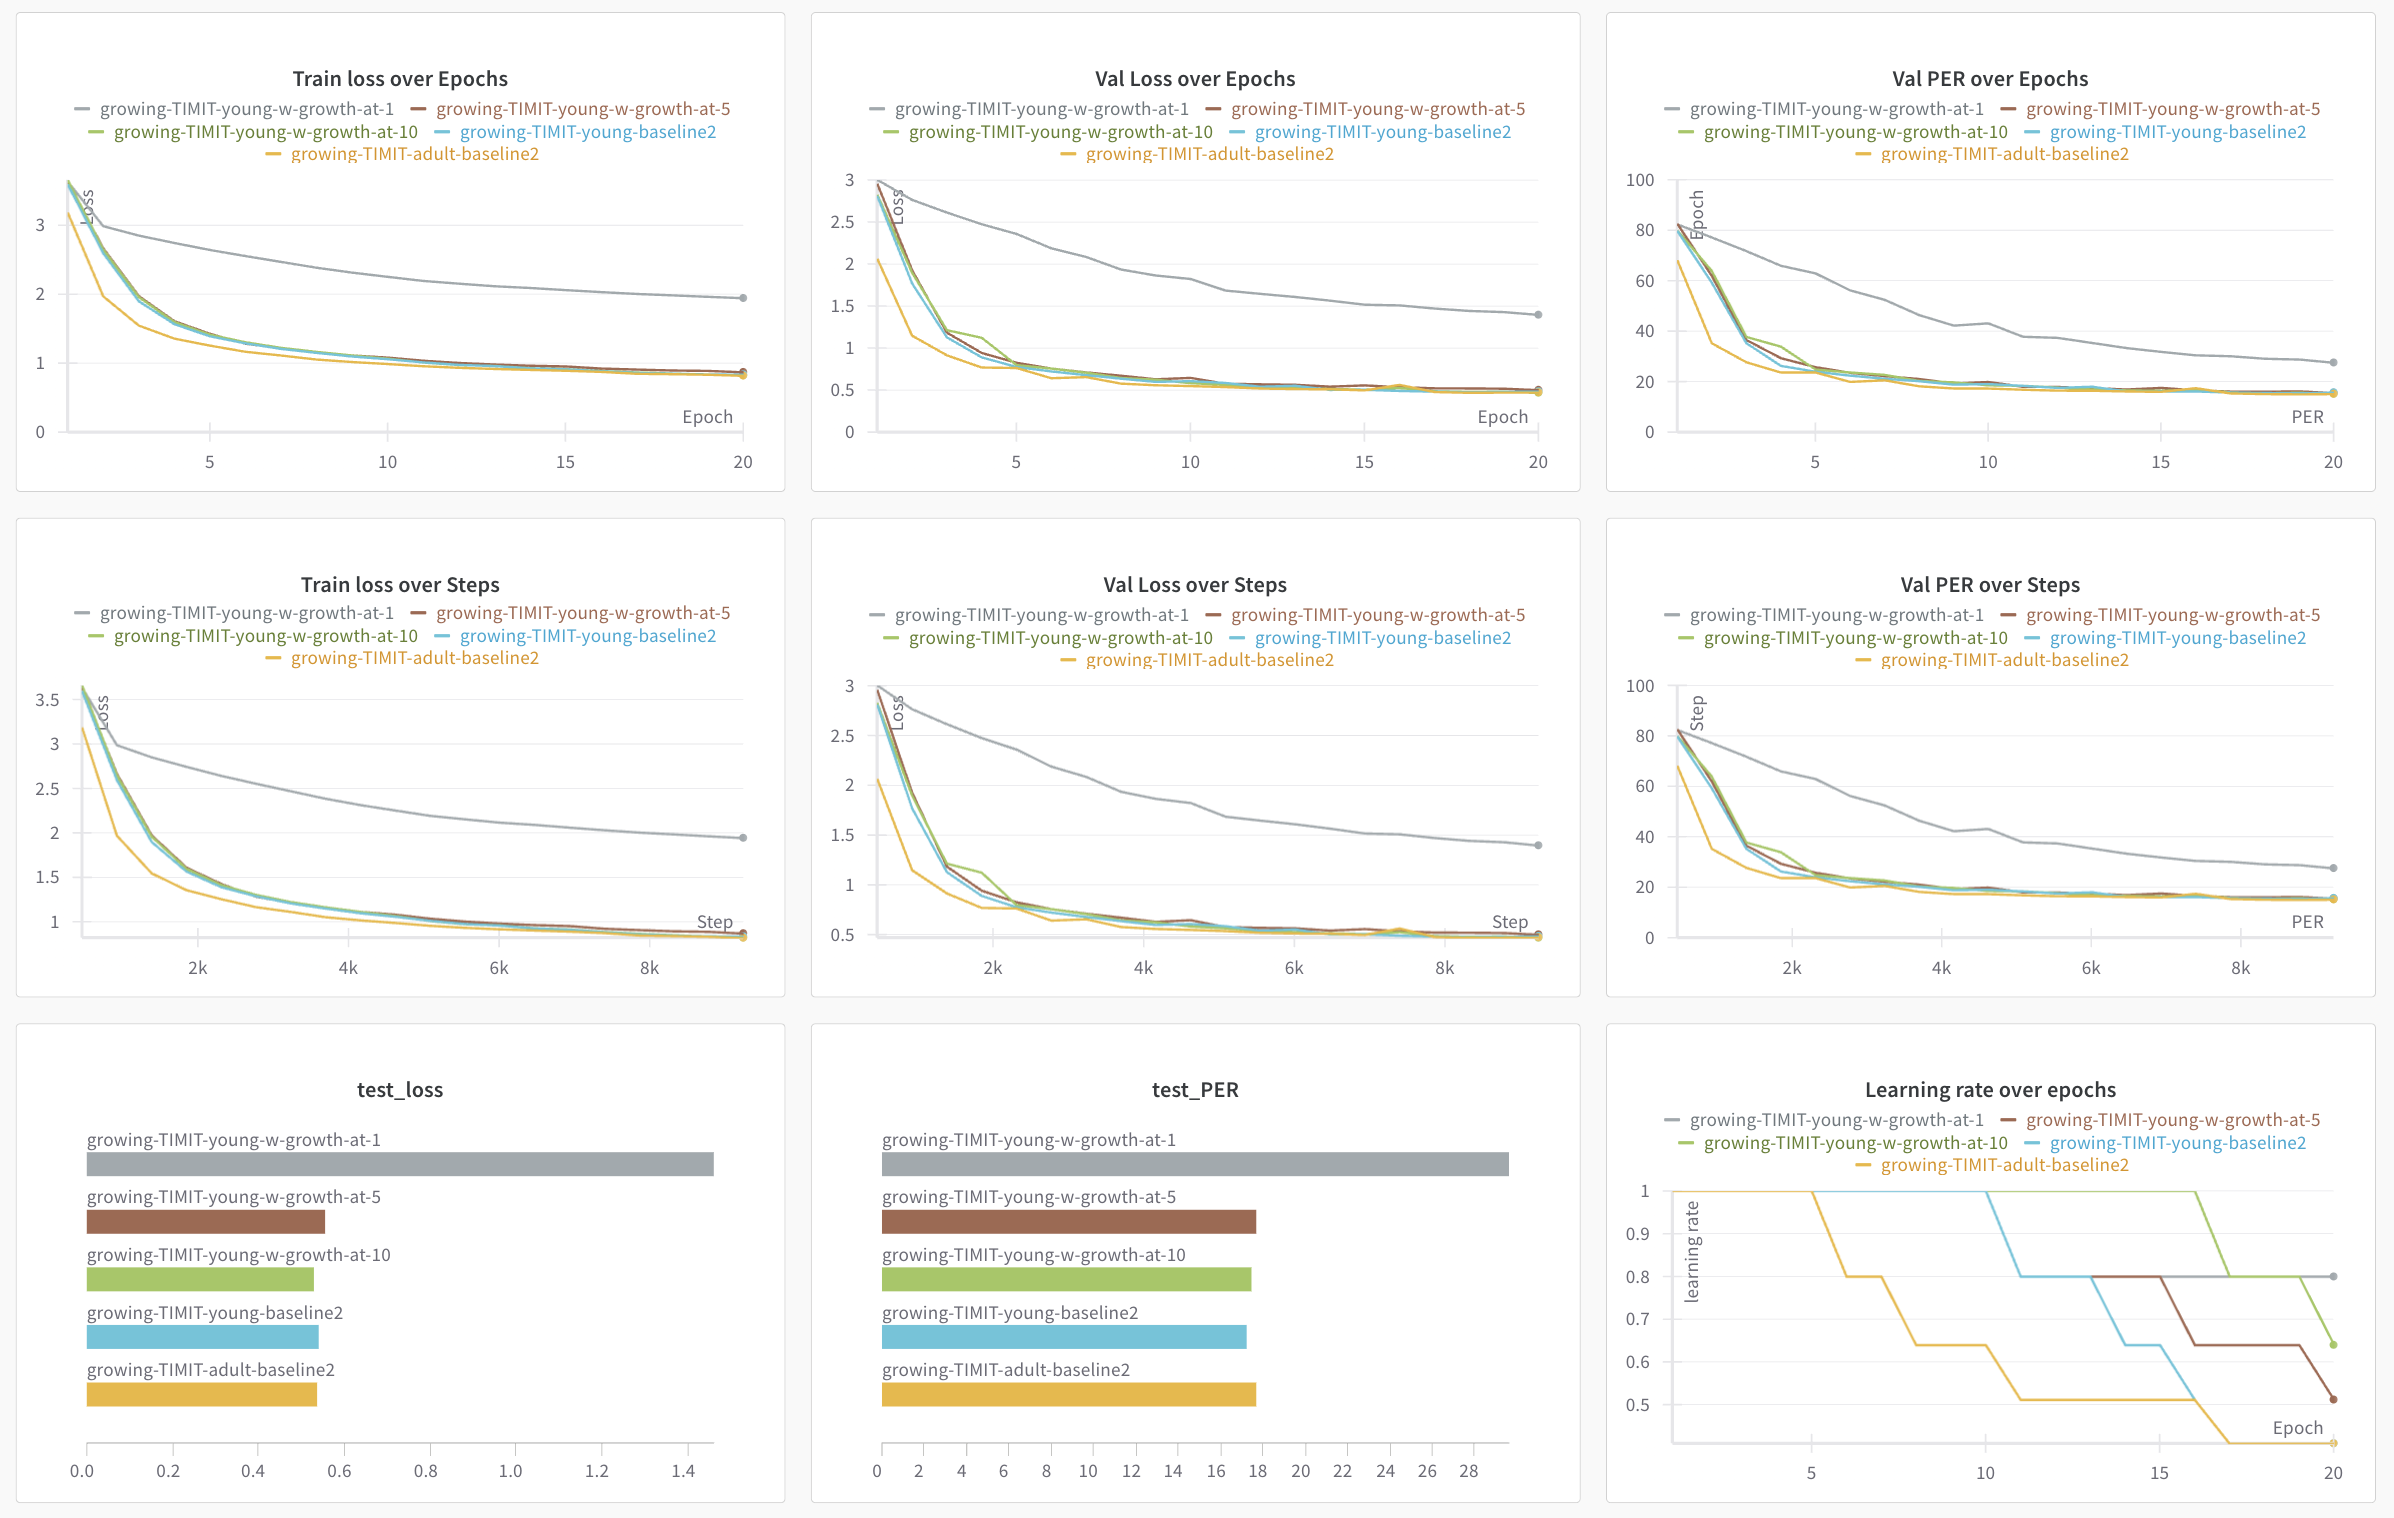

We can see the following from these results:
- If the growth is implemented too early (growth at 1), the results become very poor and struggle to return to anything decent. Indeed, the final results are 28% for the final PER compared with 15-16% for the young baseline. This shows that going too big too soon only amplifies the bad representations and has a very penalising effect on the model.
- If it is implemented in the middle (5) or in the end (10), one can see that the training curves remains stable and smooth over the epochs. It means that the transformation does not affect badly the curves. However, this doesn't bring any significant benefits either.

##### Effect of noise and optimizer reset
Finally, to obtain more impactful results one can study the effect of the noise or resetting the optimizer after the growth. We can also have a look at what happen if we grow two times, meaning we end up with a bigger model than the adult baseline.

Here you can reproduce the experiment of the double growth by setting in the yaml:
- growth_epoch: [5,15]
- noise_std: 0.05
- reset_optimizer: True

In [ ]:
#!make run-growing-TIMIT-young-growth-colab

python -m scripts.speech.TIMIT.TIMIT_Growing_Net2Net.train \
scripts/speech/TIMIT/TIMIT_Growing_Net2Net/hparams/growing.yaml \
--data_folder data/raw/TIMIT \
--run_name growing-TIMIT-young-w-growth-at-5-15-resetoptim-noise0_05
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: s_c92666 (s_c92666-concordia-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.19.9
wandb: Run data is saved locally in /content/growing_networks/wandb/run-20250423_155017-y07y4bjv
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run growing-TIMIT-young-w-gr

The results are the following:

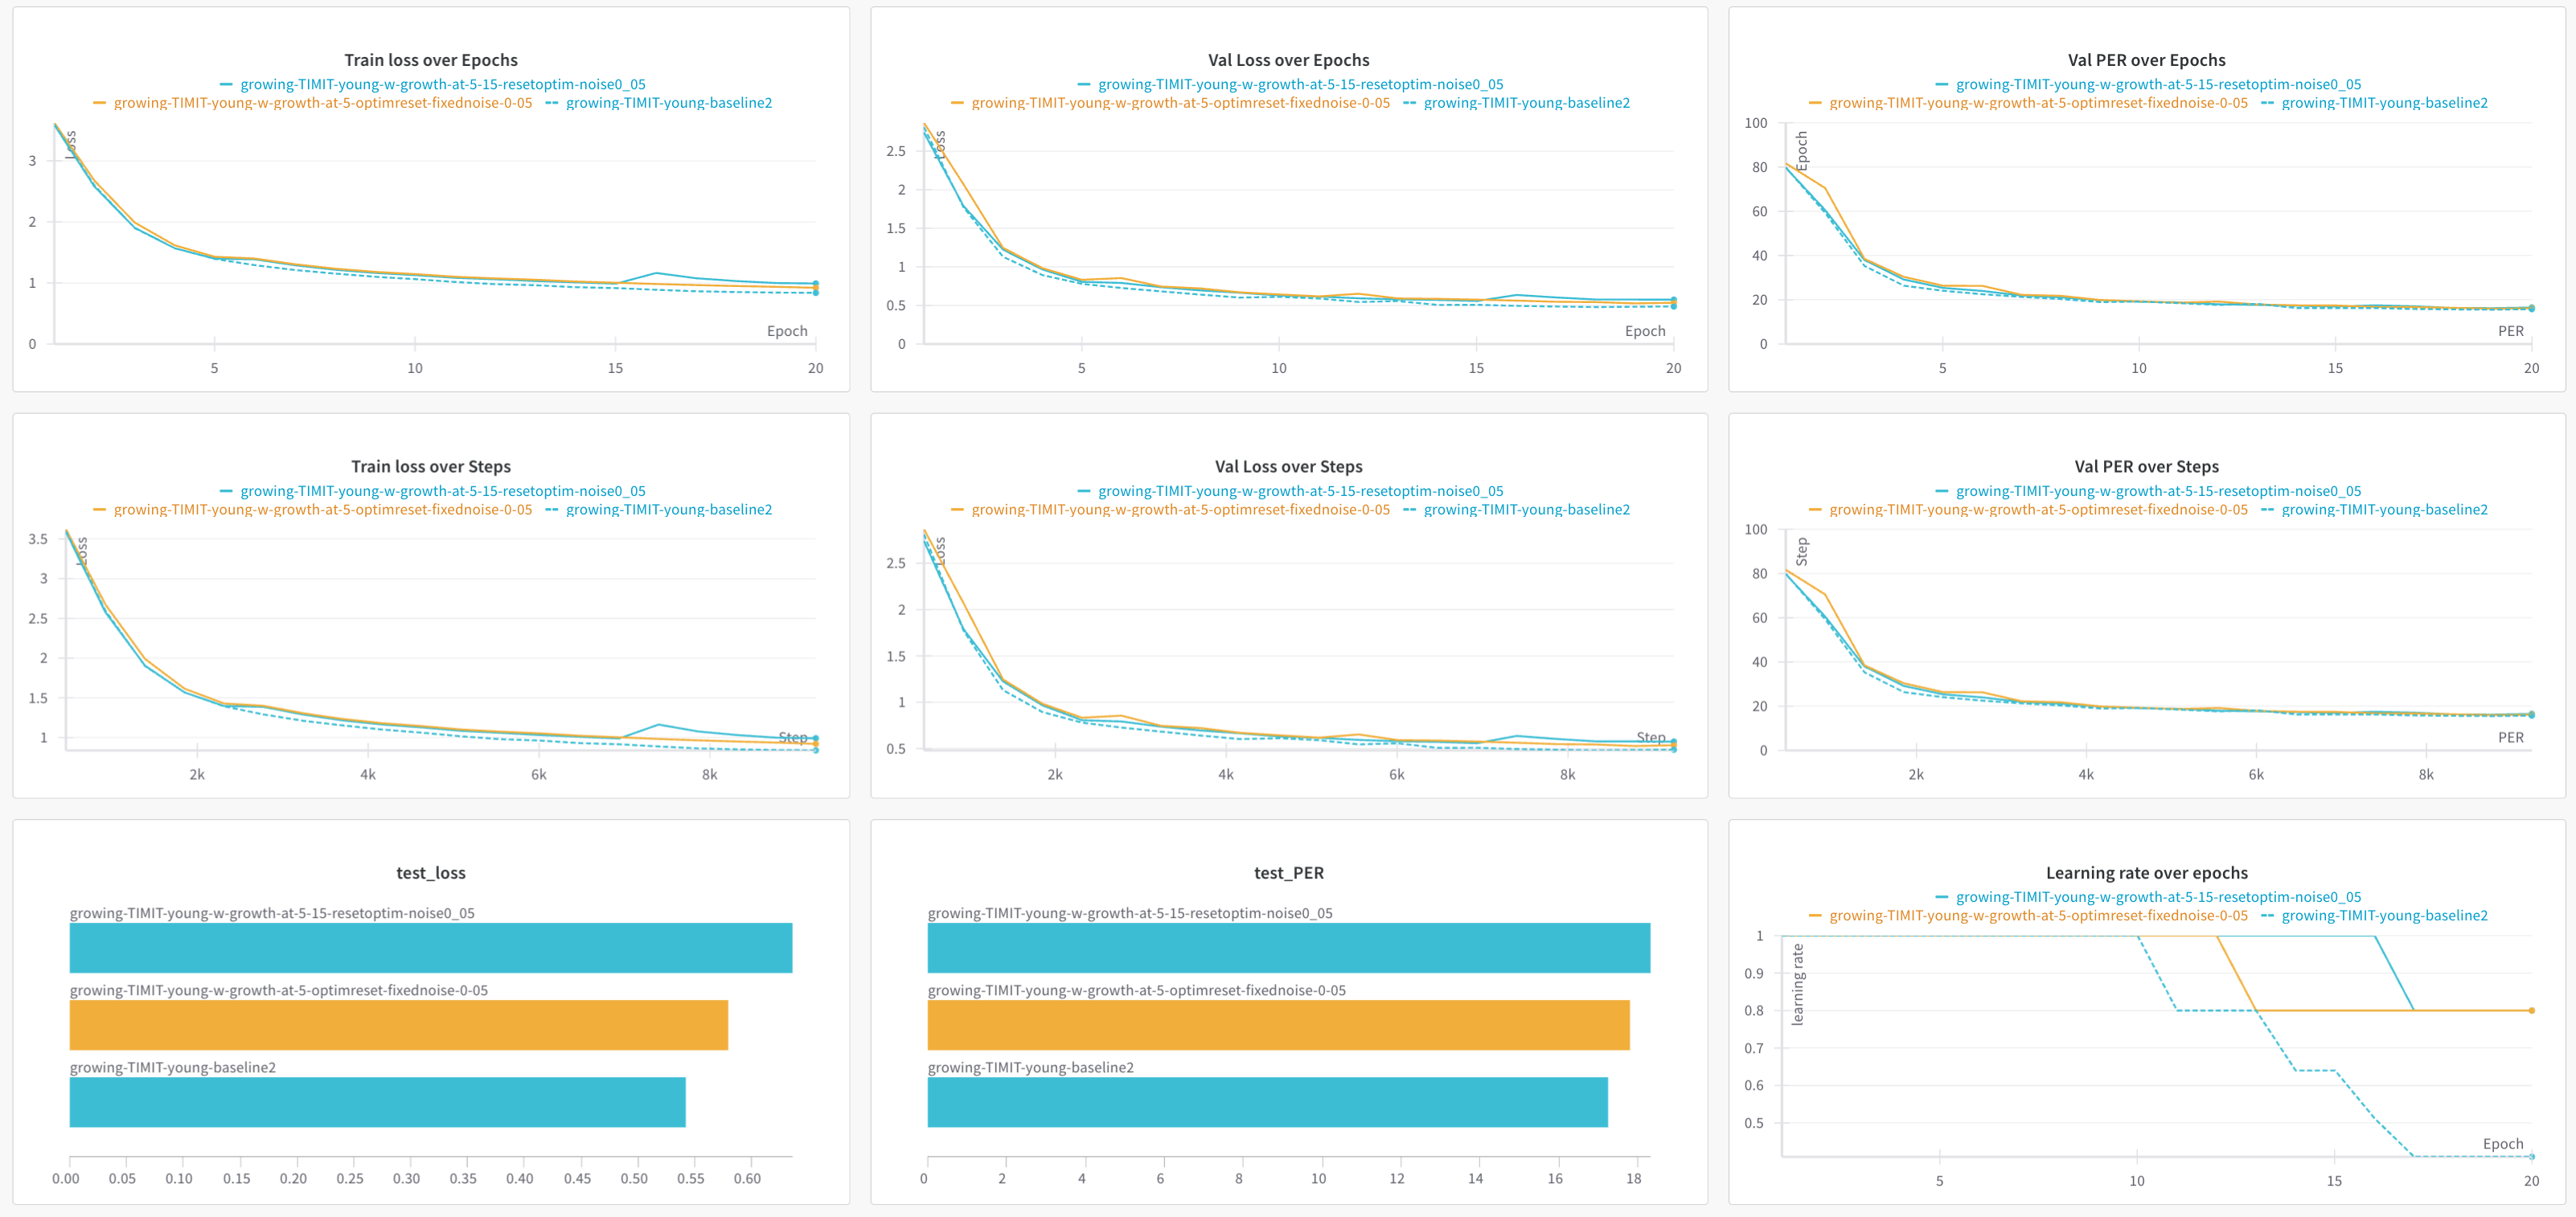

In these graphs we can see once again that adding noise or resetting the optimizer doesn't give us any advantages. In fact, the baseline young remains the best and simplest model. The disturbances associated with growth are attenuated fairly well over time, but are still slightly down.

Similarly, a model with more capacity doesn't seem to perform any better. In the end, the 3 models achieve the same PER on the validation test, but this is not reflected in the test set. The model loses generality.

### Conclusion

In this project, I focused on growing networks. Starting with a literature review, I explored a number of different methods for understanding when and how to grow a neural network. Next, I implemented Net2Net to grow MLPs and compared the performance against classically trained models on datasets such as MNIST and FashionMNIST.

Part 1 - We have shown that Net2Net allows knowledge to be shared and new architectures to be explored more quickly than starting from scratch. The Net2Wider and Net2Deeper functions preserve the initial function well, handle batch normalization and integrate the addition of noise.

Part 2 - We studied the effects of growing during the training phase. Although the benefits are still difficult to see on simple tasks such as MNIST, we have observed some interesting learning dynamics during the expansion phase.

Part 3 - We re-implemented a CTC-based ASR chain with a growing CRDNN to analyse network growth effects. The growths steps work correctly, but the results obtained remain modest and do not allow us to draw very encouraging conclusions.

Overall, this work validates the technical feasibility of the growing network, while highlighting the need for more advanced experimentation (more complex architectures, real speech recognition tasks) to fully measure its impact.

### Self Evaluation

This part is not about excuses or justifications. It's a real self-criticism.

I have a feeling of disappointment with this project. The subject really interested me, and I wanted to be able to apply it to continual learning in concrete terms, which I didn't manage to do.

I spent a lot of time thinking about the method, exploring the literature, setting up tools like Weights & Biases and trying to log my results properly. These are important points, of course, but I don't think they should have been to the detriment of the research itself and the core of the project.

Later on, I was caught up in the workload of the other subjects and I wasn't able to devote as much time to it as I had at the start. So I had to work under time pressure, which is certainly reflected in the last part of the report, which is more rushed.

I also spent a lot of time on the implementation of Net2Net; I think I sometimes got a bit lost or didn't manage to clarify all my ideas. By forcing myself to code most of the project myself, I also became aware of some of my shortcomings, which meant I wasted a lot of time on things that should have been done more quickly.